# IN3061/INM430 - Tiny DS Project Progress Report

****
** Student Name: Mussa Yousef

** Project Title: The Turning Point: Crime analysis between October 2019- October 2020, exploring how lockdown had an impact.



**Bit of info on The City of London: The City has a resident population of 9,401 (ONS estimate, mid-2016) but over 500,000 are employed there,[11] and some estimates put the number of workers in the city to be over 1 million. About three-quarters of the jobs in the City of London are in the financial, professional, and associated business services sectors.[12] The legal profession forms a major component of the northern and western sides of the City, especially in the Temple and Chancery Lane areas where the Inns of Court are located, of which two—Inner Temple and Middle Temple—fall within the City of London boundary.**
****

Specific answers:

1) Is the data I've proposed enough for an indepth analysis and enough to help attain a good grade

Yes, I think so, you can explore and complement further once you have some concrete findings, which you can then find extra information (a website) or references (articles from journals/magazine/newspaper) that could support your work you can either validate your results (this confirms what so and so published previously) or contradict in some way (unlike this paper we found ...). Notice that different does not mean incorrect.

2) do you think if I include a LSOA info on the City of London or expand my analysis on the entire city of London would this be ideal or is the data i've extracted enough??

By LSOA I guess you mean Lower Layer Super Output Areas (LSOA). That will be better answered if you are able to find something or not, perhaps you will need more detail, perhaps not.

3) I want to analyse how lockdown effected crime essentially how would I be able to introduce a Model to allow an indepth analysis? - I was thinking of making a model which would be able to predict the outcomes of a crime and scrutinise if the police force may have become more lenient/strict during lockdown potentially due to the deprevation of resources.

A model that could answer this would be very interesting, but remember a model is a simplification of reality, and not always you can capture everything in a model.

4) would I be able to gain some direction on GeoPandas:- as you can see I am trying to impose the crime points on the shape file of the City of London; im stuggling to find good documentation for analysis

Try asking that in Visual Analytics, that course is specialised in that area.

5) Im trying to figure out a way I would be able to establish correlation analysis; my data doesn't have many numerical columns; I'm thinking of doing a some hot encoding on the crime type and outcome and potentially analysing the correlation between the two

Here you may have to search for extra sources of data, you may need to download from different sources. Whilst this may complicate the analysis, it would tick all the boxes of wrangling, cleaning, etc.

6) In my introduction would I be able to use supplementary statistical analysis of London as a whole to paint the picture of my dataset or would you recommend I bring in supplementary data to articulate this

Yes of course, and the more references you can use, the better

## Application domain and datasets (150 words):

**Which application domain and which datasets?**


***
I aim to make extensive research and analysis on the crime level in the Borough of City of London;

Data was extracted from the Police database between the period of October 2019 to October 2020

I aim to capture the change in crime rate/type of crimes during lockdown; considering the density of working offices and minimal residential areas it will be interesting to see how the types of crimes changed and how the outcomes had been affected 

I'm thinking of retaining LSOA data on for the City of London & how this was potentially impacted too

I have deleted columns which wasn't going to be impactful in the analysis and will add dummy columns for types of crime committed and outcome of crimes from the police

Also a correlation between outcome and crimes commited will be analysed
***
***
## Well-motivated analytical questions (150 words):

What are your analytical questions and what is your motivation for answering them?


1) What was the change of crime over time during the year leading upto Lockdown?

2) How did Lockdown impact the crimes commited?

3) Is there a correlation between crimes commited and outcomes of crime and if so has this changed over time due to lockdown?

- breakdown into crime months

4) Are the Police harsher/lenient with outcome of crimes potentially due to lockdown? *Potential model builing*


5) Analysis of geospatial analysis and how it has changed (if any) over time?
***
***
## Plan (maximum 200 words): 

What is your plan? Include data processing, data derivation, model building and validation. The aim of your plan is to address your research questions.

1) Collect all data needed for the project - Merge the months needed for analysis
- collect data from Police potentially will be looking to add in LSOA data of City of London to see if there will be any potential trends
2) Data Wrangling - remove columns and tailoring data to the City of London only
- check if data has any missing value 
- 
3) Feature engineering: add dummy columns spliting crime commited and outcomes of crimes allowing further analysis of data

4) Using geospatial view to allow a visual representation of the patterns to be seen and analysed 
   - examing correlation and 'turning point' of Lockdown and how this effected the data of the City of London


***
***
## Specific questions to us

We will give general comments on your approach, but our feedback will be more useful if you have some more specific questions.





1) Is the data I've proposed enough for an indepth analysis and enough to help attain a good grade

2) do you think if I include a LSOA info on the City of London or expand my analysis on the entire city of London
- would this be ideal or is the data i've extracted enough??

3) I want to analyse how lockdown effected crime essentially how would I be able to introduce a Model to allow an indepth analysis? - I was thinking of making a model which would be able to predict the outcomes of a crime and scrutinise if the police force may have become more lenient/strict during lockdown potentially due to the deprevation of resources.

4) would I be able to gain some direction on GeoPandas:- as you can see I am trying to impose the crime points on the shape file of the City of London; im stuggling to find good documentation for analysis

5) Im trying to figure out a way I would be able to establish correlation analysis; my data doesn't have many numerical columns; I'm thinking of doing a some hot encoding on the crime type and outcome and potentially analysing the correlation between the two 


6) In my introduction would I be able to use supplementary statistical analysis of London as a whole to paint the picture of my dataset or would you recommend I bring in supplementary data to articulate this

***


# 1) Import data and Merge

In [20]:
#Code
#Import Packages

#https://data.police.uk/data/
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num
import geopandas as gpd
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
import plotly.express as px
import plotly_express as px
import squarify
%matplotlib inline

#Geocoding reversal
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import tqdm
from tqdm.notebook import tqdm_notebook

#Data downloaded ----->>>https://data.police.uk/data/
#DataFiles on the view of crimes 12 months before lockdown 

## Import crime Data
crime_oct2019=gpd.read_file ('2019-10-city-of-london-street.csv',delimiter=',')
crime_Nov2019=gpd.read_file ('2019-11-city-of-london-street.csv',delimiter=',')
crime_dec2019=gpd.read_file ('2019-12-city-of-london-street.csv',delimiter=',')
crime_jan2020=gpd.read_file ('2020-01-city-of-london-street.csv',delimiter=',')
crime_feb2020=gpd.read_file ('2020-02-city-of-london-street.csv',delimiter=',')
crime_march2020=gpd.read_file ('2020-03-city-of-london-street.csv',delimiter=',')
crime_april2020=gpd.read_file ('2020-04-city-of-london-street.csv',delimiter=',')
crime_may2020=gpd.read_file ('2020-05-city-of-london-street.csv',delimiter=',')
crime_june2020=gpd.read_file ('2020-06-city-of-london-street.csv',delimiter=',')
crime_july2020=gpd.read_file ('2020-07-city-of-london-street.csv',delimiter=',')
crime_august2020=gpd.read_file ('2020-08-city-of-london-street.csv',delimiter=',')
crime_Sep2020=gpd.read_file ('2020-09-city-of-london-street.csv',delimiter=',')
crime_oct2020=gpd.read_file ('2020-10-city-of-london-street.csv',delimiter=',')

## Import Stop & Search Data 

search_oct2019=pd.read_csv ('2019-10-city-of-london-stop-and-search.csv',delimiter=',')
search_Nov2019=pd.read_csv ('2019-11-city-of-london-stop-and-search.csv',delimiter=',')
search_dec2019=pd.read_csv ('2019-12-city-of-london-stop-and-search.csv',delimiter=',')
search_jan2020=pd.read_csv ('2020-01-city-of-london-stop-and-search.csv',delimiter=',')
search_feb2020=pd.read_csv ('2020-02-city-of-london-stop-and-search.csv',delimiter=',')
search_march2020=pd.read_csv ('2020-03-city-of-london-stop-and-search.csv',delimiter=',')
search_april2020=pd.read_csv ('2020-04-city-of-london-stop-and-search.csv',delimiter=',')
search_may2020=pd.read_csv ('2020-05-city-of-london-stop-and-search.csv',delimiter=',')
search_june2020=pd.read_csv ('2020-06-city-of-london-stop-and-search.csv',delimiter=',')
search_july2020=pd.read_csv ('2020-07-city-of-london-stop-and-search.csv',delimiter=',')
search_august2020=pd.read_csv ('2020-08-city-of-london-stop-and-search.csv',delimiter=',')
search_Sep2020=pd.read_csv ('2020-09-city-of-london-stop-and-search.csv',delimiter=',')
search_oct2020=pd.read_csv ('2020-10-city-of-london-stop-and-search.csv',delimiter=',')


#Merge/Concatenate all datasets respectively;Crime and Stop&Search...

#Data on crime commited in the city of London between 03-06(lockdown) merged
df_crime_all=[crime_oct2019,crime_Nov2019,crime_dec2019,crime_jan2020,crime_feb2020,crime_march2020,crime_april2020,crime_may2020,crime_june2020,crime_july2020,crime_august2020,crime_Sep2020,crime_oct2020];
df_crime= pd.concat(df_crime_all , axis=0, join='outer',ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)


df_search_all=[search_oct2019,search_Nov2019,search_dec2019,search_jan2020,search_feb2020,search_march2020,search_april2020,search_may2020,search_june2020,
               search_july2020,search_august2020,search_Sep2020,search_oct2020];
df_search= pd.concat(df_search_all , axis=0, join='outer',ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)


## Convert Longitude and Latitude marks to numeric columns
df_crime['Longitude']=pd.to_numeric(df_crime.Longitude,errors='coerce')
df_crime['Latitude']=pd.to_numeric(df_crime.Latitude,errors='coerce')
df_search['Longitude']=pd.to_numeric(df_search.Longitude,errors='coerce')
df_search['Latitude']=pd.to_numeric(df_search.Latitude,errors='coerce')

#Delete rows with no location as this would potentially incorrect data 
#df_crime=df_crime[df_crime.Location != 'No Location']
#df_search=df_search[df_search.Location !='No Location']

##Merge both Longitude and Latitude; allowing us to use geomertry column
df_crime=gpd.GeoDataFrame(df_crime,geometry=gpd.points_from_xy(df_crime.Longitude,df_crime.Latitude))
df_search=gpd.GeoDataFrame(df_search,geometry=gpd.points_from_xy(df_search.Longitude,df_search.Latitude))


In [ ]:
pip install geopy

In [ ]:
pip install dash

In [ ]:
pip install plotly==4.13.0

In [ ]:
pip install plotly.express

In [21]:
print(df_crime)
#noticing that the data has other regions included therefore I will consider merging further datails in order to gain a rich insight

                                               Crime ID    Month  \
0                                                        2019-10   
1     a53440d933613bf927349c9af506c2a2e49bb72786fefd...  2019-10   
2     347cacb0d02bdb756998b54d7487407bcf6f171ba72f6c...  2019-10   
3     24a8afd5512e09b44b272db7bee560cb458fc718a11ed7...  2019-10   
4                                                        2019-10   
...                                                 ...      ...   
7764  23a5c90412ad1e67b5abe478067eb86f76d5ff1a9c9db5...  2020-10   
7765  84e0a3b5c2b3fc0bede4bc31b3176ee2e35ca146ecb10c...  2020-10   
7766  d51392128fbceab5d563c011918f04c4dbf5d1c15def75...  2020-10   
7767  53f1645d2cae641d21e56d78888125d7be46f0637b7bcb...  2020-10   
7768  ea5838b9b40a16f3f30f9e96559ce599275cfe41c70d91...  2020-10   

                Reported by           Falls within  Longitude   Latitude  \
0     City of London Police  City of London Police  -0.111497  51.518226   
1     City of London Police  Ci

In [22]:
#investigate what LSOA boroughs are included as we just want to extract data from city of London
df_crime['LSOA name'].unique()



#I will add crimes within this region to add more richness to the investigation
#'Camden 028B'
 #      , 'Hackney 027G',
   #    'Islington 003B', 'Islington 022H', 'Islington 023D',
    #   'Islington 023E', 'Newham 013G', 'Tower Hamlets 015B',
     #  'Tower Hamlets 017A', 'Tower Hamlets 027B', '', 'Camden 025C',
      # 'Camden 027B', 'Islington 021B', 'Southwark 002C',
       #'Tower Hamlets 014E', 'Tower Hamlets 021F', 'Tower Hamlets 023D',
       #'Westminster 018B', 'Hackney 026A', 'Haringey 036D',
       #'Islington 005B', 'Newham 012A', 'Tower Hamlets 009D',
       #'Tower Hamlets 026B', 'Waltham Forest 013F', 'Waltham Forest 021B',
       #'Camden 027D', 'Hackney 003D', 'Islington 017A', 'Southwark 006F',
       #'Tower Hamlets 001C', 'Tower Hamlets 004F', 'Tower Hamlets 023C',
       #'Camden 028C', 'Southwark 002D', 'Westminster 020C',
       #'Tower Hamlets 015E', 'Tower Hamlets 006D', 'Hackney 002F',
       #'Islington 022D', 'Tower Hamlets 005D', 'Tower Hamlets 025F',
       #'Camden 025B', 'Tower Hamlets 005C', 'Tower Hamlets 013C',
       #'Hackney 016E', 'Lambeth 036C', 'Westminster 018A',
       #'Southwark 002A', 'Southwark 003H', 'Tower Hamlets 021D',
       #'Hackney 003C', 'Tower Hamlets 007C', 'Southwark 003E',
       #'Tower Hamlets 007B'

array(['Camden 028B', 'City of London 001A', 'City of London 001B',
       'City of London 001C', 'City of London 001E',
       'City of London 001F', 'City of London 001G', 'Hackney 027G',
       'Islington 003B', 'Islington 022H', 'Islington 023D',
       'Islington 023E', 'Newham 013G', 'Tower Hamlets 015B',
       'Tower Hamlets 017A', 'Tower Hamlets 027B', '', 'Camden 025C',
       'Camden 027B', 'Islington 021B', 'Southwark 002C',
       'Tower Hamlets 014E', 'Tower Hamlets 021F', 'Tower Hamlets 023D',
       'Westminster 018B', 'Hackney 026A', 'Haringey 036D',
       'Islington 005B', 'Newham 012A', 'Tower Hamlets 009D',
       'Tower Hamlets 026B', 'Waltham Forest 013F', 'Waltham Forest 021B',
       'Camden 027D', 'Hackney 003D', 'Islington 017A', 'Southwark 006F',
       'Tower Hamlets 001C', 'Tower Hamlets 004F', 'Tower Hamlets 023C',
       'Camden 028C', 'Southwark 002D', 'Westminster 020C',
       'Tower Hamlets 015E', 'Tower Hamlets 006D', 'Hackney 002F',
       'Islingt

Crimes which were committed in the city of london- Criminals were arrested in the near by boroughs therefore we will include[Camden,Hackney,Islington,Newham,Tower Hamlets,Westminster,Waltham Forest,Southwark]

In [24]:
## Import crime Data
crime_all_oct2019=gpd.read_file ('2019-10-metropolitan-street.csv',delimiter=',')
crime_all_Nov2019=gpd.read_file ('2019-11-metropolitan-street.csv',delimiter=',')
crime_all_dec2019=gpd.read_file ('2019-12-metropolitan-street.csv',delimiter=',')
crime_all_jan2020=gpd.read_file ('2020-01-metropolitan-street.csv',delimiter=',')
crime_all_feb2020=gpd.read_file ('2020-02-metropolitan-street.csv',delimiter=',')
crime_all_march2020=gpd.read_file ('2020-03-metropolitan-street.csv',delimiter=',')
crime_all_april2020=gpd.read_file ('2020-04-metropolitan-street.csv',delimiter=',')
crime_all_may2020=gpd.read_file ('2020-05-metropolitan-street.csv',delimiter=',')
crime_all_june2020=gpd.read_file ('2020-06-metropolitan-street.csv',delimiter=',')
crime_all_july2020=gpd.read_file ('2020-07-metropolitan-street.csv',delimiter=',')
crime_all_august2020=gpd.read_file ('2020-08-metropolitan-street.csv',delimiter=',')
crime_all_Sep2020=gpd.read_file ('2020-09-metropolitan-street.csv',delimiter=',')
crime_all_oct2020=gpd.read_file ('2020-10-metropolitan-street.csv',delimiter=',')

df_crime_all1=[crime_all_oct2019,crime_all_Nov2019,crime_all_dec2019,crime_all_jan2020,crime_all_feb2020,crime_all_march2020,crime_all_april2020,crime_all_may2020,crime_all_june2020,crime_all_july2020,crime_all_august2020,crime_all_Sep2020,crime_all_oct2020];
df_crime_allB= pd.concat(df_crime_all1 , axis=0, join='outer',ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [25]:
print(df_crime_allB)

                                                  Crime ID    Month  \
0                                                           2019-10   
1                                                           2019-10   
2                                                           2019-10   
3                                                           2019-10   
4                                                           2019-10   
...                                                    ...      ...   
1270862  59a266af81a1d77853b0cbcf1c4dde408accb40bdc6a4f...  2020-10   
1270863  8edb5b700766c2121efa5982bb1b41fc4db5fc934d2c29...  2020-10   
1270864  fb99f399420b1e6f3e656a48a01bb60e1e4370a8d76691...  2020-10   
1270865  8dbb8a86eeb3088446d9cbba83fba25ef015cd8efd8608...  2020-10   
1270866  f2665cdaa75b2a40124a47027ff1a02c49656c03db0f15...  2020-10   

                         Reported by                 Falls within Longitude  \
0        Metropolitan Police Service  Metropolitan Police Service  0

In [26]:
print(df_crime_allB['LSOA name'].unique())

['Barking and Dagenham 001A' 'Barking and Dagenham 001B'
 'Barking and Dagenham 001C' ... 'Woking 008E' 'Wokingham 009C'
 'Worthing 011C']


In [27]:
#Determine dataframe extracting neighboring boroughs

neighboring_boroughs_names=['Camden 028B','Hackney 027G','Islington 003B', 'Islington 022H', 'Islington 023D', 'Islington 023E', 'Newham 013G', 'Tower Hamlets 015B','Tower Hamlets 017A', 'Tower Hamlets 027B', '', 'Camden 025C','Camden 027B', 'Islington 021B', 'Southwark 002C','Tower Hamlets 014E', 'Tower Hamlets 021F', 'Tower Hamlets 023D','Westminster 018B', 'Hackney 026A', 'Haringey 036D','Islington 005B', 'Newham 012A', 'Tower Hamlets 009D','Tower Hamlets 026B', 'Waltham Forest 013F', 'Waltham Forest 021B','Camden 027D', 'Hackney 003D', 'Islington 017A', 'Southwark 006F','Tower Hamlets 001C', 'Tower Hamlets 004F', 'Tower Hamlets 023C','Camden 028C', 'Southwark 002D', 'Westminster 020C','Tower Hamlets 015E', 'Tower Hamlets 006D', 'Hackney 002F','Islington 022D', 'Tower Hamlets 005D', 'Tower Hamlets 025F','Camden 025B', 'Tower Hamlets 005C', 'Tower Hamlets 013C','Hackney 016E', 'Lambeth 036C', 'Westminster 018A','Southwark 002A', 'Southwark 003H', 'Tower Hamlets 021D','Hackney 003C', 'Tower Hamlets 007C', 'Southwark 003E','Tower Hamlets 007B']

df_crime_nei=df_crime_allB.loc[df_crime_allB['LSOA name'].isin(neighboring_boroughs_names)] 

#Covert Long & Lat to floats to be able to extract

df_crime_nei['Longitude']=pd.to_numeric(df_crime_nei.Longitude,errors='coerce')
df_crime_nei['Latitude']=pd.to_numeric(df_crime_nei.Latitude,errors='coerce')



## add geometry column of both Long&Lat column for geospatial analysis
df_crime_nei=gpd.GeoDataFrame(df_crime_nei,geometry=gpd.points_from_xy(df_crime_nei.Longitude,df_crime_nei.Latitude))

#Merge the neighboring crime data with the City of London

Merge_COL_Nei=[df_crime_nei,df_crime];
df_crime= pd.concat(Merge_COL_Nei , axis=0, join='outer',ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)


/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [28]:
print(df_crime)

                                                Crime ID    Month  \
0                                                         2019-10   
1                                                         2019-10   
2      23ec49b879ae98cbe271fa4c7f87d24bbe386d1a7e5437...  2019-10   
3      c342ee15a58a80f4d03ff91b20d25ce9dd633ac38e649a...  2019-10   
4      91391df9f41a8ed353ea290ec8aaa73b2fe02856adc6c9...  2019-10   
...                                                  ...      ...   
64490  23a5c90412ad1e67b5abe478067eb86f76d5ff1a9c9db5...  2020-10   
64491  84e0a3b5c2b3fc0bede4bc31b3176ee2e35ca146ecb10c...  2020-10   
64492  d51392128fbceab5d563c011918f04c4dbf5d1c15def75...  2020-10   
64493  53f1645d2cae641d21e56d78888125d7be46f0637b7bcb...  2020-10   
64494  ea5838b9b40a16f3f30f9e96559ce599275cfe41c70d91...  2020-10   

                       Reported by                 Falls within  Longitude  \
0      Metropolitan Police Service  Metropolitan Police Service  -0.122940   
1      Metropol

In [29]:
pd.isnull(df_crime).sum()

Crime ID                    0
Month                       0
Reported by                 0
Falls within                0
Longitude                8207
Latitude                 8207
Location                    0
LSOA code                   0
LSOA name                   0
Crime type                  0
Last outcome category       0
Context                     0
geometry                    0
dtype: int64

Brilliant-Merge successful! now lets look if there are any pieces of data missing, already we can see some location points in the geometry points missing.

In [ ]:
pd.isnull(df_crime).sum()
#15748 locations which are left with no location I will be deleteing these columns as it doesn't add statistical richness to the dataset

In [30]:
#Delete rows with no location as this would potentially incorrect data 
df_crime=df_crime[df_crime.Location != 'No Location']

In [31]:
df_crime['Last outcome category'].unique()

array(['', 'Status update unavailable', 'Offender given penalty notice',
       'Local resolution',
       'Investigation complete; no suspect identified',
       'Offender given a caution', 'Court result unavailable',
       'Awaiting court outcome',
       'Offender given a drugs possession warning',
       'Formal action is not in the public interest',
       'Under investigation', 'Unable to prosecute suspect',
       'Action to be taken by another organisation',
       'Further investigation is not in the public interest'],
      dtype=object)

Furthering our investigation of crime during this period we will need further data

In [ ]:
#df_mps_crime=gpd.read_file ('MPS Borough Level Crime (most recent 24 months).csv',delimiter=',')

In [ ]:
#df_mps_crime.head()

In [ ]:
#new_header = df_mps_crime.iloc[0] #grab the first row for the header
#df_mps_crime = df_mps_crime[1:] #take the data less the header row
#df_mps_crime.columns = new_header #set the header row as the df header

In [ ]:
#df_mps_crime.LookUp_BoroughName.unique()

City of London not included in this data set so will leave this dataset out from analysis

In [33]:
# Let evaluate how much of the data is retained from removing 15748 instances?
print(round(8207/64495 * 100,2), "% of data lost.")

12.73 % of data lost.


Although we have lost almost 13% of the data allowing us to have a clean dataset, usually this would purify the dataset but tarnish accuracy. But considering the nature of the missing data being location of the crime committed we cannot just add a median/mean to a categorical variable therefore removing the data would actually increase accuracy from a point of view that perhaps location wasn't in the scrutinised dataset therefore it would be the best decision to delete the variables

In [34]:
#Added a numbered column to help to excecute some analysis
df_crime['Counter']=1

In [35]:
df_crime.head()

Crime ID    Month  \
0                                                     2019-10   
1                                                     2019-10   
2  23ec49b879ae98cbe271fa4c7f87d24bbe386d1a7e5437...  2019-10   
3  c342ee15a58a80f4d03ff91b20d25ce9dd633ac38e649a...  2019-10   
4  91391df9f41a8ed353ea290ec8aaa73b2fe02856adc6c9...  2019-10   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service  -0.122940   
1  Metropolitan Police Service  Metropolitan Police Service  -0.122310   
2  Metropolitan Police Service  Metropolitan Police Service  -0.121515   
3  Metropolitan Police Service  Metropolitan Police Service  -0.123337   
4  Metropolitan Police Service  Metropolitan Police Service  -0.123337   

    Latitude                    Location  LSOA code    LSOA name  \
0  51.526341  On or near Tavistock Place  E01000937  Camden 025B   
1  51.525521   On or near Henrietta Mews  E01000937  Camden 025B   
2  51.526642    On or near Regent Square  E01000937  Camden 025B   
3  51.525448    On or near Hunter Street  E01000937  Camden 025B   
4  51.525448    On or near Hunter Street  E01000937  Camden 025B   

              Crime type          Last outcome category Context  \
0  Anti-social behaviour                                          
1  Anti-social behaviour                                          
2               Burglary      Status update unavailable           
3                  Drugs  Offender given penalty notice           
4                  Drugs               Local resolution           

                    geometry  Counter  
0  POINT (-0.12294 51.52634)        1  
1  POINT (-0.12231 51.52552)        1  
2  POINT (-0.12152 51.52664)        1  
3  POINT (-0.12334 51.52545)        1  
4  POINT (-0.12334 51.52545)        1

In [ ]:
#Now with 105473 rows x 13 columns without any missing data let move forward
print(df_crime)

In [36]:
#Convert to categorical variables
df_crime['Crime type'] = pd.Categorical(df_crime['Crime type'])
df_crime['Last outcome category'] = pd.Categorical(df_crime['Last outcome category'])

** We now investigate crime and outcomes of data over the year from a statistical aspect**

We can see a huge slump during the lockdown period as expected between the months of April 2020 and May being the lowest calculated month for crimes in the year

In [38]:
#Lets view the statistics over the period and examine the percentage divide of each category
outcome_crimes=df_crime.groupby('Last outcome category').count()['Counter'].sort_values(ascending=False)
outcome_crimes= outcome_crimes.reset_index()
outcome_crimes['%scale compared to total'] = outcome_crimes['Counter']/np.sum(outcome_crimes['Counter'])
outcome_crimes['%Cumulative percentage to total'] = np.cumsum(outcome_crimes['%scale compared to total'])
outcome_crimes

Last outcome category  Counter  \
0       Investigation complete; no suspect identified    21515   
1                                                        14546   
2                           Status update unavailable    11026   
3                                 Under investigation     3920   
4                                    Local resolution     1373   
5                              Awaiting court outcome     1322   
6                            Court result unavailable     1014   
7                         Unable to prosecute suspect      510   
8                            Offender given a caution      414   
9                       Offender given penalty notice      325   
10          Offender given a drugs possession warning      165   
11        Formal action is not in the public interest       77   
12  Further investigation is not in the public int...       61   
13         Action to be taken by another organisation       20   

    %scale compared to total  %Cumulative percentage to total  
0                   0.382231                         0.382231  
1                   0.258421                         0.640652  
2                   0.195885                         0.836537  
3                   0.069642                         0.906179  
4                   0.024392                         0.930571  
5                   0.023486                         0.954058  
6                   0.018014                         0.972072  
7                   0.009061                         0.981133  
8                   0.007355                         0.988488  
9                   0.005774                         0.994262  
10                  0.002931                         0.997193  
11                  0.001368                         0.998561  
12                  0.001084                         0.999645  
13                  0.000355                         1.000000

In [39]:
Crimes_commited=df_crime.groupby('Crime type').count()['Counter'].sort_values(ascending=False)
Crimes_commited= Crimes_commited.reset_index()
Crimes_commited['%scale compared to total'] = Crimes_commited['Counter']/np.sum(Crimes_commited['Counter'])
Crimes_commited['%Cumulative percentage to total'] = np.cumsum(Crimes_commited['%scale compared to total'])
Crimes_commited

Crime type  Counter  %scale compared to total  \
0          Anti-social behaviour    14546                  0.258421   
1                    Other theft     9169                  0.162894   
2   Violence and sexual offences     7202                  0.127949   
3          Theft from the person     6266                  0.111320   
4                          Drugs     2812                  0.049957   
5                  Vehicle crime     2540                  0.045125   
6                  Bicycle theft     2539                  0.045107   
7                       Burglary     2382                  0.042318   
8                    Shoplifting     2341                  0.041590   
9                   Public order     2266                  0.040257   
10                       Robbery     1902                  0.033791   
11     Criminal damage and arson     1667                  0.029616   
12                   Other crime      388                  0.006893   
13         Possession of weapons      268                  0.004761   

    %Cumulative percentage to total  
0                          0.258421  
1                          0.421315  
2                          0.549264  
3                          0.660585  
4                          0.710542  
5                          0.755667  
6                          0.800775  
7                          0.843093  
8                          0.884682  
9                          0.924940  
10                         0.958730  
11                         0.988346  
12                         0.995239  
13                         1.000000

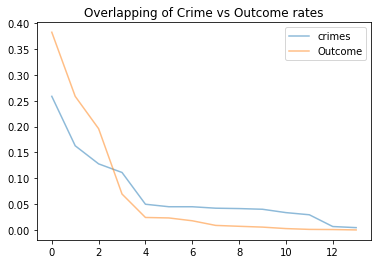

In [40]:
plt.plot(Crimes_commited['%scale compared to total'],  
         alpha=0.5, 
         label='crimes') 
  
plt.plot(outcome_crimes['%scale compared to total'], 
         alpha=0.5, 
         label='Outcome') 
  
plt.legend(loc='upper right') 
plt.title('Overlapping of Crime vs Outcome rates') 
plt.show()

Here we see the rates to which crimes are committed to which outcomes are given for the respective crime; we find a small discrepency between the two however relatively interlinked

In [41]:
pd.set_option('display.max_columns', None)

df_crime.head()

Crime ID    Month  \
0                                                     2019-10   
1                                                     2019-10   
2  23ec49b879ae98cbe271fa4c7f87d24bbe386d1a7e5437...  2019-10   
3  c342ee15a58a80f4d03ff91b20d25ce9dd633ac38e649a...  2019-10   
4  91391df9f41a8ed353ea290ec8aaa73b2fe02856adc6c9...  2019-10   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service  -0.122940   
1  Metropolitan Police Service  Metropolitan Police Service  -0.122310   
2  Metropolitan Police Service  Metropolitan Police Service  -0.121515   
3  Metropolitan Police Service  Metropolitan Police Service  -0.123337   
4  Metropolitan Police Service  Metropolitan Police Service  -0.123337   

    Latitude                    Location  LSOA code    LSOA name  \
0  51.526341  On or near Tavistock Place  E01000937  Camden 025B   
1  51.525521   On or near Henrietta Mews  E01000937  Camden 025B   
2  51.526642    On or near Regent Square  E01000937  Camden 025B   
3  51.525448    On or near Hunter Street  E01000937  Camden 025B   
4  51.525448    On or near Hunter Street  E01000937  Camden 025B   

              Crime type          Last outcome category Context  \
0  Anti-social behaviour                                          
1  Anti-social behaviour                                          
2               Burglary      Status update unavailable           
3                  Drugs  Offender given penalty notice           
4                  Drugs               Local resolution           

                    geometry  Counter  
0  POINT (-0.12294 51.52634)        1  
1  POINT (-0.12231 51.52552)        1  
2  POINT (-0.12152 51.52664)        1  
3  POINT (-0.12334 51.52545)        1  
4  POINT (-0.12334 51.52545)        1

# Feature Engineering

https://scikit-learn.org/stable/modules/feature_selection.html?highlight=boolean
**Almost all of the stop and search data is of categorical type hence to be able to use feature select and compose dimensionality reduction, I have chosen to first increase dimensionality by creating features from column variable using nominal encoding. This will allow improved estimators and accuracy scores to be made therefore boost performance.**


***Highlight of a few variables I will add to allow a futhering of investigation;***


**Outcome of crimes:**

•I will be adding 'Arrested' column from outcome = ['Under investigation','Awaiting Court outcome' and 'Court result unavailable']



•I will be adding 'Domestic resolution' column from outcome = ['Formal action is not in the public interest' and 'Action to be taken by another organisation' and 'Local resolution' and 'Further investigation is not in the public interest']

•I will be adding 'Warning Given' from outcome =   ['Status update unavailable','Offender given penalty notice','Offender given a caution','Offender given a drugs possession warning']

•I will be adding 'No Further Action' from outcome =   ['Investigation complete; no suspect identified' and 'Unable to prosecute suspect'] 


**Crime commited**

•I will be adding 'Theft' from Crime type = ['Other theft'; 'Bicycle theft'; 'Shoplifting','Theft from the person']

•I will be adding 'Robbery' from Crime type = ['Robbery','Burglary','Violence and sexual offences']

•I will be adding 'Social_Infringement' from Crime type = ['Anti-social behaviour','Public order','Criminal damage and arson']

•I will be adding 'Drug,Weapon and other' from crime type = ['Drugs', 'Other crime','Possession of weapons','Vehicle crime']










#['Status update unavailable', 'Offender given penalty notice', , 'Offender given a caution', ,'Offender given #a drugs possession warning', 'Action to be taken by another organisation', 'Further investigation is not in #the public interest']

In [42]:
#Adding Arrested Column
#I will be adding 'Arrested' column from outcome = ['Under investigation','Awaiting Court outcome' and 'Court result unavailable']

df_crime['Arrested']=((df_crime['Last outcome category']=='Under investigation') | (df_crime['Last outcome category']=='Awaiting court outcome')|(df_crime['Last outcome category']=='Court result unavailable'))

#Adding Domestic Column

#I will be adding 'Domestic' column from outcome = ['Formal action is not in the public interest' and 'Local resolution']

df_crime['Domestic']=((df_crime['Last outcome category']=='Formal action is not in the public interest') | (df_crime['Last outcome category']=='Local resolution')|(df_crime['Last outcome category']=='Action to be taken by another organisation')|(df_crime['Last outcome category']=='Further investigation is not in the public interest'))

df_crime['Warning Given']=((df_crime['Last outcome category']=='Status update unavailable')|(df_crime['Last outcome category']=='Offender given penalty notice')|(df_crime['Last outcome category']=='Offender given a caution')|(df_crime['Last outcome category']=='Offender given a drugs possession warning'))
#Adding NFA Column

#I will be adding 'No Further Action' from outcome = ['Investigation complete; no suspect identified' and Unable to prosecute suspect]

df_crime['No Further Action']=((df_crime['Last outcome category']=='Investigation complete; no suspect identified') | (df_crime['Last outcome category']=='Unable to prosecute suspect'))

#Adding Theft Column

#I will be adding 'Theft' from Crime type = ['Other theft'; 'Bicycle theft'; 'Shoplifting']

df_crime['Theft']=((df_crime['Crime type']=='Other theft') | (df_crime['Crime type']=='Bicycle theft')|(df_crime['Crime type']=='Shoplifting'))

#Adding Robbery Column

#1I will be adding 'Robbery' from Crime type = ['Robbery','Burglary']

df_crime['Robbery']=((df_crime['Crime type']=='Robbery') | (df_crime['Crime type']=='Burglary'))

#Adding Social_Infringement column

#I will be adding 'Social_Infringement' from Crime type = ['Anti-social behaviour','Public order']

df_crime['Social_Infringement']=((df_crime['Crime type']=='Anti-social behaviour') | (df_crime['Crime type']=='Public order'))

#Adding 'Drug_weapon_other'

#I will be adding 'Drug,Weapon and other' from crime type = ['Drugs', 'Other crime','Possession of weapons']

df_crime['Drug,Weapon and other']=((df_crime['Crime type']=='Drugs') | (df_crime['Crime type']=='Other crime')|(df_crime['Crime type']=='Possession of weapons'))


In [43]:
df_crime.tail()

Crime ID    Month  \
64419  c9880ca0159dde4824aae22fc77b53e6837ceab602789c...  2020-10   
64420  092e2c6aa03e026b5398dd1ed1e2fb0dffba315341d17c...  2020-10   
64421  0440b0b0be071c901fd2c86ef7d94e19633e29d13d63bc...  2020-10   
64422  ac04a0563d6464908f5061c431512e492b87de52be6c19...  2020-10   
64423  3b96d8c23a246606a0c13bcaed5b91cc5e1ef7a323660e...  2020-10   

                 Reported by           Falls within  Longitude   Latitude  \
64419  City of London Police  City of London Police  -0.074901  51.506255   
64420  City of London Police  City of London Police  -0.074901  51.506255   
64421  City of London Police  City of London Police  -0.079130  51.507808   
64422  City of London Police  City of London Police  -0.076031  51.509547   
64423  City of London Police  City of London Police  -0.121813  51.507133   

                             Location  LSOA code           LSOA name  \
64419                 On or near A100  E01004293  Tower Hamlets 027B   
64420                 On or near A100  E01004293  Tower Hamlets 027B   
64421       On or near Ferry Terminal  E01004293  Tower Hamlets 027B   
64422           On or near Tower Hill  E01004293  Tower Hamlets 027B   
64423  On or near Victoria Embankment  E01004733    Westminster 020C   

                  Crime type                          Last outcome category  \
64419                  Drugs      Offender given a drugs possession warning   
64420                  Drugs                       Offender given a caution   
64421            Other theft  Investigation complete; no suspect identified   
64422  Theft from the person                            Under investigation   
64423           Public order  Investigation complete; no suspect identified   

      Context                   geometry  Counter  Arrested  Domestic  \
64419          POINT (-0.07490 51.50625)        1     False     False   
64420          POINT (-0.07490 51.50625)        1     False     False   
64421          POINT (-0.07913 51.50781)        1     False     False   
64422          POINT (-0.07603 51.50955)        1      True     False   
64423          POINT (-0.12181 51.50713)        1     False     False   

       Warning Given  No Further Action  Theft  Robbery  Social_Infringement  \
64419           True              False  False    False                False   
64420           True              False  False    False                False   
64421          False               True   True    False                False   
64422          False              False  False    False                False   
64423          False               True  False    False                 True   

       Drug,Weapon and other  
64419                   True  
64420                   True  
64421                  False  
64422                  False  
64423                  False

In [44]:
#We find that
df_crime['Arrested'].value_counts()

False    50032
True      6256
Name: Arrested, dtype: int64

In [46]:
print(round(6256/121221 * 100,2), "% of crime ends in an arrest.")

5.16 % of crime ends in an arrest.


In [47]:
df_crime['Crime type'].unique()

[Anti-social behaviour, Burglary, Drugs, Other theft, Robbery, ..., Bicycle theft, Public order, Shoplifting, Other crime, Possession of weapons]
Length: 14
Categories (14, object): [Anti-social behaviour, Burglary, Drugs, Other theft, ..., Public order, Shoplifting, Other crime, Possession of weapons]

Lets analyse how many arrests were made on a monthly basis hence focusing on how potentially Lockdown has impacted arrests

In [48]:
arrest_monthly_analysis= df_crime.groupby('Month')['Arrested'].value_counts().rename('Counts').to_frame()
arrest_monthly_analysis['Arrest % True/False'] = (100 * arrest_monthly_analysis / arrest_monthly_analysis.groupby(level=0).sum())
arrest_monthly_analysis.reset_index(level=[1],inplace=True)
arrest_monthly_analysis

Arrested  Counts  Arrest % True/False
Month                                         
2019-10     False    5357            95.797568
2019-10      True     235             4.202432
2019-11     False    5057            95.361116
2019-11      True     246             4.638884
2019-12     False    4758            95.484648
2019-12      True     225             4.515352
2020-01     False    4755            94.948083
2020-01      True     253             5.051917
2020-02     False    4950            96.303502
2020-02      True     190             3.696498
2020-03     False    3949            95.064998
2020-03      True     205             4.935002
2020-04     False    2730            95.088819
2020-04      True     141             4.911181
2020-05     False    2942            95.056543
2020-05      True     153             4.943457
2020-06     False    2853            88.547486
2020-06      True     369            11.452514
2020-07     False    3319            86.207792
2020-07      True     531            13.792208
2020-08     False    3615            81.713382
2020-08      True     809            18.286618
2020-09     False    3190            73.165138
2020-09      True    1170            26.834862
2020-10     False    2557            59.659356
2020-10      True    1729            40.340644

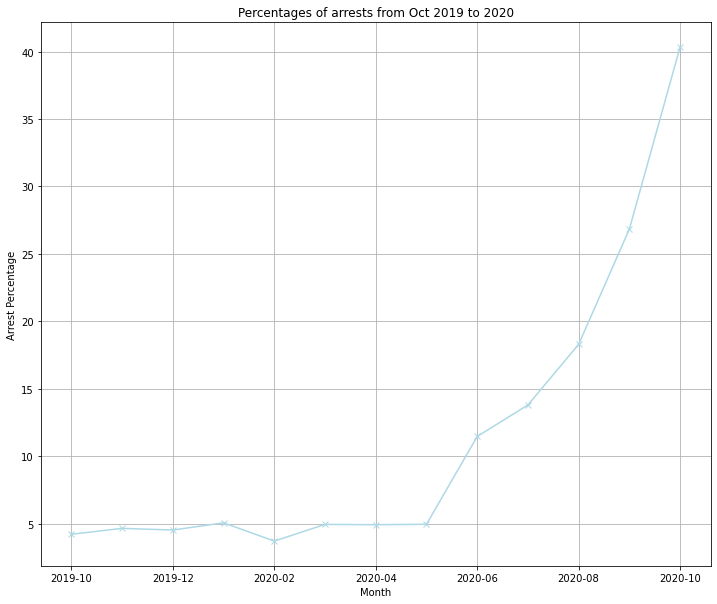

In [49]:
# Visualise the change in percentage of Arrests made in the city of London during 2019 Oct - 2020 Oct
Visualised_arrest_monthly = arrest_monthly_analysis[arrest_monthly_analysis['Arrested'] == True]['Arrest % True/False']
labels = Visualised_arrest_monthly.index.values
fig=plt.figure(figsize=(12, 10))

#ax.axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)

plt.title('Percentages of arrests from Oct 2019 to 2020')
plt.xlabel("Month")
plt.ylabel("Arrest Percentage")

Visualised_arrest_monthly.plot(grid=True, marker='x', color='lightblue')

We see a steady of increase of arrests over the year begining with 67 Arrests made in October 2019 - Until lockdown had been inplace arrests were below 5% of total crime commited in the city of London however after May we have seen an increase of rates steadily increasing; reaching 39% at October 2020.

In [52]:
Domestic_monthly_analysis= df_crime.groupby('Month')['Domestic'].value_counts().rename('Counts').to_frame()
Domestic_monthly_analysis['Domestic % True/False'] = (100 * Domestic_monthly_analysis / Domestic_monthly_analysis.groupby(level=0).sum())
Domestic_monthly_analysis.reset_index(level=[1],inplace=True)
Domestic_monthly_analysis

Domestic  Counts  Domestic % True/False
Month                                           
2019-10     False    5477              97.943491
2019-10      True     115               2.056509
2019-11     False    5156              97.227984
2019-11      True     147               2.772016
2019-12     False    4857              97.471403
2019-12      True     126               2.528597
2020-01     False    4842              96.685304
2020-01      True     166               3.314696
2020-02     False    4988              97.042802
2020-02      True     152               2.957198
2020-03     False    4045              97.376023
2020-03      True     109               2.623977
2020-04     False    2792              97.248346
2020-04      True      79               2.751654
2020-05     False    2982              96.348950
2020-05      True     113               3.651050
2020-06     False    3133              97.237741
2020-06      True      89               2.762259
2020-07     False    3743              97.220779
2020-07      True     107               2.779221
2020-08     False    4292              97.016275
2020-08      True     132               2.983725
2020-09     False    4265              97.821101
2020-09      True      95               2.178899
2020-10     False    4185              97.643490
2020-10      True     101               2.356510

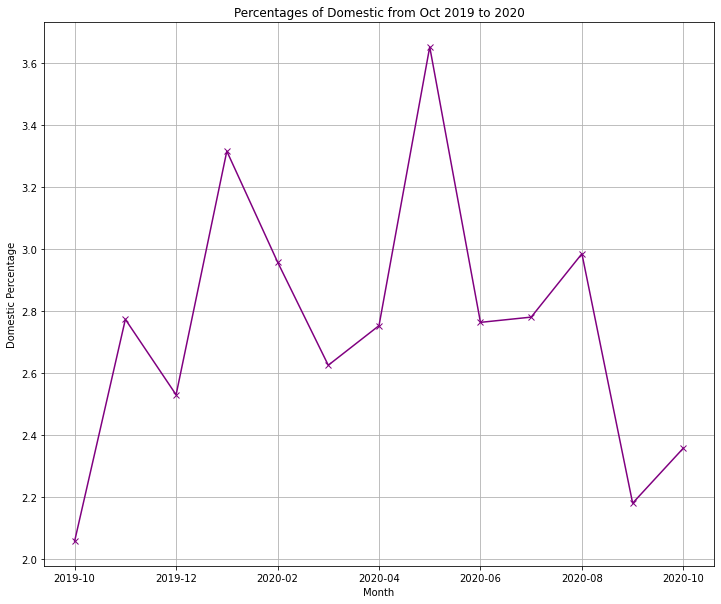

In [53]:
# Visualise the change in percentage of Arrests made in the city of London during 2019 Oct - 2020 Oct
Visualised_Domestic_monthly = Domestic_monthly_analysis[Domestic_monthly_analysis['Domestic'] == True]['Domestic % True/False']
labels = Visualised_Domestic_monthly.index.values
fig=plt.figure(figsize=(12, 10))

#axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)

plt.title('Percentages of Domestic from Oct 2019 to 2020')
plt.xlabel("Month")
plt.ylabel("Domestic Percentage")

Visualised_Domestic_monthly.plot(grid=True, marker='x', color='purple')

Domestic Crime stayed static however peaked between March-June 2020 which tells us that potential domestic crimes were high during this time which is parralel to recent reports that during lockdown domestic crimes was at an all time high.

In [54]:
Warnings_monthly_analysis= df_crime.groupby('Month')['Warning Given'].value_counts().rename('Counts').to_frame()
Warnings_monthly_analysis['Warnings % True/False'] = (100 * Warnings_monthly_analysis / Warnings_monthly_analysis.groupby(level=0).sum())
Warnings_monthly_analysis.reset_index(level=[1],inplace=True)
Warnings_monthly_analysis


#df_crime['Warning Given']=((df_crime['Last outcome category']=='Status update unavailable')|(df_crime['Last outcome category']=='Offender given penalty notice')|(df_crime['Last outcome category']=='Offender given a caution')|(df_crime['Last outcome category']=='Offender given a drugs possession warning'))
#Adding NFA Column

Warning Given  Counts  Warnings % True/False
Month                                                
2019-10          False    3028              54.148784
2019-10           True    2564              45.851216
2019-11          False    3010              56.760324
2019-11           True    2293              43.239676
2019-12          False    2773              55.649207
2019-12           True    2210              44.350793
2020-01          False    2906              58.027157
2020-01           True    2102              41.972843
2020-02          False    3327              64.727626
2020-02           True    1813              35.272374
2020-03          False    3890              93.644680
2020-03           True     264               6.355320
2020-04          False    2727              94.984326
2020-04           True     144               5.015674
2020-05          False    2862              92.471729
2020-05           True     233               7.528271
2020-06          False    3173              98.479205
2020-06           True      49               1.520795
2020-07          False    3777              98.103896
2020-07           True      73               1.896104
2020-08          False    4364              98.643761
2020-08           True      60               1.356239
2020-09          False    4291              98.417431
2020-09           True      69               1.582569
2020-10          False    4230              98.693420
2020-10           True      56               1.306580

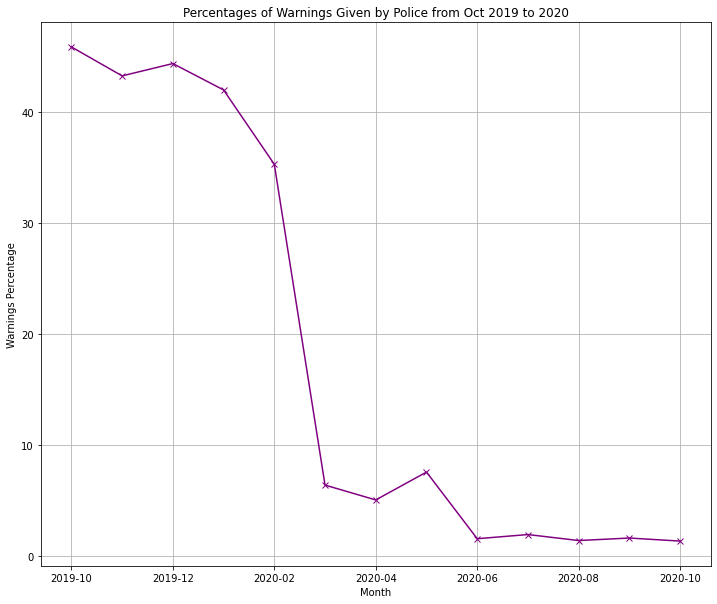

In [55]:
# Visualise the change in percentage of NFA made in the city of London during 2019 Oct - 2020 Oct
Visualised_Warnings_monthly = Warnings_monthly_analysis[Warnings_monthly_analysis['Warning Given'] == True]['Warnings % True/False']
labels = Visualised_Warnings_monthly.index.values
fig=plt.figure(figsize=(12, 10))

#axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)

plt.title('Percentages of Warnings Given by Police from Oct 2019 to 2020')
plt.xlabel("Month")
plt.ylabel("Warnings Percentage")

Visualised_Warnings_monthly.plot(grid=True, marker='x', color='purple')

We see a huge decline as soon as the lockdown kicked in dropping a staggering 30% from previous moths which questions the how the police force may have handled cases which would have previously been given a warning.

In [56]:
#'No Further Action' from outcome = ['Investigation complete; no suspect identified' and Unable to prosecute suspect]

SyntaxError: invalid syntax (<ipython-input-56-96bce30ce94b>, line 1)

In [57]:
NFA_monthly_analysis= df_crime.groupby('Month')['No Further Action'].value_counts().rename('Counts').to_frame()
NFA_monthly_analysis['NFA % True/False'] = (100 * NFA_monthly_analysis / NFA_monthly_analysis.groupby(level=0).sum())
NFA_monthly_analysis.reset_index(level=[1],inplace=True)
NFA_monthly_analysis

No Further Action  Counts  NFA % True/False
Month                                               
2019-10              False    3897         69.688841
2019-10               True    1695         30.311159
2019-11              False    3627         68.395248
2019-11               True    1676         31.604752
2019-12              False    3380         67.830624
2019-12               True    1603         32.169376
2020-01              False    3337         66.633387
2020-01               True    1671         33.366613
2020-02              False    2972         57.821012
2020-02               True    2168         42.178988
2020-03               True    2733         65.792008
2020-03              False    1421         34.207992
2020-04              False    1963         68.373389
2020-04               True     908         31.626611
2020-05              False    2118         68.432956
2020-05               True     977         31.567044
2020-06              False    1839         57.076350
2020-06               True    1383         42.923650
2020-07               True    2004         52.051948
2020-07              False    1846         47.948052
2020-08              False    2283         51.604882
2020-08               True    2141         48.395118
2020-09              False    2491         57.133028
2020-09               True    1869         42.866972
2020-10              False    3089         72.071862
2020-10               True    1197         27.928138

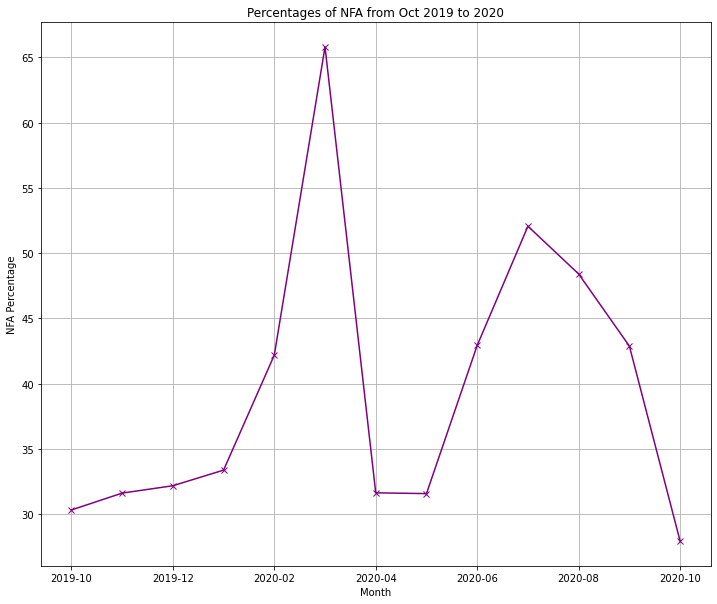

In [58]:
# Visualise the change in percentage of NFA made in the city of London during 2019 Oct - 2020 Oct
Visualised_NFA_monthly = NFA_monthly_analysis[NFA_monthly_analysis['No Further Action'] == True]['NFA % True/False']
labels = Visualised_NFA_monthly.index.values
fig=plt.figure(figsize=(12, 10))

#axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)

plt.title('Percentages of NFA from Oct 2019 to 2020')
plt.xlabel("Month")
plt.ylabel("NFA Percentage")

Visualised_NFA_monthly.plot(grid=True, marker='x', color='purple')

NFA seem to follow no trends however focussing on the lockdown period was a huge dip compared to previous months we find that NFA were at one of its lowest points could this potentioally mean Policing staff had more reasources to find solutions? ; after the lockdown peirod we find another peak potentially due to the sheer number of crimes commited during this period

In [59]:
Theft_monthly_analysis= df_crime.groupby('Month')['Theft'].value_counts().rename('Counts').to_frame()
Theft_monthly_analysis['Theft % True/False'] = (100 * Theft_monthly_analysis / Theft_monthly_analysis.groupby(level=0).sum())
Theft_monthly_analysis.reset_index(level=[1],inplace=True)
Theft_monthly_analysis

Theft  Counts  Theft % True/False
Month                                     
2019-10  False    3893           69.617310
2019-10   True    1699           30.382690
2019-11  False    3682           69.432397
2019-11   True    1621           30.567603
2019-12  False    3496           70.158539
2019-12   True    1487           29.841461
2020-01  False    3629           72.464058
2020-01   True    1379           27.535942
2020-02  False    3469           67.490272
2020-02   True    1671           32.509728
2020-03  False    3106           74.771305
2020-03   True    1048           25.228695
2020-04  False    2569           89.481017
2020-04   True     302           10.518983
2020-05  False    2812           90.856220
2020-05   True     283            9.143780
2020-06  False    2687           83.395407
2020-06   True     535           16.604593
2020-07  False    2970           77.142857
2020-07   True     880           22.857143
2020-08  False    3319           75.022604
2020-08   True    1105           24.977396
2020-09  False    3334           76.467890
2020-09   True    1026           23.532110
2020-10  False    3273           76.364909
2020-10   True    1013           23.635091

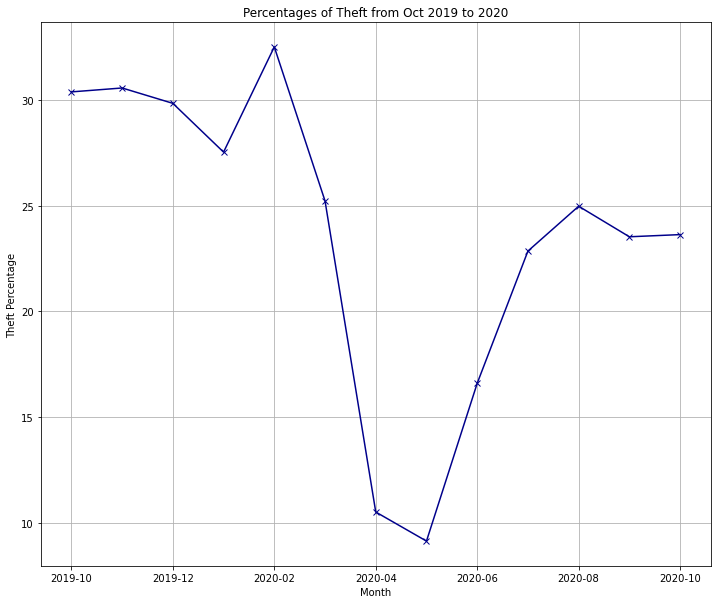

In [60]:
Visualised_Theft_monthly = Theft_monthly_analysis[Theft_monthly_analysis['Theft'] == True]['Theft % True/False']
labels = Visualised_Theft_monthly.index.values
fig=plt.figure(figsize=(12, 10))

#axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)

Visualised_NFA_monthly = NFA_monthly_analysis[NFA_monthly_analysis['No Further Action'] == True]['NFA % True/False']
labels = Visualised_NFA_monthly.index.values

plt.title('Percentages of Theft from Oct 2019 to 2020')
plt.xlabel("Month")
plt.ylabel("Theft Percentage")

Visualised_Theft_monthly.plot(grid=True, marker='x', color='darkblue')

Theft had a huge slump compared to the start of the period reaching 8.7% during the month of May which is the lowest the police of city of london has seen since October 2019 furthermore after lockdown we see a hike again potentially due to people returning back to work? or...more investion shall be made

In [61]:
Robbery_monthly_analysis= df_crime.groupby('Month')['Robbery'].value_counts().rename('Counts').to_frame()
Robbery_monthly_analysis['Robbery % True/False'] = (100 * Robbery_monthly_analysis / Robbery_monthly_analysis.groupby(level=0).sum())
Robbery_monthly_analysis.reset_index(level=[1],inplace=True)
Robbery_monthly_analysis

Robbery  Counts  Robbery % True/False
Month                                         
2019-10    False    5127             91.684549
2019-10     True     465              8.315451
2019-11    False    4845             91.363379
2019-11     True     458              8.636621
2019-12    False    4542             91.149910
2019-12     True     441              8.850090
2020-01    False    4563             91.114217
2020-01     True     445              8.885783
2020-02    False    4799             93.365759
2020-02     True     341              6.634241
2020-03    False    3768             90.707752
2020-03     True     386              9.292248
2020-04    False    2691             93.730408
2020-04     True     180              6.269592
2020-05    False    2920             94.345719
2020-05     True     175              5.654281
2020-06    False    3026             93.916822
2020-06     True     196              6.083178
2020-07    False    3565             92.597403
2020-07     True     285              7.402597
2020-08    False    4136             93.490054
2020-08     True     288              6.509946
2020-09    False    4018             92.155963
2020-09     True     342              7.844037
2020-10    False    4004             93.420439
2020-10     True     282              6.579561

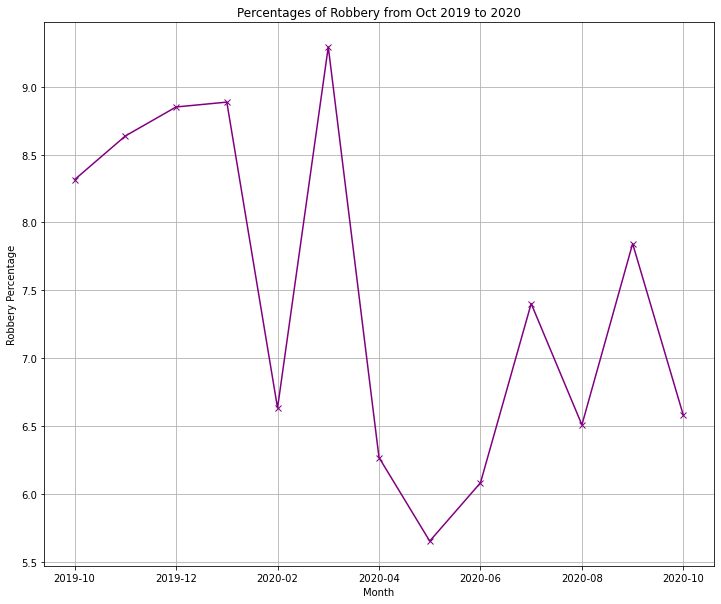

In [62]:
Visualised_Robbery_monthly = Robbery_monthly_analysis[Robbery_monthly_analysis['Robbery'] == True]['Robbery % True/False']
labels = Visualised_Robbery_monthly.index.values
fig=plt.figure(figsize=(12, 10))

#axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)

plt.title('Percentages of Robbery from Oct 2019 to 2020')
plt.xlabel("Month")
plt.ylabel("Robbery Percentage")

Visualised_Robbery_monthly.plot(grid=True, marker='x', color='purple')

Robbery follows a similar trend to theft; eratic over the months prior to the Lockdown however we have seen a dramatic dip in between march and june period; There is a difference when comparing between theft and robbery; Difference between robbery and  theft is that robbery is the use of force & theft is stealing without the use of force.

In [63]:
Social_Infringement_monthly_analysis= df_crime.groupby('Month')['Social_Infringement'].value_counts().rename('Counts').to_frame()
Social_Infringement_monthly_analysis['Social_Infringement % True/False'] = (100 * Social_Infringement_monthly_analysis / Social_Infringement_monthly_analysis.groupby(level=0).sum())
Social_Infringement_monthly_analysis.reset_index(level=[1],inplace=True)
Social_Infringement_monthly_analysis

Social_Infringement  Counts  Social_Infringement % True/False
Month                                                                 
2019-10                False    4429                         79.202432
2019-10                 True    1163                         20.797568
2019-11                False    4172                         78.672450
2019-11                 True    1131                         21.327550
2019-12                False    3973                         79.731086
2019-12                 True    1010                         20.268914
2020-01                False    4005                         79.972045
2020-01                 True    1003                         20.027955
2020-02                False    4153                         80.797665
2020-02                 True     987                         19.202335
2020-03                False    3148                         75.782378
2020-03                 True    1006                         24.217622
2020-04                 True    1698                         59.143156
2020-04                False    1173                         40.856844
2020-05                 True    1756                         56.736672
2020-05                False    1339                         43.263328
2020-06                False    1712                         53.134699
2020-06                 True    1510                         46.865301
2020-07                False    2516                         65.350649
2020-07                 True    1334                         34.649351
2020-08                False    2929                         66.207052
2020-08                 True    1495                         33.792948
2020-09                False    2998                         68.761468
2020-09                 True    1362                         31.238532
2020-10                False    2929                         68.338777
2020-10                 True    1357                         31.661223

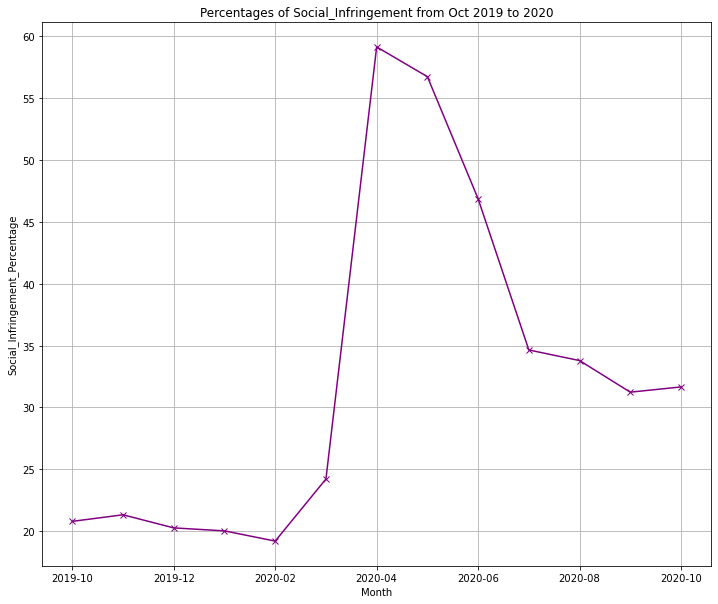

In [64]:
Visualised_Social_Infringement_monthly = Social_Infringement_monthly_analysis[Social_Infringement_monthly_analysis['Social_Infringement'] == True]['Social_Infringement % True/False']
labels = Visualised_Social_Infringement_monthly.index.values
fig=plt.figure(figsize=(12, 10))

#axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)

plt.title('Percentages of Social_Infringement from Oct 2019 to 2020')
plt.xlabel("Month")
plt.ylabel("Social_Infringement_Percentage")

Visualised_Social_Infringement_monthly.plot(grid=True, marker='x', color='purple')

Here we analyse the social disruption of citizens in the City of London; its inevitable to rise due to lockdown potentially because people who were found outside disobeying the lockdown rules would have been classified as Social infringement.

In [65]:
from pandas import DataFrame
Social_Infringement = pd.DataFrame(Visualised_Social_Infringement_monthly)
Robbery=pd.DataFrame(Visualised_Robbery_monthly)
Theft=pd.DataFrame(Visualised_Theft_monthly)
NFA=pd.DataFrame(Visualised_NFA_monthly)
Warnings=pd.DataFrame(Visualised_Warnings_monthly)
Domestic=pd.DataFrame(Visualised_Domestic_monthly)
Arrest=pd.DataFrame(Visualised_arrest_monthly)


All_indicators=[Social_Infringement,Robbery,Theft,NFA,Warnings,Domestic,Arrest];

#df_ind=pd.DataFrame(All_indicators,axis=1)

df_ind_percentage=pd.concat(All_indicators,axis=1)

df_ind=pd.DataFrame(df_ind_percentage)

df_ind.head()

#df_search_all=[search_oct2019,search_Nov2019,search_dec2019,search_jan2020,search_feb2020,search_march2020,search_april2020,search_may2020,search_june2020,
 #              search_july2020,search_august2020,search_Sep2020,search_oct2020];
#df_search= pd.concat(df_search_all , axis=0, join='outer',ignore_index=True, keys=None,
 #         levels=None, names=None, verify_integrity=False, copy=True)

Social_Infringement % True/False  Robbery % True/False  \
Month                                                             
2019-10                         20.797568              8.315451   
2019-11                         21.327550              8.636621   
2019-12                         20.268914              8.850090   
2020-01                         20.027955              8.885783   
2020-02                         19.202335              6.634241   

         Theft % True/False  NFA % True/False  Warnings % True/False  \
Month                                                                  
2019-10           30.382690         30.311159              45.851216   
2019-11           30.567603         31.604752              43.239676   
2019-12           29.841461         32.169376              44.350793   
2020-01           27.535942         33.366613              41.972843   
2020-02           32.509728         42.178988              35.272374   

         Domestic % True/False  Arrest % True/False  
Month                                                
2019-10               2.056509             4.202432  
2019-11               2.772016             4.638884  
2019-12               2.528597             4.515352  
2020-01               3.314696             5.051917  
2020-02               2.957198             3.696498

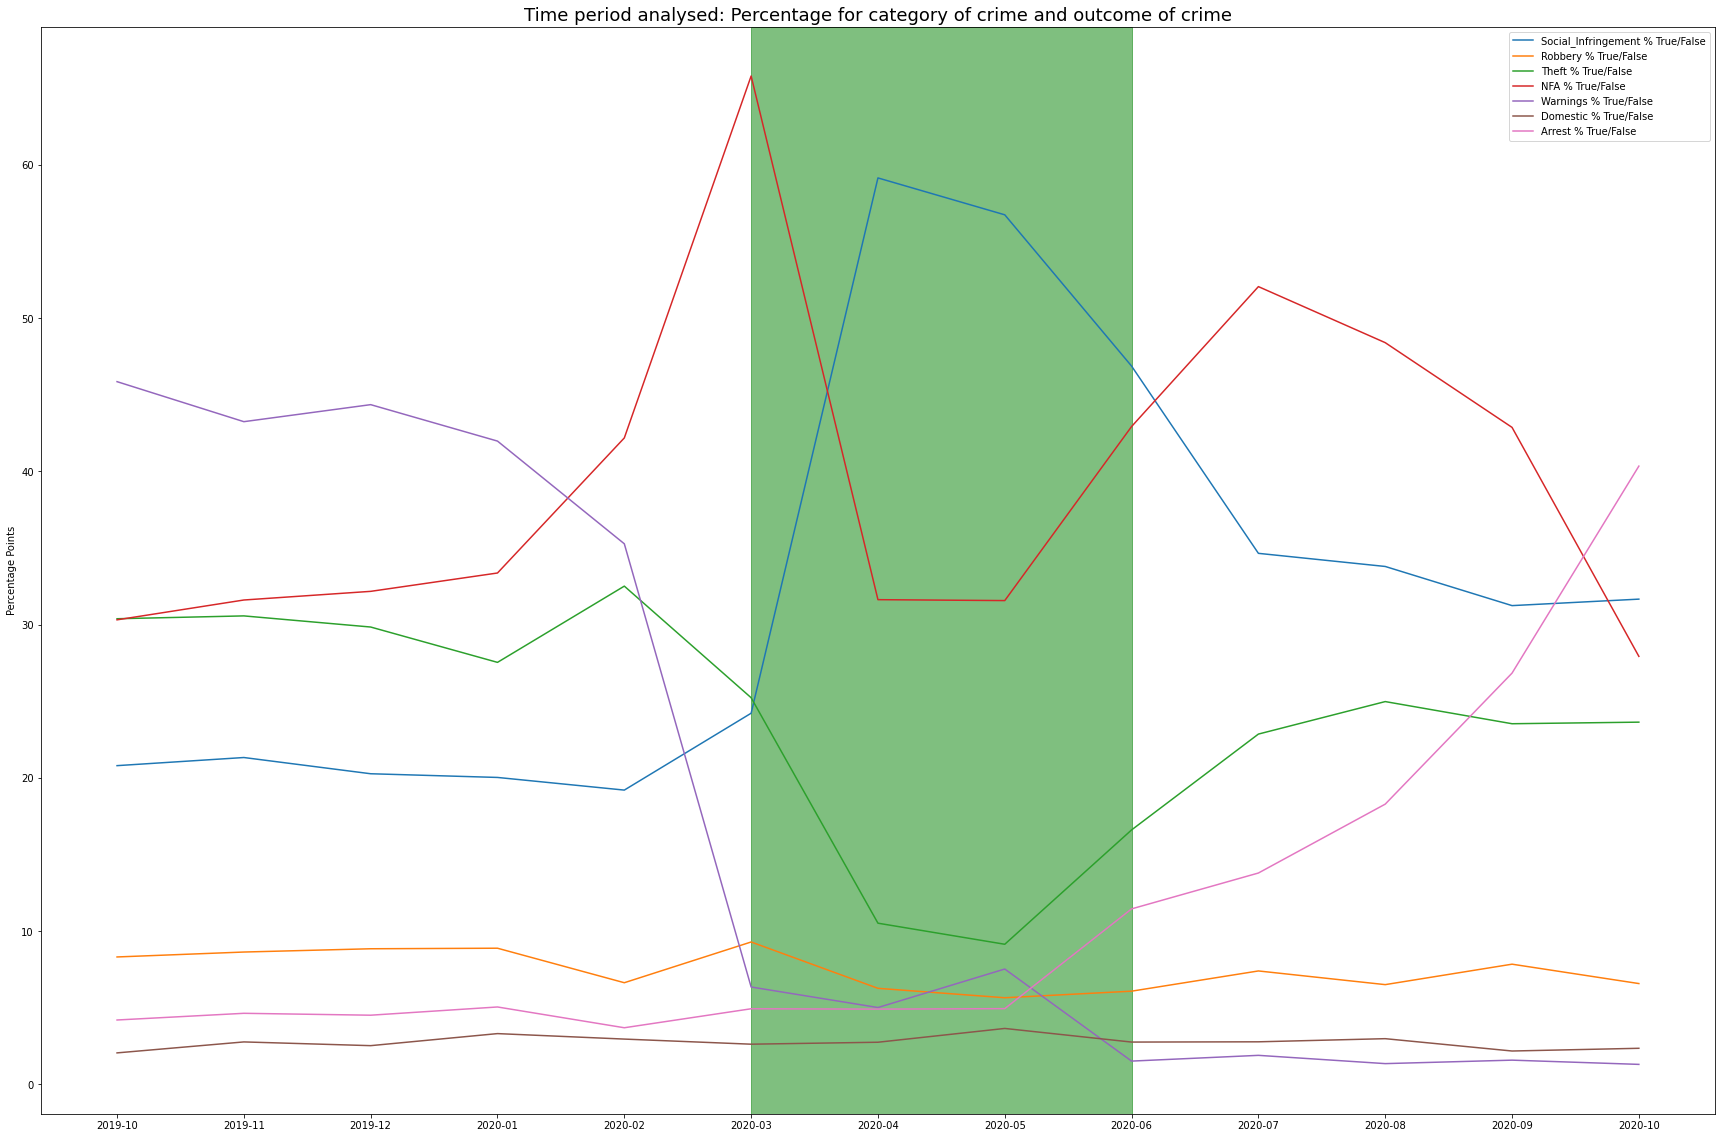

In [66]:
fig,ax=plt.subplots(figsize = (30,20))
ax.plot(df_ind)

ax.axvspan('2020-03','2020-06',label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)
ax.legend(df_ind)

ax.set_ylabel('Percentage Points')
ax.set_title('Time period analysed: Percentage for category of crime and outcome of crime', size=18)
plt.show()

Significant changes over the period year we see dramatic drops from **Crimes**: Theft,Robbery| **Outcomes**: NFA,Warnings **Increases** from Social infringement,and Arrests while a small increase for domestic violence!

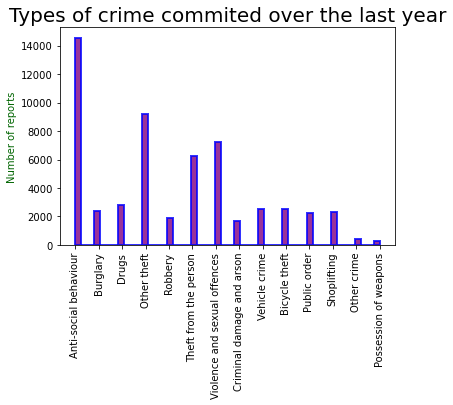

In [67]:
#graph of crimes per month
plt.hist(df_crime['Crime type'],bins=50,color='Purple', alpha=0.8, label='Value', edgecolor='blue', linewidth=2)
plt.rcParams["figure.figsize"] = [15,5]
plt.title('Types of crime commited over the last year',fontsize = 20)
#plt.xlabel('',color='darkgreen')
plt.ylabel("Number of reports",color='darkgreen')
plt.xticks(rotation = 90)
plt.show()

High number of Anti-social behavior(ASB) linked to the ASB being used as the category outcome of those who are found breaking lockdown laws

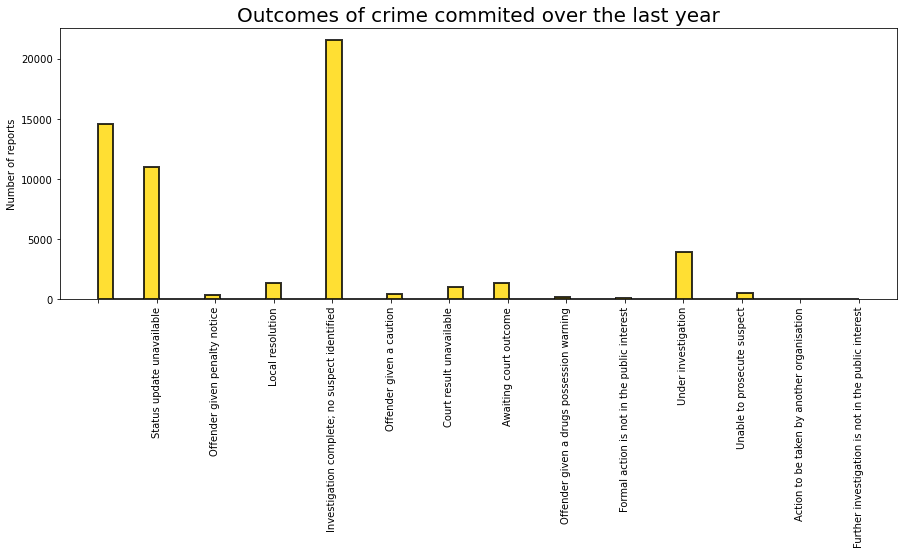

In [68]:
#Histogram of outcome of crimes in the uk over the year
plt.hist(df_crime['Last outcome category'],bins=50,color='gold', alpha=0.8, label='Value', edgecolor='black', linewidth=2)
plt.rcParams["figure.figsize"] = [15,5]
plt.title('Outcomes of crime commited over the last year',fontsize = 20)
#plt.xlabel('',color='darkgreen')
plt.ylabel("Number of reports",color='black')
plt.xticks(rotation = 90)
plt.show()

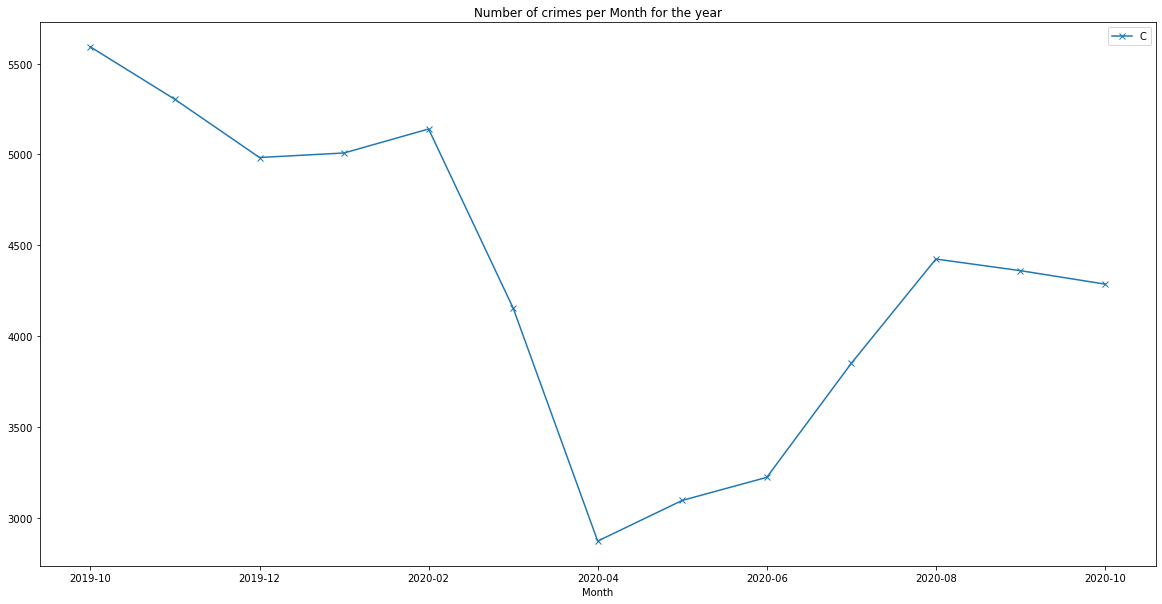

In [69]:
plt.figure(figsize=(20,10))
df_crime.groupby('Month').count()['Crime ID'].plot.line(marker='x')
plt.title("Number of crimes per Month for the year")
plt.legend('Crime over time')

In [70]:
#Introduce datetime analysis to be able to investigate for respective time
df_crime.Date = pd.to_datetime(df_crime.Month, format = '%Y/%m')
df_crime.index = pd.DatetimeIndex(df_crime.Month)

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:167: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


In [71]:
df_crime.head()

Crime ID    Month  \
Month                                                                    
2019-10-01                                                     2019-10   
2019-10-01                                                     2019-10   
2019-10-01  23ec49b879ae98cbe271fa4c7f87d24bbe386d1a7e5437...  2019-10   
2019-10-01  c342ee15a58a80f4d03ff91b20d25ce9dd633ac38e649a...  2019-10   
2019-10-01  91391df9f41a8ed353ea290ec8aaa73b2fe02856adc6c9...  2019-10   

                            Reported by                 Falls within  \
Month                                                                  
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   

            Longitude   Latitude                    Location  LSOA code  \
Month                                                                     
2019-10-01  -0.122940  51.526341  On or near Tavistock Place  E01000937   
2019-10-01  -0.122310  51.525521   On or near Henrietta Mews  E01000937   
2019-10-01  -0.121515  51.526642    On or near Regent Square  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   

              LSOA name             Crime type          Last outcome category  \
Month                                                                           
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B               Burglary      Status update unavailable   
2019-10-01  Camden 025B                  Drugs  Offender given penalty notice   
2019-10-01  Camden 025B                  Drugs               Local resolution   

           Context                   geometry  Counter  Arrested  Domestic  \
Month                                                                        
2019-10-01          POINT (-0.12294 51.52634)        1     False     False   
2019-10-01          POINT (-0.12231 51.52552)        1     False     False   
2019-10-01          POINT (-0.12152 51.52664)        1     False     False   
2019-10-01          POINT (-0.12334 51.52545)        1     False     False   
2019-10-01          POINT (-0.12334 51.52545)        1     False      True   

            Warning Given  No Further Action  Theft  Robbery  \
Month                                                          
2019-10-01          False              False  False    False   
2019-10-01          False              False  False    False   
2019-10-01           True              False  False     True   
2019-10-01           True              False  False    False   
2019-10-01          False              False  False    False   

            Social_Infringement  Drug,Weapon and other  
Month                                                   
2019-10-01                 True                  False  
2019-10-01                 True                  False  
2019-10-01                False                  False  
2019-10-01                False                   True  
2019-10-01                False                   True

In [72]:
#Build pivot table allowing visual of change of each crime type over the period of the year 
df_crime_month = df_crime.pivot_table('Crime ID', aggfunc = np.size, columns = 'Crime type', 
                                         index = df_crime['Month'].index.date, fill_value = 0)
df_crime_month.index = pd.DatetimeIndex(df_crime_month.index)


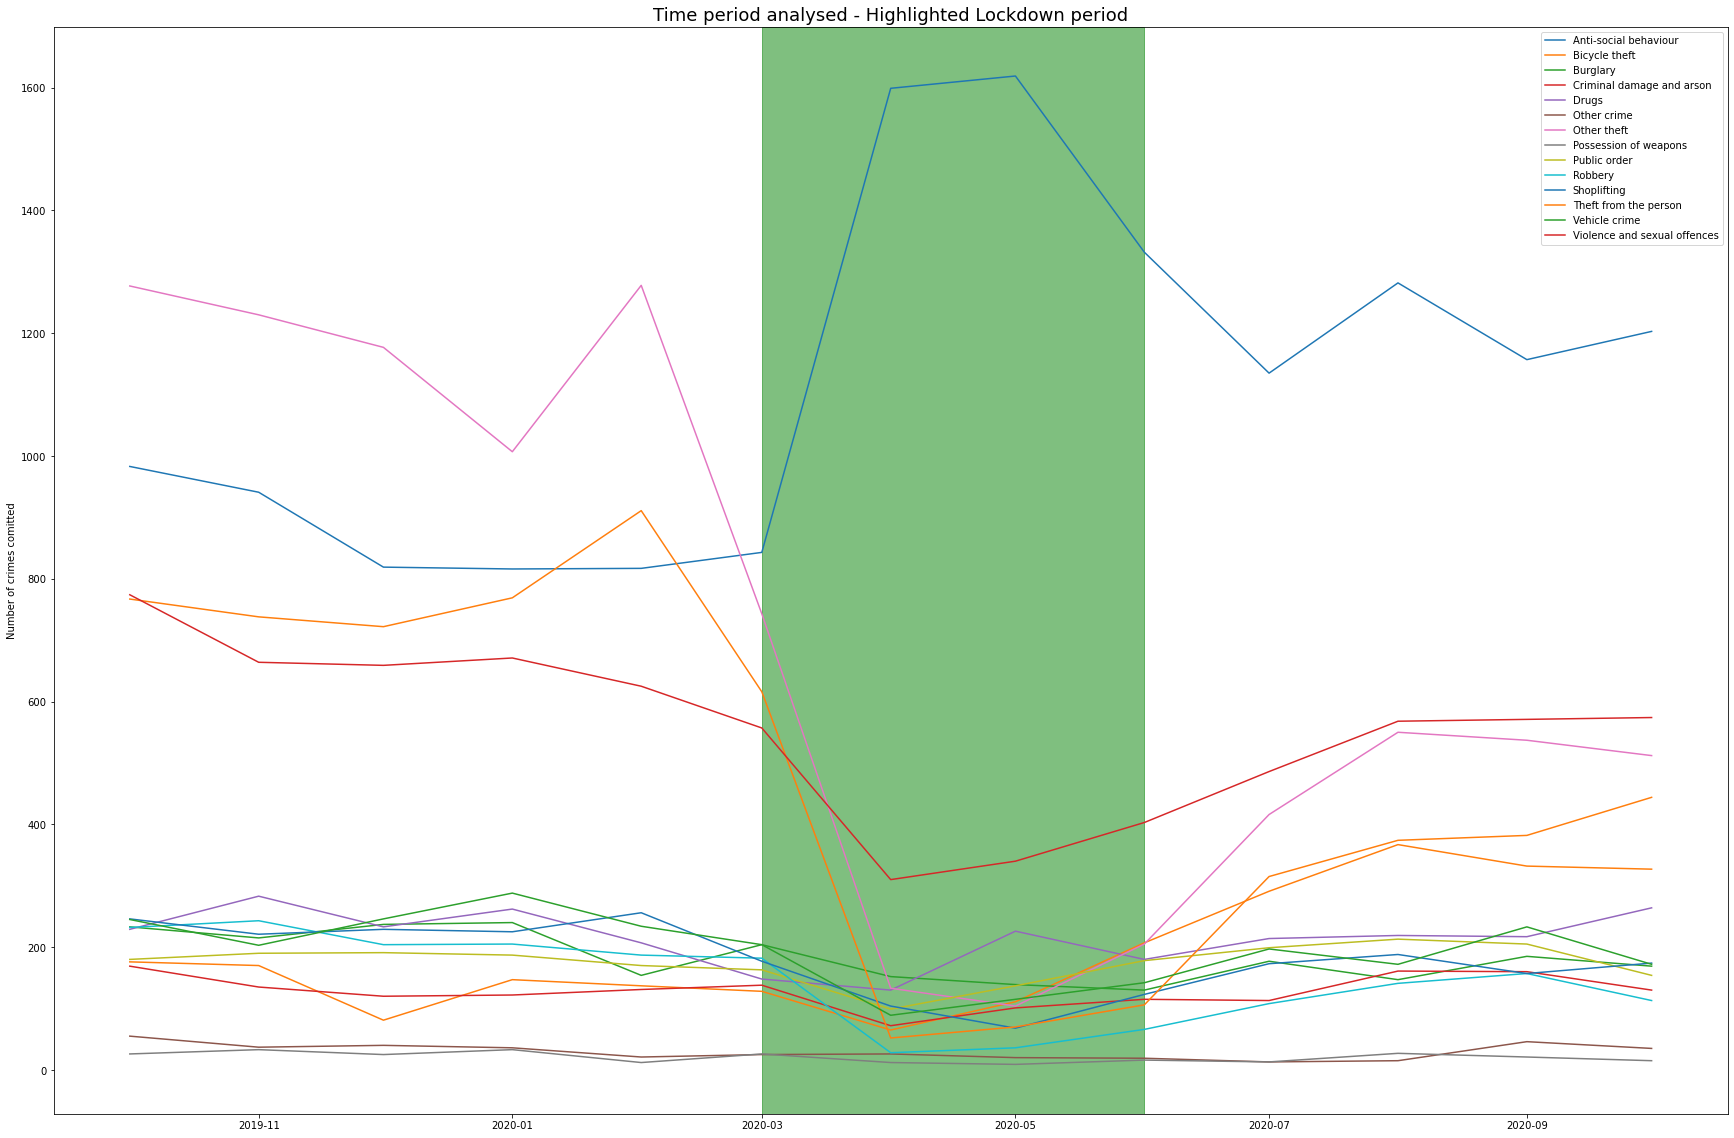

In [73]:
#Visualise different categories of crime sprouts over the period of the year
#Technical help from https://datavizpyr.com/highlight-a-time-range-in-time-series-plot-in-python-with-matplotlib/#:~:text=%20How%20To%20Highlight%20a%20Time%20Range%20in,Unemployment%20Claims%20Over%20Time%27%2C%20size%3D18%29.%20%20More%20


fig,ax=plt.subplots(figsize = (30,20))
ax.plot(df_crime_month)

ax.axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='Green',alpha=0.5)
ax.legend()
ax.legend(df_crime_month)

ax.set_ylabel('Number of crimes comitted')
ax.set_title('Time period analysed - Highlighted Lockdown period', size=18)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6721a0580>,
      dtype=object)

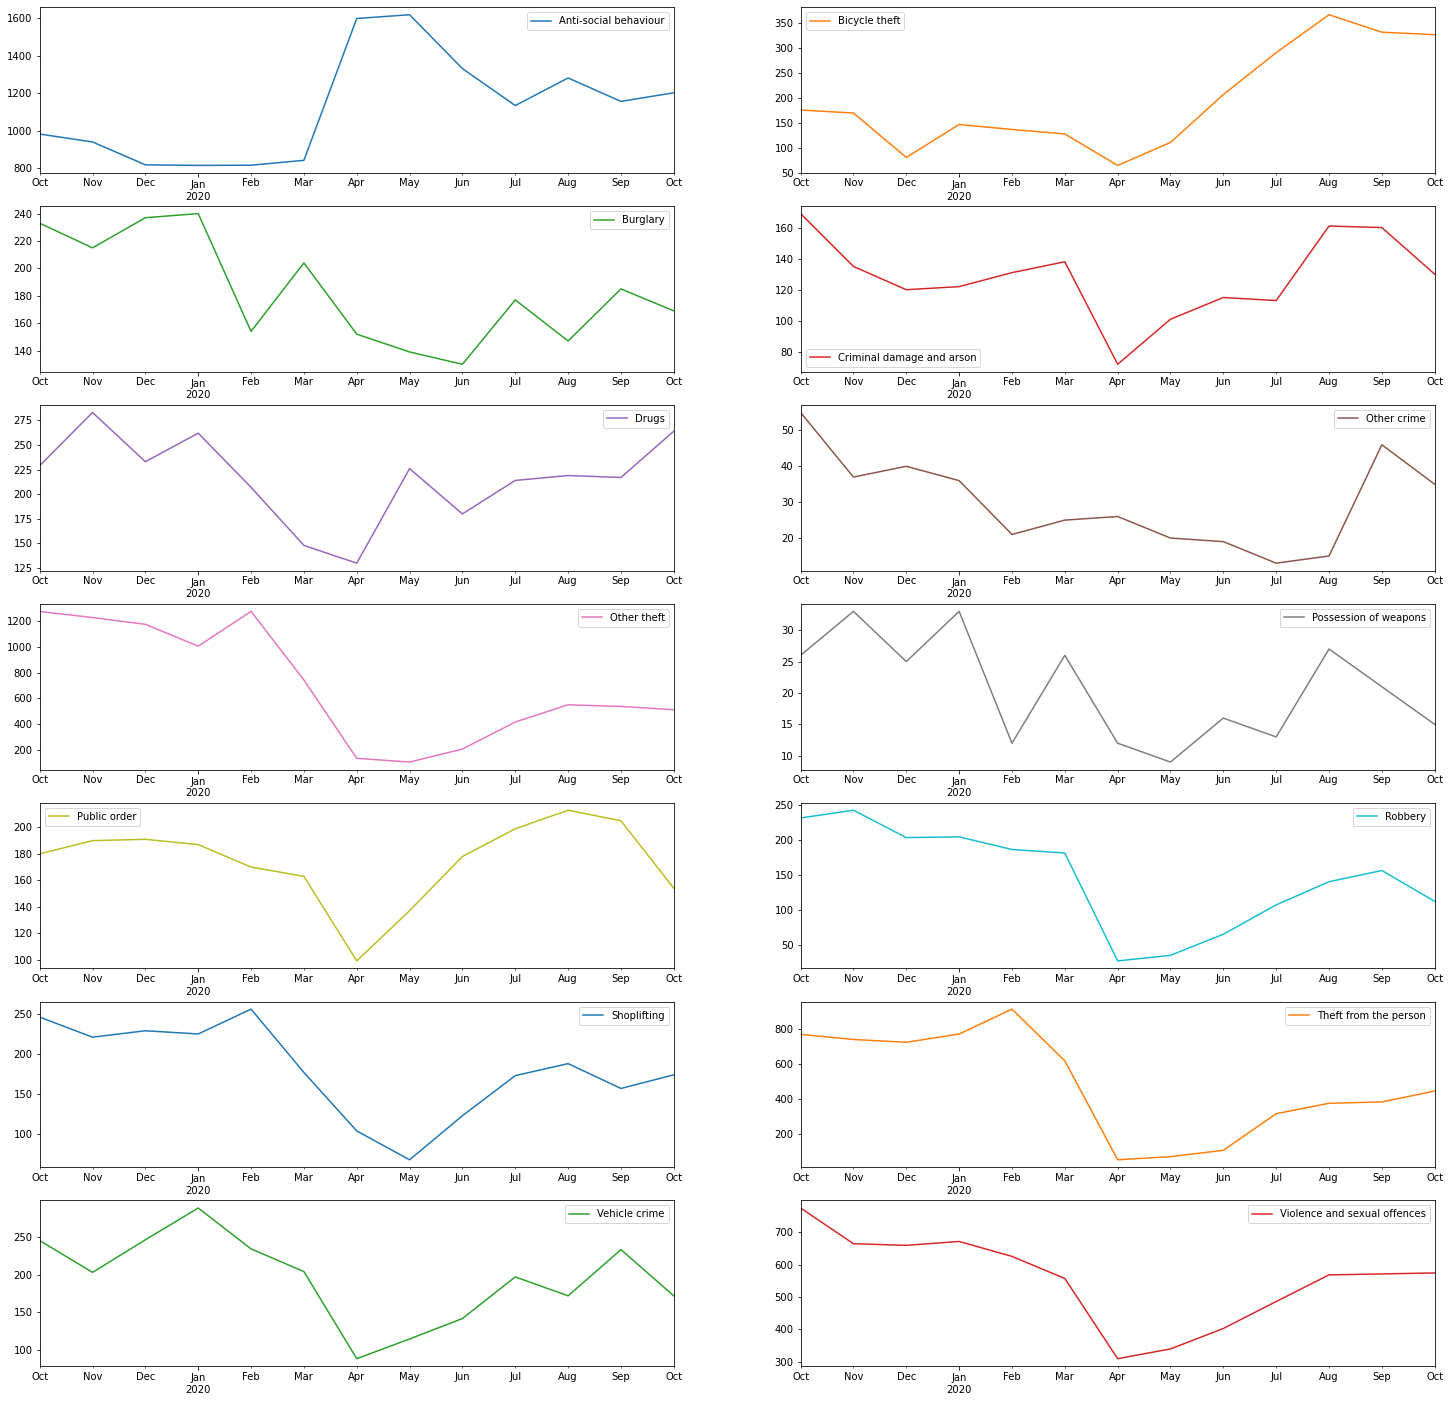

In [74]:
#Visualising each crimetype seperately allowing an investigation of crime type to be made 
df_crime_month.plot(figsize = (25,25), subplots = True,layout=(7,2),
                                  sharex = False, sharey = False)


We see the shows the raw trends and relationship between outcome and Lets look of their respective crime, however previous graphs show the averge trend of each feature however weighted to the amount of instance.

In [426]:
df_crime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 56288 entries, 2019-10-01 to 2020-10-01
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Crime ID               56288 non-null  object        
 1   Month                  56288 non-null  datetime64[ns]
 2   Reported by            56288 non-null  object        
 3   Falls within           56288 non-null  object        
 4   Longitude              56288 non-null  float64       
 5   Latitude               56288 non-null  float64       
 6   Location               56288 non-null  object        
 7   LSOA code              56288 non-null  object        
 8   LSOA name              56288 non-null  object        
 9   Crime type             56288 non-null  category      
 10  Last outcome category  56288 non-null  category      
 11  Context                56288 non-null  object        
 12  geometry               56288 non-nu

In [427]:
# Lets convert all boolean columns into int column represented by 1 and 0
df_crime.replace(False, 0, inplace=True)

In [77]:
df_crime.corr()

Longitude  Latitude  Counter  Arrested  Domestic  \
Longitude               1.000000  0.458284      NaN  0.036024 -0.009450   
Latitude                0.458284  1.000000      NaN  0.008279 -0.007066   
Counter                      NaN       NaN      NaN       NaN       NaN   
Arrested                0.036024  0.008279      NaN  1.000000 -0.059128   
Domestic               -0.009450 -0.007066      NaN -0.059128  1.000000   
Warning Given          -0.101429 -0.061913      NaN -0.183383 -0.086717   
No Further Action      -0.007898  0.000543      NaN -0.283511 -0.134064   
Theft                  -0.047040 -0.073092      NaN -0.022000 -0.048233   
Robbery                 0.003054  0.015951      NaN  0.067968 -0.045109   
Social_Infringement     0.073747  0.054439      NaN -0.157899 -0.100531   
Drug,Weapon and other   0.000133 -0.022686      NaN  0.155750  0.484508   

                       Warning Given  No Further Action     Theft   Robbery  \
Longitude                  -0.101429          -0.007898 -0.047040  0.003054   
Latitude                   -0.061913           0.000543 -0.073092  0.015951   
Counter                          NaN                NaN       NaN       NaN   
Arrested                   -0.183383          -0.283511 -0.022000  0.067968   
Domestic                   -0.086717          -0.134064 -0.048233 -0.045109   
Warning Given               1.000000          -0.415795  0.102392  0.021315   
No Further Action          -0.415795           1.000000  0.249880  0.105390   
Theft                       0.102392           0.249880  1.000000 -0.165528   
Robbery                     0.021315           0.105390 -0.165528  1.000000   
Social_Infringement        -0.298165          -0.426508 -0.376365 -0.187305   
Drug,Weapon and other       0.040311          -0.159871 -0.147777 -0.073544   

                       Social_Infringement  Drug,Weapon and other  
Longitude                         0.073747               0.000133  
Latitude                          0.054439              -0.022686  
Counter                                NaN                    NaN  
Arrested                         -0.157899               0.155750  
Domestic                         -0.100531               0.484508  
Warning Given                    -0.298165               0.040311  
No Further Action                -0.426508              -0.159871  
Theft                            -0.376365              -0.147777  
Robbery                          -0.187305              -0.073544  
Social_Infringement               1.000000              -0.167218  
Drug,Weapon and other            -0.167218               1.000000

In [78]:
df_ind.corr()

Social_Infringement % True/False  \
Social_Infringement % True/False                          1.000000   
Robbery % True/False                                     -0.763926   
Theft % True/False                                       -0.978087   
NFA % True/False                                         -0.109056   
Warnings % True/False                                    -0.668121   
Domestic % True/False                                     0.349231   
Arrest % True/False                                       0.064666   

                                  Robbery % True/False  Theft % True/False  \
Social_Infringement % True/False             -0.763926           -0.978087   
Robbery % True/False                          1.000000            0.667124   
Theft % True/False                            0.667124            1.000000   
NFA % True/False                              0.189853            0.076903   
Warnings % True/False                         0.576290            0.667748   
Domestic % True/False                        -0.342541           -0.384726   
Arrest % True/False                          -0.270904           -0.057697   

                                  NFA % True/False  Warnings % True/False  \
Social_Infringement % True/False         -0.109056              -0.668121   
Robbery % True/False                      0.189853               0.576290   
Theft % True/False                        0.076903               0.667748   
NFA % True/False                          1.000000              -0.433089   
Warnings % True/False                    -0.433089               1.000000   
Domestic % True/False                    -0.007763              -0.039372   
Arrest % True/False                      -0.047993              -0.562542   

                                  Domestic % True/False  Arrest % True/False  
Social_Infringement % True/False               0.349231             0.064666  
Robbery % True/False                          -0.342541            -0.270904  
Theft % True/False                            -0.384726            -0.057697  
NFA % True/False                              -0.007763            -0.047993  
Warnings % True/False                         -0.039372            -0.562542  
Domestic % True/False                          1.000000            -0.384308  
Arrest % True/False                           -0.384308             1.000000

In [79]:
#Delete counter column 
del df_crime['Counter']

In [80]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

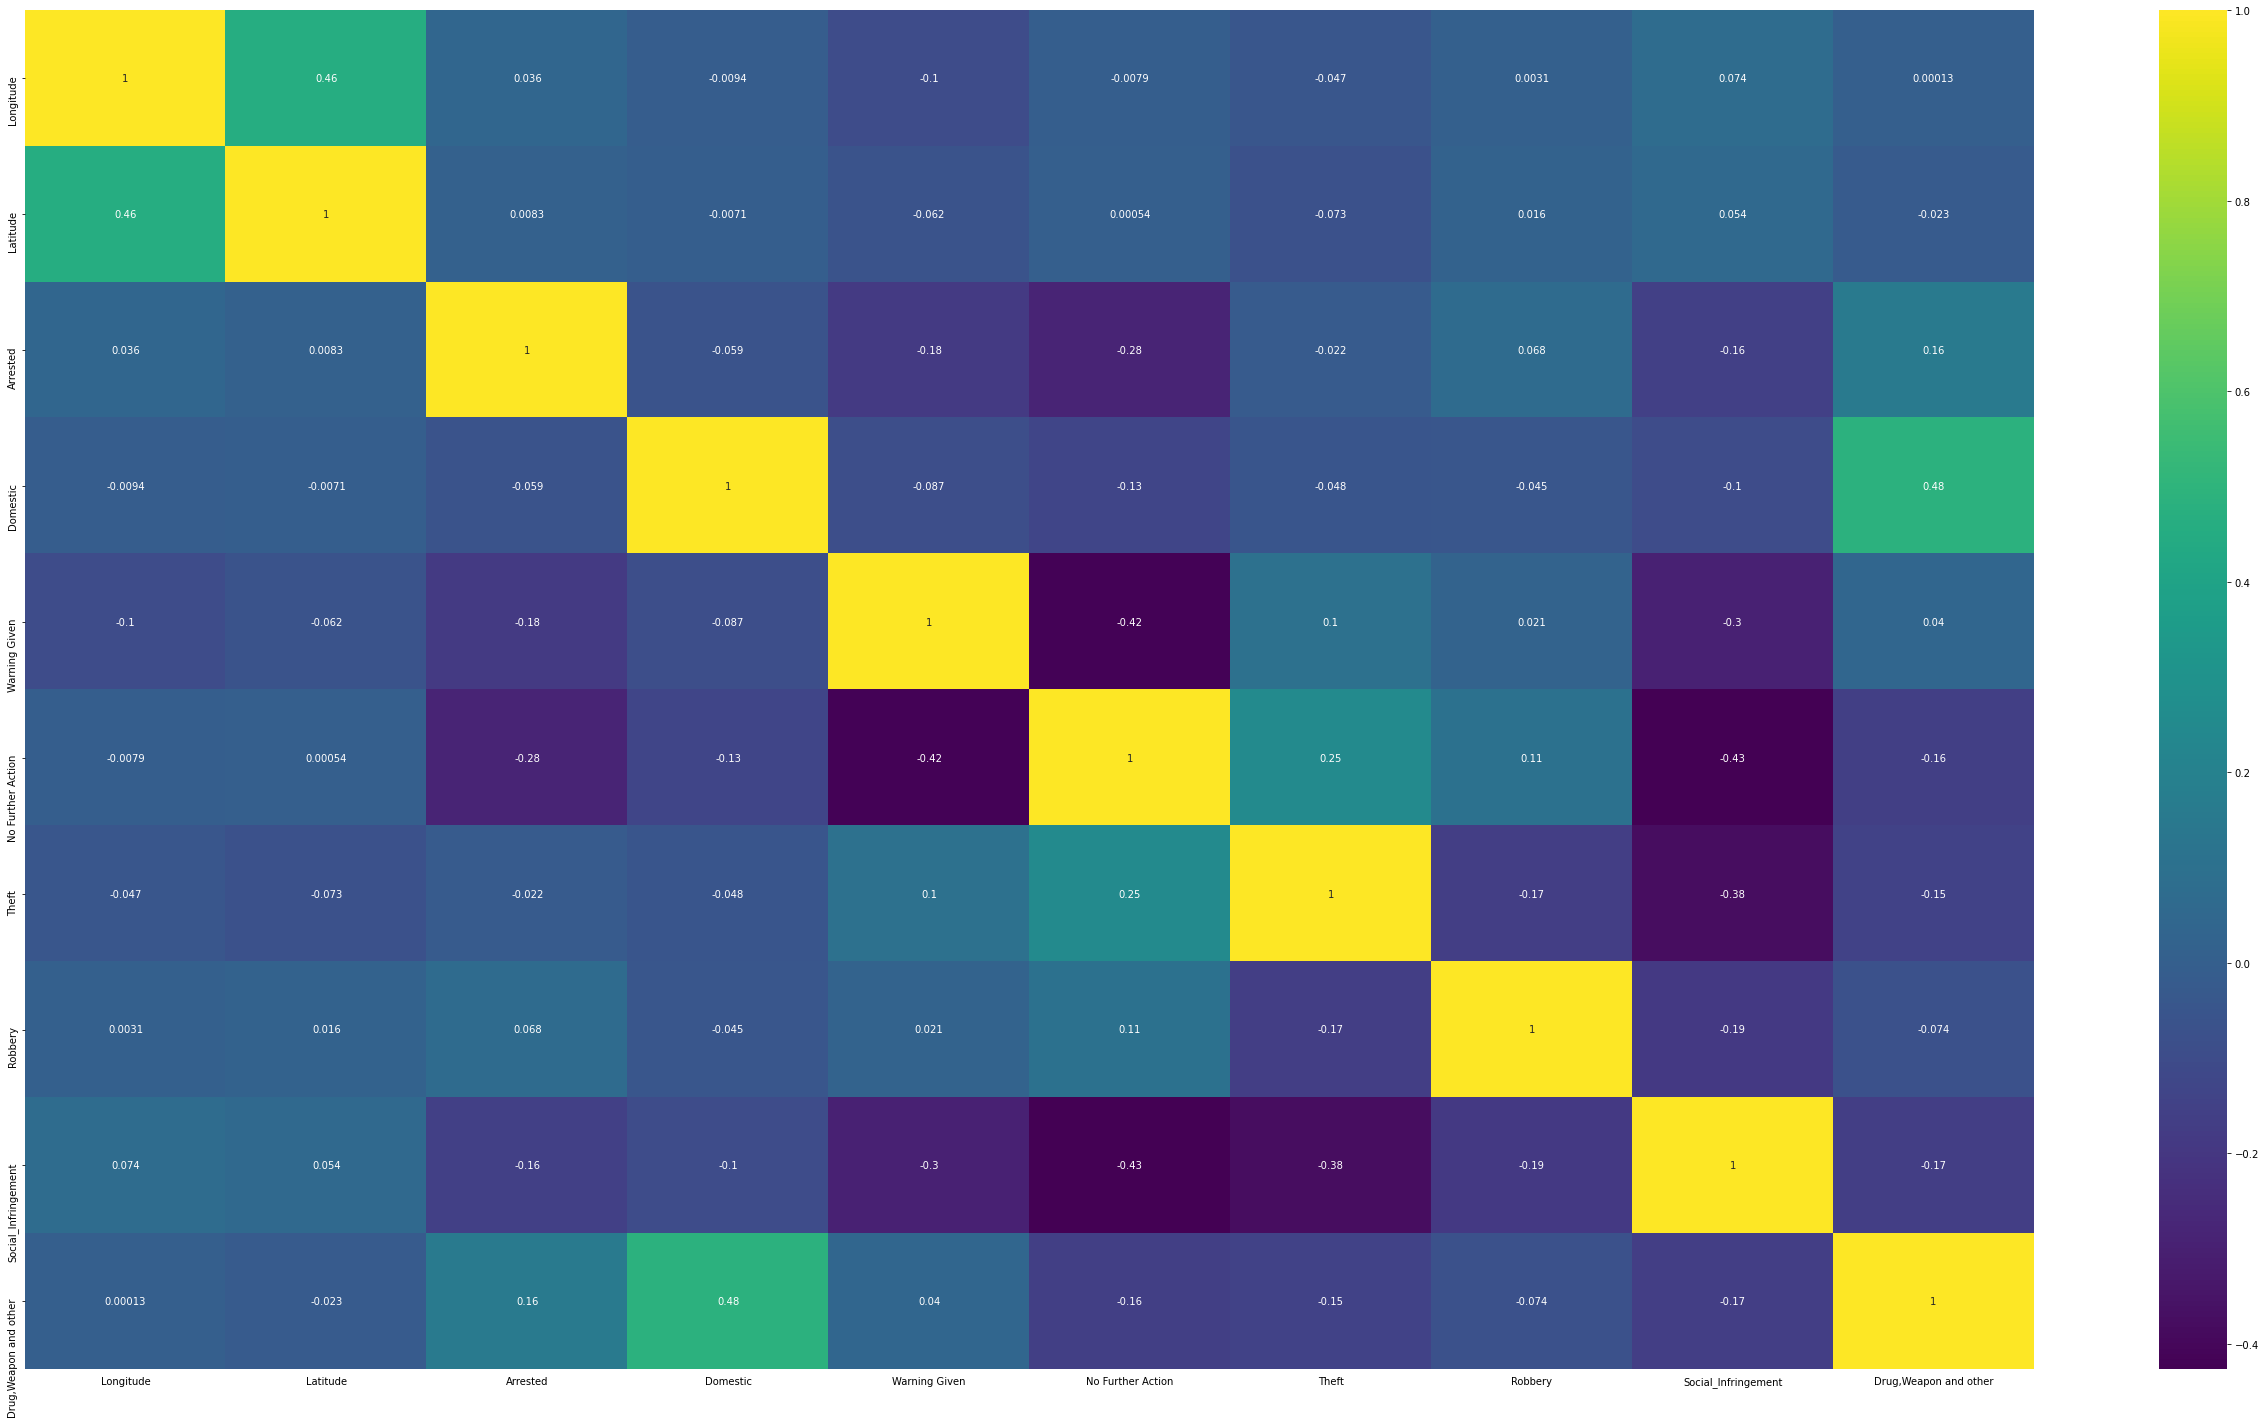

In [81]:
#Pearsons Correlation plot focusing on original dataframe

plt.figure(num=100, figsize=(45,25))
plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)
sns.heatmap(df_crime.corr(),annot=True, cmap='viridis')#'coolwarm')

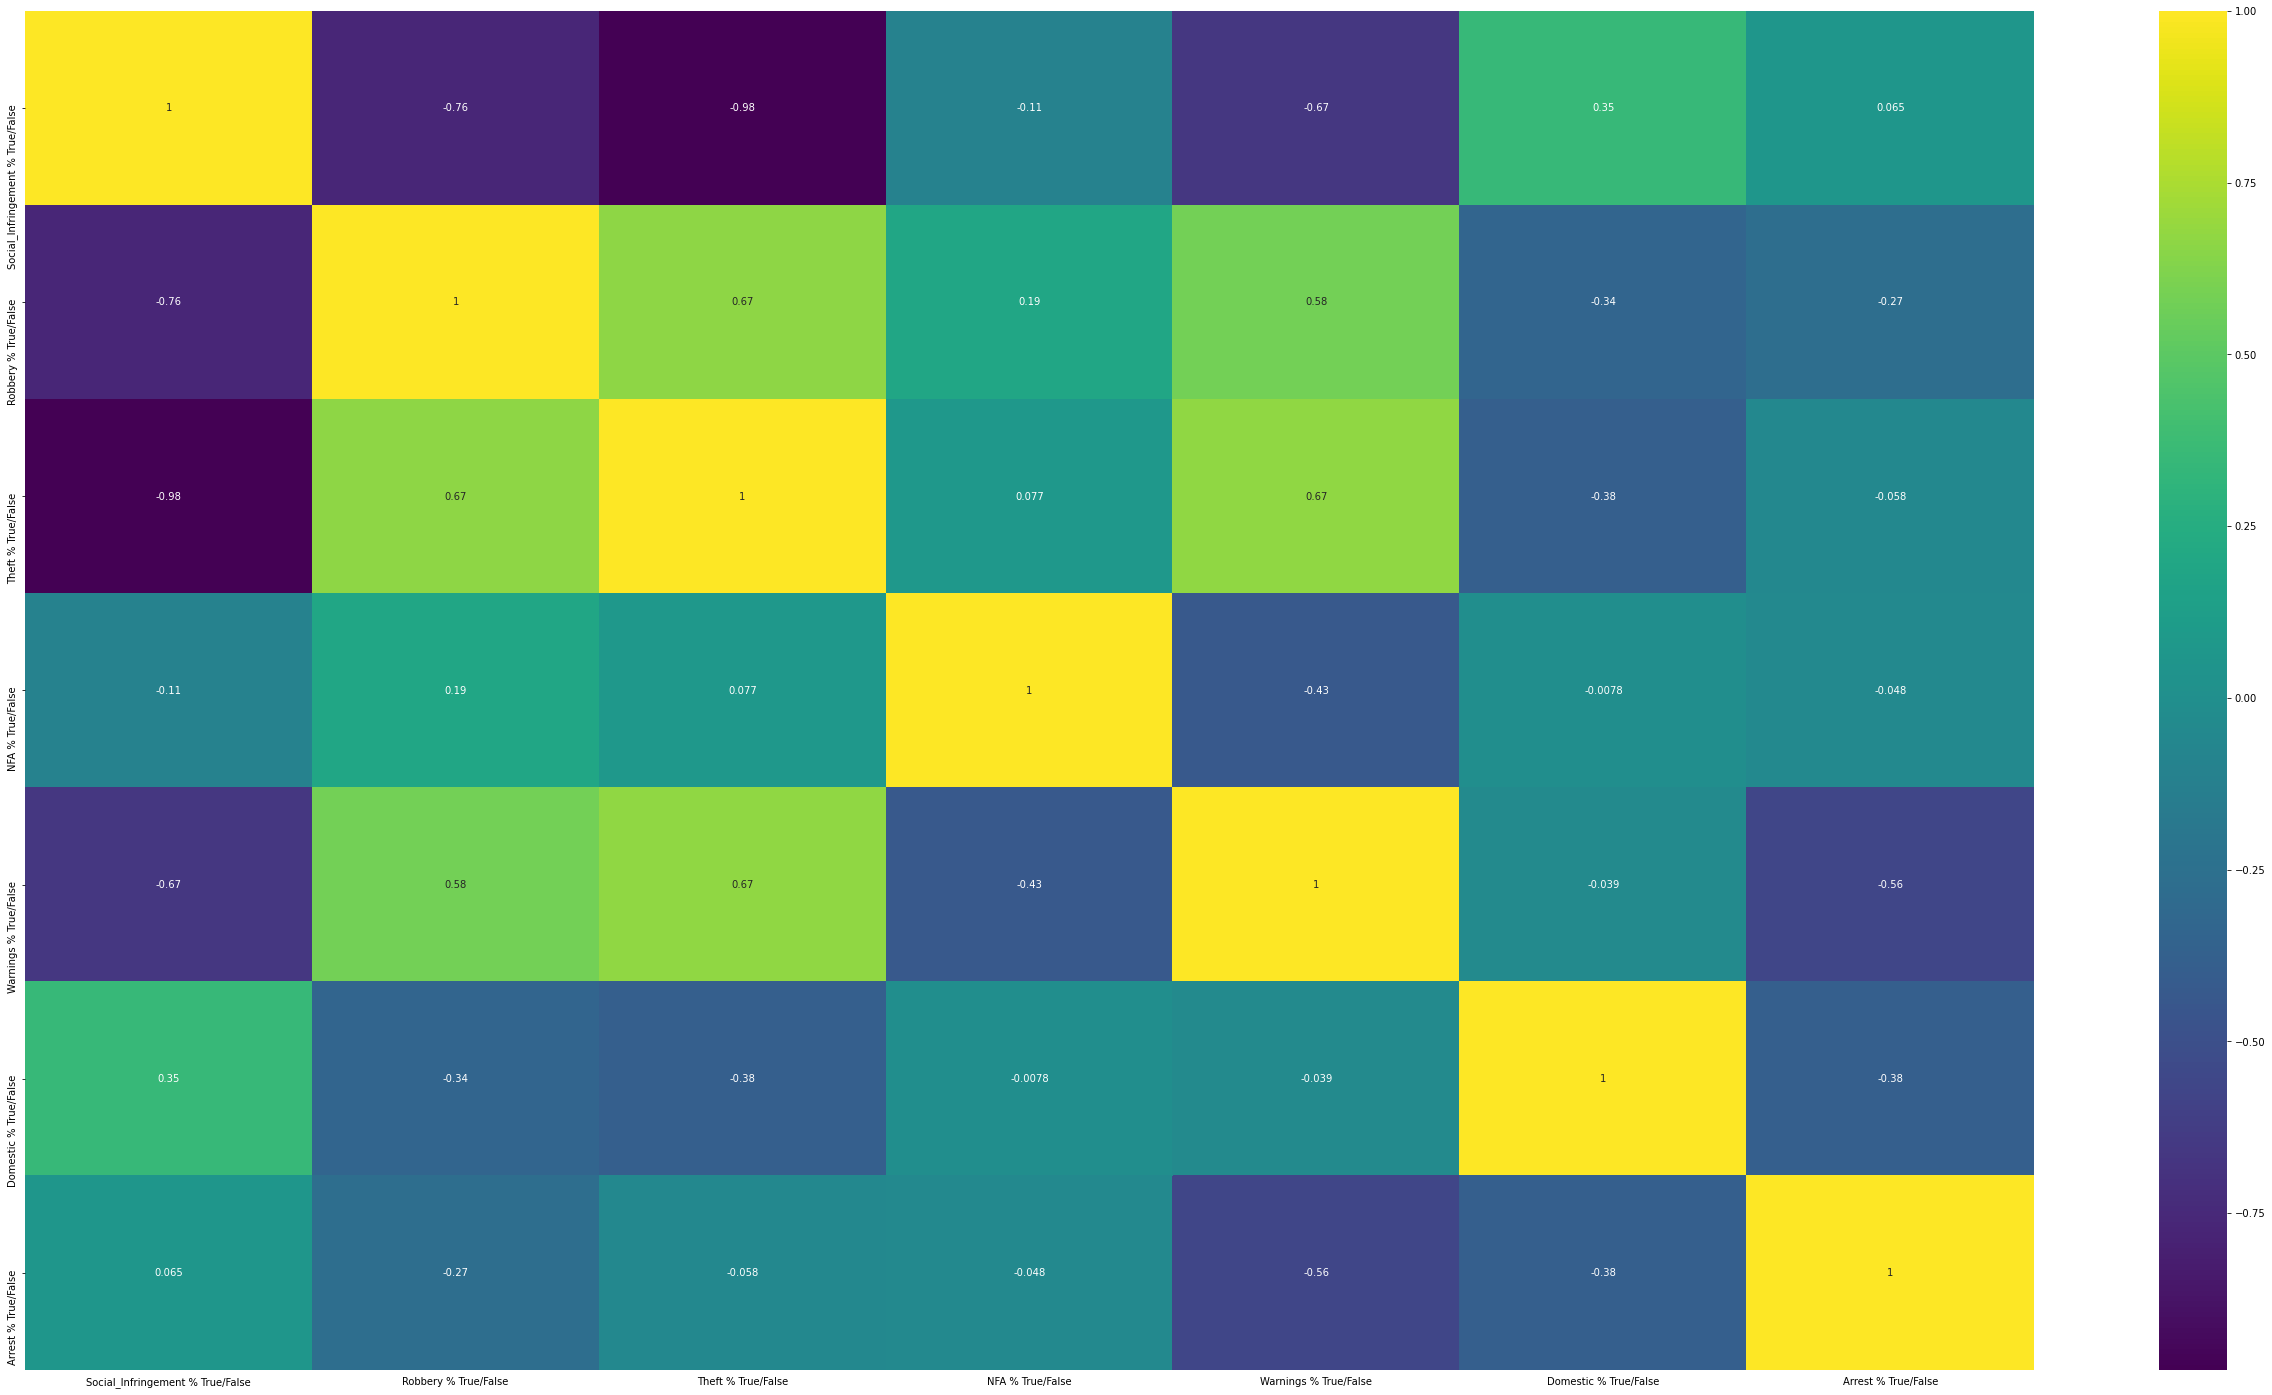

In [82]:
#Correlation plot on percentage of 'True' indicators only
plt.figure(num=100, figsize=(45,25))
plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)
sns.heatmap(df_ind.corr(),annot=True, cmap='viridis')#'coolwarm')

In [ ]:
#Arrested: Full Data; Drug and weapon
 #   Domestic: Drug Weapon and other
  #      NFA: Theft, Robbery

# Lets investigate our stop and search Dataset

In [83]:
df_search.head()

Type                       Date  \
0  Person and Vehicle search  2019-10-01T04:31:39+00:00   
1              Person search  2019-10-01T04:39:27+00:00   
2              Person search  2019-10-01T04:48:13+00:00   
3              Person search  2019-10-01T11:21:50+00:00   
4              Person search  2019-10-02T01:02:26+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                           NaN                 NaN  51.509313  -0.073850   
1                           NaN                 NaN  51.509313  -0.073850   
2                           NaN                 NaN  51.509313  -0.073850   
3                           NaN                 NaN  51.510671  -0.084284   
4                           NaN                 NaN  51.513952  -0.085833   

  Gender Age range             Self-defined ethnicity  \
0   Male     18-24  Asian/Asian British - Bangladeshi   
1   Male     25-34  Asian/Asian British - Bangladeshi   
2   Male     10-17    Other ethnic group - Not stated   
3   Male   over 34    Other ethnic group - Not stated   
4   Male     18-24  Asian/Asian British - Bangladeshi   

  Officer-defined ethnicity  \
0                     Asian   
1                     Asian   
2                     Asian   
3                     White   
4                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome Outcome linked to object of search  \
0  A no further action disposal                              False   
1  A no further action disposal                              False   
2                        Arrest                               True   
3  A no further action disposal                              False   
4                        Arrest                               True   

  Removal of more than just outer clothing                   geometry  
0                                    False  POINT (-0.07385 51.50931)  
1                                    False  POINT (-0.07385 51.50931)  
2                                    False  POINT (-0.07385 51.50931)  
3                                    False  POINT (-0.08428 51.51067)  
4                                    False  POINT (-0.08583 51.51395)

In [84]:
print(df_search)

                           Type                       Date  \
0     Person and Vehicle search  2019-10-01T04:31:39+00:00   
1                 Person search  2019-10-01T04:39:27+00:00   
2                 Person search  2019-10-01T04:48:13+00:00   
3                 Person search  2019-10-01T11:21:50+00:00   
4                 Person search  2019-10-02T01:02:26+00:00   
...                         ...                        ...   
3388  Person and Vehicle search  2020-10-30T12:15:36+00:00   
3389              Person search  2020-10-31T02:08:07+00:00   
3390  Person and Vehicle search  2020-10-31T06:36:00+00:00   
3391              Person search  2020-10-31T09:18:38+00:00   
3392  Person and Vehicle search  2020-10-31T12:40:12+00:00   

      Part of a policing operation  Policing operation   Latitude  Longitude  \
0                              NaN                 NaN  51.509313  -0.073850   
1                              NaN                 NaN  51.509313  -0.073850   
2              

In [85]:

pd.isnull(df_search).sum()

Type                                           0
Date                                           0
Part of a policing operation                3393
Policing operation                          3393
Latitude                                     795
Longitude                                    795
Gender                                         3
Age range                                    178
Self-defined ethnicity                       137
Officer-defined ethnicity                    140
Legislation                                    1
Object of search                              22
Outcome                                        1
Outcome linked to object of search             1
Removal of more than just outer clothing       1
geometry                                       0
dtype: int64

with only 3393 rows having 795 missing location is approx 23% which is a huge loss of data, furthermore comparing the stop and search dataset compared to the amount of crime data we have (105473) sums to around 3% of crime committed in the same period which isn't a true reflection of the real world hence I will introduce futher data like I have with crime of the same neighboring borough. -research has shown stop and search to be around 30% of actual crime committed over the same period.


REF:
#https://www.statista.com/statistics/865693/stop-and-searches-in-london-by-ethnicity/
#https://www.statista.com/topics/4627/crime-in-london/

In [ ]:
#Load in data for the rest of london
#search_all_oct2019=gpd.read_file ('2019-10-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_Nov2019=gpd.read_file ('2019-11-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_dec2019=gpd.read_file ('2019-12-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_jan2020=gpd.read_file ('2020-01-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_feb2020=gpd.read_file ('2020-02-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_march2020=gpd.read_file ('2020-03-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_april2020=gpd.read_file ('2020-04-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_may2020=gpd.read_file ('2020-05-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_june2020=gpd.read_file ('2020-06-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_july2020=gpd.read_file ('2020-07-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_august2020=gpd.read_file ('2020-08-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_Sep2020=gpd.read_file ('2020-09-metropolitan-stop-and-search.csv',delimiter=',')
#search_all_oct2020=gpd.read_file ('2020-10-metropolitan-stop-and-search.csv',delimiter=',')
#Merge months
#df_search_all1=[search_all_oct2019,search_all_Nov2019,search_all_dec2019,search_all_jan2020,search_all_feb2020,search_all_march2020,search_all_april2020,search_all_may2020,search_all_june2020,
#               search_all_july2020,search_all_august2020,search_all_Sep2020,search_all_oct2020];
#df_search1= pd.concat(df_search_all1 , axis=0, join='outer',ignore_index=True, keys=None,
#        levels=None, names=None, verify_integrity=False, copy=True)

#Covert Long & Lat to floats to be able to extract

#df_search1['Longitude']=pd.to_numeric(df_search1.Longitude,errors='coerce')
#df_search1['Latitude']=pd.to_numeric(df_search1.Latitude,errors='coerce')

 #add geometry column of both Long&Lat column for geospatial analysis
#df_search1=gpd.GeoDataFrame(df_search1,geometry=gpd.points_from_xy(df_search1.Longitude,df_search1.Latitude))

#Merge the neighboring stop & search data with the City of London

#Merge_COL_search=[df_search1,df_search];
#df_search= pd.concat(Merge_COL_search, axis=0, join='outer',ignore_index=True, keys=None,
        #  levels=None, names=None, verify_integrity=False, copy=True)
    
    #Save Data at each closing of note book
#df_search=pd.read_csv('df_search.csv')
#df_search.to_csv

    
    #df['latitud'] = df['latitud'].apply(lambda item: ','.join(map(lambda value: str(float(value)), item.split(','))))

In [86]:
#Introduce datetime analysis to be able to investigate for respective time
df_search['Date'] = pd.to_datetime(df_search['Date'], errors='coerce')
df_search.Date=pd.to_datetime(df_search.Date.dt.strftime('%Y-%m-%d'))

In [87]:
df_search['Longitude']=pd.to_numeric(df_search.Longitude,errors='coerce')
df_search['Latitude']=pd.to_numeric(df_search.Latitude,errors='coerce')

In [ ]:
df_search.iloc[3241]

We have two problems with this dataframe; 

Firstly we have data of the entire stop and search database in London over the period of the past year between October 2019-2020 which is 337884 instances.

Secondly the dataset doesn't include the jurisdiction in which the stop and search had taken place hence we would need to extract and build this feature in by reversal of the geocoding!

I will follow this tutorial to help me technically>>>
>>https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6 <<

In [88]:
#Let see how many locations are missing
pd.isnull(df_search).sum()

Type                                           0
Date                                           0
Part of a policing operation                3393
Policing operation                          3393
Latitude                                     795
Longitude                                    795
Gender                                         3
Age range                                    178
Self-defined ethnicity                       137
Officer-defined ethnicity                    140
Legislation                                    1
Object of search                              22
Outcome                                        1
Outcome linked to object of search             1
Removal of more than just outer clothing       1
geometry                                       0
dtype: int64

In [ ]:
df_search.head()

Delete [Part of a policing operation]	[Policing operation] columns as they are useless and are empty as we already know the data is from the City of London Police operation 

In [89]:
del df_search['Part of a policing operation']
del df_search['Policing operation']

In [90]:
df_search.head()

Type       Date   Latitude  Longitude Gender  \
0  Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1              Person search 2019-10-01  51.509313  -0.073850   Male   
2              Person search 2019-10-01  51.509313  -0.073850   Male   
3              Person search 2019-10-01  51.510671  -0.084284   Male   
4              Person search 2019-10-02  51.513952  -0.085833   Male   

  Age range             Self-defined ethnicity Officer-defined ethnicity  \
0     18-24  Asian/Asian British - Bangladeshi                     Asian   
1     25-34  Asian/Asian British - Bangladeshi                     Asian   
2     10-17    Other ethnic group - Not stated                     Asian   
3   over 34    Other ethnic group - Not stated                     White   
4     18-24  Asian/Asian British - Bangladeshi                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome Outcome linked to object of search  \
0  A no further action disposal                              False   
1  A no further action disposal                              False   
2                        Arrest                               True   
3  A no further action disposal                              False   
4                        Arrest                               True   

  Removal of more than just outer clothing                   geometry  
0                                    False  POINT (-0.07385 51.50931)  
1                                    False  POINT (-0.07385 51.50931)  
2                                    False  POINT (-0.07385 51.50931)  
3                                    False  POINT (-0.08428 51.51067)  
4                                    False  POINT (-0.08583 51.51395)

Firstly I will be removing those latitudes and Latititudes which are missing in the dataset we have 337884 entries 36705=approx 10% of the data as I have already cleaned the City of london stop and search data hence the variables missing here are from the addition metropolitian area

In [91]:
df_search=df_search[df_search['Latitude'].notna()]   #('NaN',columns=[,'Longitude'])
#df = df[df['EPS'].notna()]

In [92]:
#we are left with rows which are all filled  with geographical hence
#we can now find the district in which the crimes were commited 
print(df_search)

                           Type       Date   Latitude  Longitude Gender  \
0     Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1                 Person search 2019-10-01  51.509313  -0.073850   Male   
2                 Person search 2019-10-01  51.509313  -0.073850   Male   
3                 Person search 2019-10-01  51.510671  -0.084284   Male   
4                 Person search 2019-10-02  51.513952  -0.085833   Male   
...                         ...        ...        ...        ...    ...   
3387              Person search 2020-10-30  51.517431  -0.082458   Male   
3388  Person and Vehicle search 2020-10-30  51.510626  -0.039135   Male   
3390  Person and Vehicle search 2020-10-31  51.512856  -0.073254   Male   
3391              Person search 2020-10-31  51.518189  -0.082628   Male   
3392  Person and Vehicle search 2020-10-31  51.512147  -0.092077   Male   

     Age range                             Self-defined ethnicity  \
0        18-24                

In [ ]:
px.scatter_mapbox(df_search, lat='Latitude', lon='Longitude')#, zoom=15)

In [93]:
#Mapping both Latitude and Longitude as a column
df_search['geo'] = df_search['Latitude'].map(str) + ',' + df_search['Longitude'].map(str)
df_search['geo'][0]

'51.509313,-0.07385'

In [94]:
#Adds service provicer to be able to reterive information 
locator = Nominatim(user_agent='myGeocoder') #, timeout=10)
rgeocode = RateLimiter(locator.reverse)#, min_delay_seconds=0.001)

In [95]:
df_search['geo'] = df_search['geo'].apply(lambda item: ','.join(map(lambda value: str(float(value)), item.split(','))))

In [100]:
#Initially I tried to use the entire london dataset to be able to convert to geographical location to the their respective boroughs
#However from using the code be it estimated a time of 40 hours hence I will just use the data reterived from the city of london to convert and evaluate

tqdm_notebook().pandas()
df_search['city_district'] = df_search['geo'].progress_apply(rgeocode) #['city_district']

/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [101]:
#Added address of each stop and search made
print(df_search)

                           Type       Date   Latitude  Longitude Gender  \
0     Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1                 Person search 2019-10-01  51.509313  -0.073850   Male   
2                 Person search 2019-10-01  51.509313  -0.073850   Male   
3                 Person search 2019-10-01  51.510671  -0.084284   Male   
4                 Person search 2019-10-02  51.513952  -0.085833   Male   
...                         ...        ...        ...        ...    ...   
3387              Person search 2020-10-30  51.517431  -0.082458   Male   
3388  Person and Vehicle search 2020-10-30  51.510626  -0.039135   Male   
3390  Person and Vehicle search 2020-10-31  51.512856  -0.073254   Male   
3391              Person search 2020-10-31  51.518189  -0.082628   Male   
3392  Person and Vehicle search 2020-10-31  51.512147  -0.092077   Male   

     Age range                             Self-defined ethnicity  \
0        18-24                

In [ ]:
#locator = Nominatim(user_agent='myGeocoder')
#coordinates = '51.44908,-0.44641'
#location = locator.reverse(coordinates)
#location.raw
#(-0.17526 51.60691)  city_district=London Borough of Barnet
#POINT (0.02305 51.55121)  'city_district': 'London Borough of Newham'
#POINT (-0.44641 51.44908) =city_district': 'London Borough of Hounslow'

In [ ]:
#locator = Nominatim(user_agent='myGeocoder')
#coordinates = '51.44908,-0.44641'
#location = locator.reverse(coordinates)
#location.address

In [102]:
df_search.head()

Type       Date   Latitude  Longitude Gender  \
0  Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1              Person search 2019-10-01  51.509313  -0.073850   Male   
2              Person search 2019-10-01  51.509313  -0.073850   Male   
3              Person search 2019-10-01  51.510671  -0.084284   Male   
4              Person search 2019-10-02  51.513952  -0.085833   Male   

  Age range             Self-defined ethnicity Officer-defined ethnicity  \
0     18-24  Asian/Asian British - Bangladeshi                     Asian   
1     25-34  Asian/Asian British - Bangladeshi                     Asian   
2     10-17    Other ethnic group - Not stated                     Asian   
3   over 34    Other ethnic group - Not stated                     White   
4     18-24  Asian/Asian British - Bangladeshi                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome Outcome linked to object of search  \
0  A no further action disposal                              False   
1  A no further action disposal                              False   
2                        Arrest                               True   
3  A no further action disposal                              False   
4                        Arrest                               True   

  Removal of more than just outer clothing                   geometry  \
0                                    False  POINT (-0.07385 51.50931)   
1                                    False  POINT (-0.07385 51.50931)   
2                                    False  POINT (-0.07385 51.50931)   
3                                    False  POINT (-0.08428 51.51067)   
4                                    False  POINT (-0.08583 51.51395)   

                   geo                                      city_district  
0   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
1   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
2   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
3  51.510671,-0.084284  (23-39 Eastcheap, 23-39, Eastcheap, Bishopsgat...  
4  51.513952,-0.085833  (Cock and Woolpack, 6, Finch Lane, Bishopsgate...

# Statistical analysis of Stop and search

In [103]:
df_search['Age range'].unique()

array(['18-24', '25-34', '10-17', 'over 34', nan, 'under 10'],
      dtype=object)

In [104]:
#Lets look at the reasons behind police suspicion for stop and search
df_search['Object of search'].value_counts()

Controlled drugs                       1410
Article for use in theft                513
Stolen goods                            395
Offensive weapons                       150
Evidence of offences under the Act       69
Articles for use in criminal damage      23
Firearms                                 11
Fireworks                                 8
Name: Object of search, dtype: int64

In regards to the stop and search records in the city of london a staggering more than half of all stop and searches made for Controlled drugs within the region, this doesn't come as a shock.

In [105]:
#Examine the Outcome for each stop and search records made
df_search['Outcome'].value_counts()

A no further action disposal       1915
Arrest                              501
Khat or Cannabis warning            143
Penalty Notice for Disorder          12
Summons / charged by post            10
Community resolution                  9
Caution (simple or conditional)       7
Name: Outcome, dtype: int64

One major aspect we can Investigate here which we couldn't in the crimes data base is the race here we have a division of race per stop and search!

Lets take a look...

In [106]:
df_search['Self-defined ethnicity'].value_counts()

Other ethnic group - Not stated                                                         883
White - English/Welsh/Scottish/Northern Irish/British                                   496
White - Any other White background                                                      394
Black/African/Caribbean/Black British - African                                         163
Asian/Asian British - Bangladeshi                                                       134
Asian/Asian British - Any other Asian background                                         84
Black/African/Caribbean/Black British - Caribbean                                        81
Asian/Asian British - Pakistani                                                          51
Other ethnic group - Any other ethnic group                                              38
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background     38
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background       

In [111]:
# Let evaluate 
print(round(883/2598 * 100,2), "% of those stop and searched are have identified as other ethnic group - Not stated")
print(round(496/2598 * 100,2), "% of those stop and searched are have identified as White English/Welsh/Scottish/Northern Irish/British")
print(round(163/2598 * 100,2), "% of those stop and searched are have identified as Black/African/Caribbean/Black British - African")

33.99 % of those stop and searched are have identified as other ethnic group - Not stated
19.09 % of those stop and searched are have identified as White English/Welsh/Scottish/Northern Irish/British
6.27 % of those stop and searched are have identified as Black/African/Caribbean/Black British - African


In [ ]:
df_search['Gender'].value_counts()

In [112]:
print(round(2336/2598 * 100,2), "% of those stop and searched have identified as Male Gender")
print(round(259/2598 * 100,2),"% of those stop and search have identified as Female Gender")
print(round(163/2598 * 100,2), "% of those stop and searched are have identified as Other Gender")

89.92 % of those stop and searched have identified as Male Gender
9.97 % of those stop and search have identified as Female Gender
6.27 % of those stop and searched are have identified as Other Gender


In [113]:
#Aggregation and production a few functions to help with analysis of stop and search data

#Reference

#A no further action disposal       1915
#Arrest                              501
#Khat or Cannabis warning            143
#Penalty Notice for Disorder          12
#Summons / charged by post            10
#Community resolution                  9
#Caution (simple or conditional)       7

def outcome_stats(df_search):
    "Compute statistics"
    
    n_nfa = len(df_search[df_search['Outcome'] == 'A no further action disposal'])
    n_arrests = len(df_search[df_search['Outcome'] == 'Arrest'])
    n_class_c_warning=len(df_search[df_search['Outcome'] == 'Khat or Cannabis warning'])
    n_pcn =len(df_search[df_search['Outcome'] == 'Penalty Notice for Disorder'])
    n_court_summons=len(df_search[df_search['Outcome'] == 'Summons / charged by post'])
    n_caution = len(df_search[df_search['Outcome'] == 'Caution (simple or conditional)'])
    
    n_total = len(df_search)
   # fines_per_warning = n_pcn / n_class_c_warning
    court_summon_per_stop = n_court_summons/n_total
    rate_arrest = n_arrests / n_total

    return(pd.Series(data = {
        'n_nfa': n_nfa,
        'n_arrests': n_arrests,
        'n_class_c_warning':n_class_c_warning,
        'n_pcn':n_pcn,
        'n_court_summons':n_court_summons,
        'n_caution':n_caution,
        'n_total': n_total,
       # 'fines_per_warning':fines_per_warning,
        'court_summon_per_stop':court_summon_per_stop,
        'rate_arrest':rate_arrest
    }))

Statistical Evaluation

In [114]:
outcome_stats(df_search)

n_nfa                    1915.000000
n_arrests                 501.000000
n_class_c_warning         143.000000
n_pcn                      12.000000
n_court_summons            10.000000
n_caution                   7.000000
n_total                  2598.000000
court_summon_per_stop       0.003849
rate_arrest                 0.192841
dtype: float64

**General stats of the data + some calculated statistic i.e:**
fines_per_warning = 8.4% of warnings result in a fine,
court_summon_per_stop=3.8% of stop and searches result in a court summon for the offence,
rate_arrest= in the city of London there is a 19% chance of you getting arrested if you were stopped and searched


In [115]:
df_search.groupby('Gender').apply(outcome_stats)

n_nfa  n_arrests  n_class_c_warning  n_pcn  n_court_summons  \
Gender                                                                 
Female   207.0       41.0                8.0    0.0              0.0   
Male    1706.0      460.0              135.0   12.0             10.0   

        n_caution  n_total  court_summon_per_stop  rate_arrest  
Gender                                                          
Female        0.0    259.0               0.000000     0.158301  
Male          7.0   2336.0               0.004281     0.196918

Breakdown:Main take away here is that MEN are 4% more likely to get arrested compared to women

In [116]:
df_search.groupby('Self-defined ethnicity').apply(outcome_stats)

n_nfa  n_arrests  \
Self-defined ethnicity                                                 
Asian/Asian British - Any other Asian background     70.0       10.0   
Asian/Asian British - Bangladeshi                   100.0       25.0   
Asian/Asian British - Chinese                         0.0        2.0   
Asian/Asian British - Indian                         14.0        9.0   
Asian/Asian British - Pakistani                      34.0       10.0   
Black/African/Caribbean/Black British - African     121.0       32.0   
Black/African/Caribbean/Black British - Any oth...   30.0        7.0   
Black/African/Caribbean/Black British - Caribbean    49.0       26.0   
Mixed/Multiple ethnic groups - Any other Mixed/...   20.0        6.0   
Mixed/Multiple ethnic groups - White and Asian        7.0        0.0   
Mixed/Multiple ethnic groups - White and Black ...    8.0        7.0   
Mixed/Multiple ethnic groups - White and Black ...   12.0        4.0   
Other ethnic group - Any other ethnic group          23.0       12.0   
Other ethnic group - Not stated                     699.0      149.0   
White - Any other White background                  264.0       91.0   
White - English/Welsh/Scottish/Northern Irish/B...  352.0       96.0   
White - Irish                                        17.0        4.0   

                                                    n_class_c_warning  n_pcn  \
Self-defined ethnicity                                                         
Asian/Asian British - Any other Asian background                  2.0    0.0   
Asian/Asian British - Bangladeshi                                 4.0    1.0   
Asian/Asian British - Chinese                                     2.0    0.0   
Asian/Asian British - Indian                                      1.0    0.0   
Asian/Asian British - Pakistani                                   6.0    1.0   
Black/African/Caribbean/Black British - African                   8.0    2.0   
Black/African/Caribbean/Black British - Any oth...                1.0    0.0   
Black/African/Caribbean/Black British - Caribbean                 6.0    0.0   
Mixed/Multiple ethnic groups - Any other Mixed/...                8.0    0.0   
Mixed/Multiple ethnic groups - White and Asian                    1.0    0.0   
Mixed/Multiple ethnic groups - White and Black ...                4.0    0.0   
Mixed/Multiple ethnic groups - White and Black ...                2.0    0.0   
Other ethnic group - Any other ethnic group                       2.0    1.0   
Other ethnic group - Not stated                                  24.0    2.0   
White - Any other White background                               34.0    1.0   
White - English/Welsh/Scottish/Northern Irish/B...               36.0    4.0   
White - Irish                                                     0.0    0.0   

                                                    n_court_summons  \
Self-defined ethnicity                                                
Asian/Asian British - Any other Asian background                2.0   
Asian/Asian British - Bangladeshi                               2.0   
Asian/Asian British - Chinese                                   0.0   
Asian/Asian British - Indian                                    0.0   
Asian/Asian British - Pakistani                                 0.0   
Black/African/Caribbean/Black British - African                 0.0   
Black/African/Caribbean/Black British - Any oth...              0.0   
Black/African/Caribbean/Black British - Caribbean               0.0   
Mixed/Multiple ethnic groups - Any other Mixed/...              0.0   
Mixed/Multiple ethnic groups - White and Asian                  0.0   
Mixed/Multiple ethnic groups - White and Black ...              0.0   
Mixed/Multiple ethnic groups - White and Black ...              0.0   
Other ethnic group - Any other ethnic group                     0.0   
Other ethnic group - Not stated                                 3.0   
White - Any other White ba

In [121]:
df_search.groupby('Object of search').apply(outcome_stats)

n_nfa  n_arrests  n_class_c_warning  \
Object of search                                                           
Article for use in theft             401.0      110.0                1.0   
Articles for use in criminal damage   19.0        4.0                0.0   
Controlled drugs                     970.0      271.0              141.0   
Evidence of offences under the Act    56.0       13.0                0.0   
Firearms                              10.0        1.0                0.0   
Fireworks                              8.0        0.0                0.0   
Offensive weapons                    132.0       17.0                1.0   
Stolen goods                         303.0       83.0                0.0   

                                     n_pcn  n_court_summons  n_caution  \
Object of search                                                         
Article for use in theft               0.0              0.0        0.0   
Articles for use in criminal damage    0.0              0.0        0.0   
Controlled drugs                      12.0              9.0        7.0   
Evidence of offences under the Act     0.0              0.0        0.0   
Firearms                               0.0              0.0        0.0   
Fireworks                              0.0              0.0        0.0   
Offensive weapons                      0.0              0.0        0.0   
Stolen goods                           0.0              1.0        0.0   

                                     n_total  court_summon_per_stop  \
Object of search                                                      
Article for use in theft               513.0               0.000000   
Articles for use in criminal damage     23.0               0.000000   
Controlled drugs                      1410.0               0.006383   
Evidence of offences under the Act      69.0               0.000000   
Firearms                                11.0               0.000000   
Fireworks                                8.0               0.000000   
Offensive weapons                      150.0               0.000000   
Stolen goods                           395.0               0.002532   

                                     rate_arrest  
Object of search                                  
Article for use in theft                0.214425  
Articles for use in criminal damage     0.173913  
Controlled drugs                        0.192199  
Evidence of offences under the Act      0.188406  
Firearms                                0.090909  
Fireworks                               0.000000  
Offensive weapons                       0.113333  
Stolen goods                            0.210127

21% of those who have been stop as a suspect of theft have been arrested;
17% of those who have been stop as a suspect of criminal damage have been arrested;
19% of those who have been stop as a suspect of controlled have been arrested;

Very interesting however lets visually see in order to gain a deeper understanding

In [122]:
df_search.head()

Type       Date   Latitude  Longitude Gender  \
0  Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1              Person search 2019-10-01  51.509313  -0.073850   Male   
2              Person search 2019-10-01  51.509313  -0.073850   Male   
3              Person search 2019-10-01  51.510671  -0.084284   Male   
4              Person search 2019-10-02  51.513952  -0.085833   Male   

  Age range             Self-defined ethnicity Officer-defined ethnicity  \
0     18-24  Asian/Asian British - Bangladeshi                     Asian   
1     25-34  Asian/Asian British - Bangladeshi                     Asian   
2     10-17    Other ethnic group - Not stated                     Asian   
3   over 34    Other ethnic group - Not stated                     White   
4     18-24  Asian/Asian British - Bangladeshi                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome Outcome linked to object of search  \
0  A no further action disposal                              False   
1  A no further action disposal                              False   
2                        Arrest                               True   
3  A no further action disposal                              False   
4                        Arrest                               True   

  Removal of more than just outer clothing                   geometry  \
0                                    False  POINT (-0.07385 51.50931)   
1                                    False  POINT (-0.07385 51.50931)   
2                                    False  POINT (-0.07385 51.50931)   
3                                    False  POINT (-0.08428 51.51067)   
4                                    False  POINT (-0.08583 51.51395)   

                   geo                                      city_district  
0   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
1   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
2   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
3  51.510671,-0.084284  (23-39 Eastcheap, 23-39, Eastcheap, Bishopsgat...  
4  51.513952,-0.085833  (Cock and Woolpack, 6, Finch Lane, Bishopsgate...

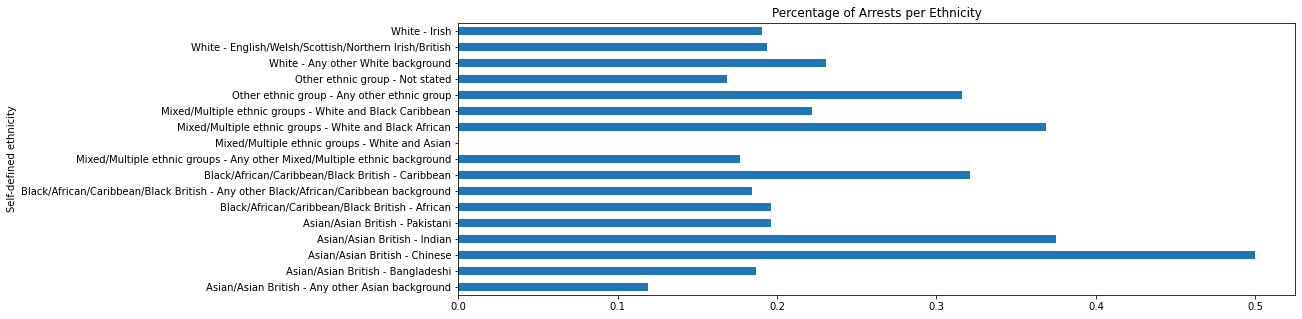

In [123]:
Ethnicity = df_search.groupby(['Self-defined ethnicity']).apply(outcome_stats)
Ethnicity['rate_arrest'].plot.barh( title="Percentage of Arrests per Ethnicity")


some of these are not to scale for instance those of a chinese backgroung who were stop and searched were almost 1/3 more likely to be arrested compared to any other rate however they are only represented by 4 stop and search data.

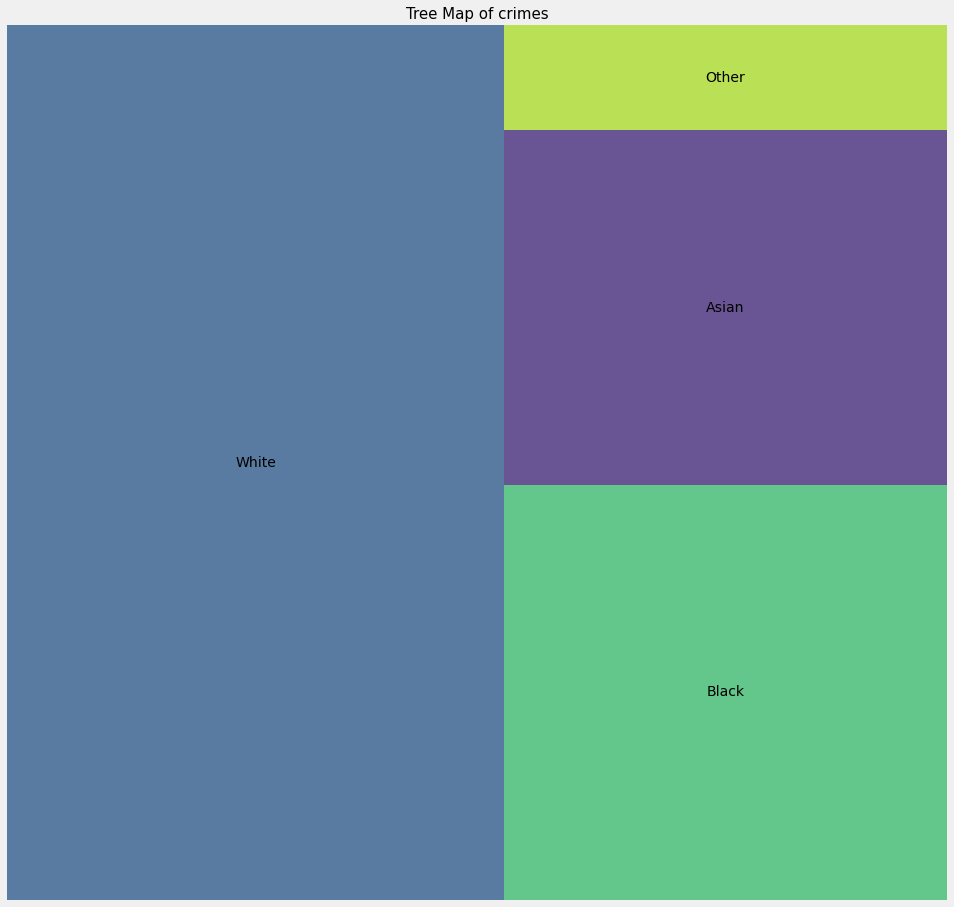

In [124]:
y = df_search['Officer-defined ethnicity'].value_counts().head(25)
    #['Crime type']
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8)
plt.title('Tree Map of crimes', fontsize = 15)

plt.axis('off')
plt.show()

We see that half of all stopped and search have been defined as white interesting lets look if this matches with those arrested further on.

In [125]:
pd.set_option('display.max_rows', None)
df_search.groupby(['Self-defined ethnicity','Object of search']).apply(outcome_stats)

n_nfa  \
Self-defined ethnicity                             Object of search                             
Asian/Asian British - Any other Asian background   Article for use in theft               6.0   
                                                   Articles for use in criminal damage    2.0   
                                                   Controlled drugs                      54.0   
                                                   Evidence of offences under the Act     3.0   
                                                   Fireworks                              1.0   
                                                   Offensive weapons                      2.0   
                                                   Stolen goods                           2.0   
Asian/Asian British - Bangladeshi                  Article for use in theft               8.0   
                                                   Articles for use in criminal damage    1.0   
                                                   Controlled drugs                      69.0   
                                                   Evidence of offences under the Act     5.0   
                                                   Firearms                               1.0   
                                                   Offensive weapons                      2.0   
                                                   Stolen goods                          14.0   
Asian/Asian British - Chinese                      Controlled drugs                       0.0   
                                                   Stolen goods                           0.0   
Asian/Asian British - Indian                       Article for use in theft               1.0   
                                                   Controlled drugs                      11.0   
                                                   Offensive weapons                      0.0   
                                                   Stolen goods                           1.0   
Asian/Asian British - Pakistani                    Article for use in theft               4.0   
                                                   Controlled drugs                      27.0   
                                                   Evidence of offences under the Act     1.0   
                                                   Offensive weapons                      2.0   
Black/African/Caribbean/Black British - African    Article for use in theft              12.0   
                                                   Controlled drugs                      79.0   
                                                   Evidence of offences under the Act     3.0   
                                                   Offensive weapons                     14.0   
                                                   Stolen goods                          13.0   
Black/African/Caribbean/Black British - Any oth... Article for use in theft               5.0   
                                                   Articles for use in criminal damage    1.0   
                                                   Controlled drugs                      14.0   
                                                   Evidence of offences under the Act     2.0   
                                                   Fireworks                              1.0   
                                                   Offensive weapons                      4.0   
                                                   Stolen goods                           2.0   
Black/African/Caribbean/Black British - Caribbean  Article for use in theft               9.0   
                                                   Controlled drugs                      24.0   
                                                   Fireworks                              2.0   
                                                   Offensive weapons                      6.0   
              

Very interesting we are able to see all arrest rates of every ethnicity with a subdivision of types of crimes they had been stopped for; focusing on being stopped for controlled drugs we find that Asian and whites are 24% likely to be arrested if stopped whereas being Irish / Black is 5% more likely to be arrested at 29/30% of the stops ending in arrest 

In [126]:
df_search.groupby(['Self-defined ethnicity','Removal of more than just outer clothing']).apply(outcome_stats)

n_nfa  \
Self-defined ethnicity                             Removal of more than just outer clothing          
Asian/Asian British - Any other Asian background   False                                      68.0   
                                                   True                                        2.0   
Asian/Asian British - Bangladeshi                  False                                      87.0   
                                                   True                                       13.0   
Asian/Asian British - Chinese                      False                                       0.0   
Asian/Asian British - Indian                       False                                      14.0   
                                                   True                                        0.0   
Asian/Asian British - Pakistani                    False                                      33.0   
                                                   True                                        1.0   
Black/African/Caribbean/Black British - African    False                                     116.0   
                                                   True                                        5.0   
Black/African/Caribbean/Black British - Any oth... False                                      30.0   
Black/African/Caribbean/Black British - Caribbean  False                                      49.0   
                                                   True                                        0.0   
Mixed/Multiple ethnic groups - Any other Mixed/... False                                      19.0   
                                                   True                                        1.0   
Mixed/Multiple ethnic groups - White and Asian     False                                       7.0   
Mixed/Multiple ethnic groups - White and Black ... False                                       8.0   
Mixed/Multiple ethnic groups - White and Black ... False                                      11.0   
                                                   True                                        1.0   
Other ethnic group - Any other ethnic group        False                                      23.0   
                                                   True                                        0.0   
Other ethnic group - Not stated                    False                                     678.0   
                                                   True                                       21.0   
White - Any other White background                 False                                     257.0   
                                                   True                                        7.0   
White - English/Welsh/Scottish/Northern Irish/B... False                                     344.0   
                                                   True                                        8.0   
White - Irish                                      False                                      17.0   

                                                                                             n_arrests  \
Self-defined ethnicity                             Removal of more than just outer clothing              
Asian/Asian British - Any other Asian background   False                                          10.0   
                                                   True                                            0.0   
Asian/Asian British - Bangladeshi                  False                                          24.0   
                                                   True                                            1.0   
Asian/Asian British - Chinese                      False                                           2.0   
Asian/Asian British - Indian                       False                                           8.0   
                                                   True                           

In [127]:
df_search.head()

Type       Date   Latitude  Longitude Gender  \
0  Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1              Person search 2019-10-01  51.509313  -0.073850   Male   
2              Person search 2019-10-01  51.509313  -0.073850   Male   
3              Person search 2019-10-01  51.510671  -0.084284   Male   
4              Person search 2019-10-02  51.513952  -0.085833   Male   

  Age range             Self-defined ethnicity Officer-defined ethnicity  \
0     18-24  Asian/Asian British - Bangladeshi                     Asian   
1     25-34  Asian/Asian British - Bangladeshi                     Asian   
2     10-17    Other ethnic group - Not stated                     Asian   
3   over 34    Other ethnic group - Not stated                     White   
4     18-24  Asian/Asian British - Bangladeshi                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome Outcome linked to object of search  \
0  A no further action disposal                              False   
1  A no further action disposal                              False   
2                        Arrest                               True   
3  A no further action disposal                              False   
4                        Arrest                               True   

  Removal of more than just outer clothing                   geometry  \
0                                    False  POINT (-0.07385 51.50931)   
1                                    False  POINT (-0.07385 51.50931)   
2                                    False  POINT (-0.07385 51.50931)   
3                                    False  POINT (-0.08428 51.51067)   
4                                    False  POINT (-0.08583 51.51395)   

                   geo                                      city_district  
0   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
1   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
2   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...  
3  51.510671,-0.084284  (23-39 Eastcheap, 23-39, Eastcheap, Bishopsgat...  
4  51.513952,-0.085833  (Cock and Woolpack, 6, Finch Lane, Bishopsgate...

Lets now investigate from over time perticularly Lockdown from March 2020 to June 2020

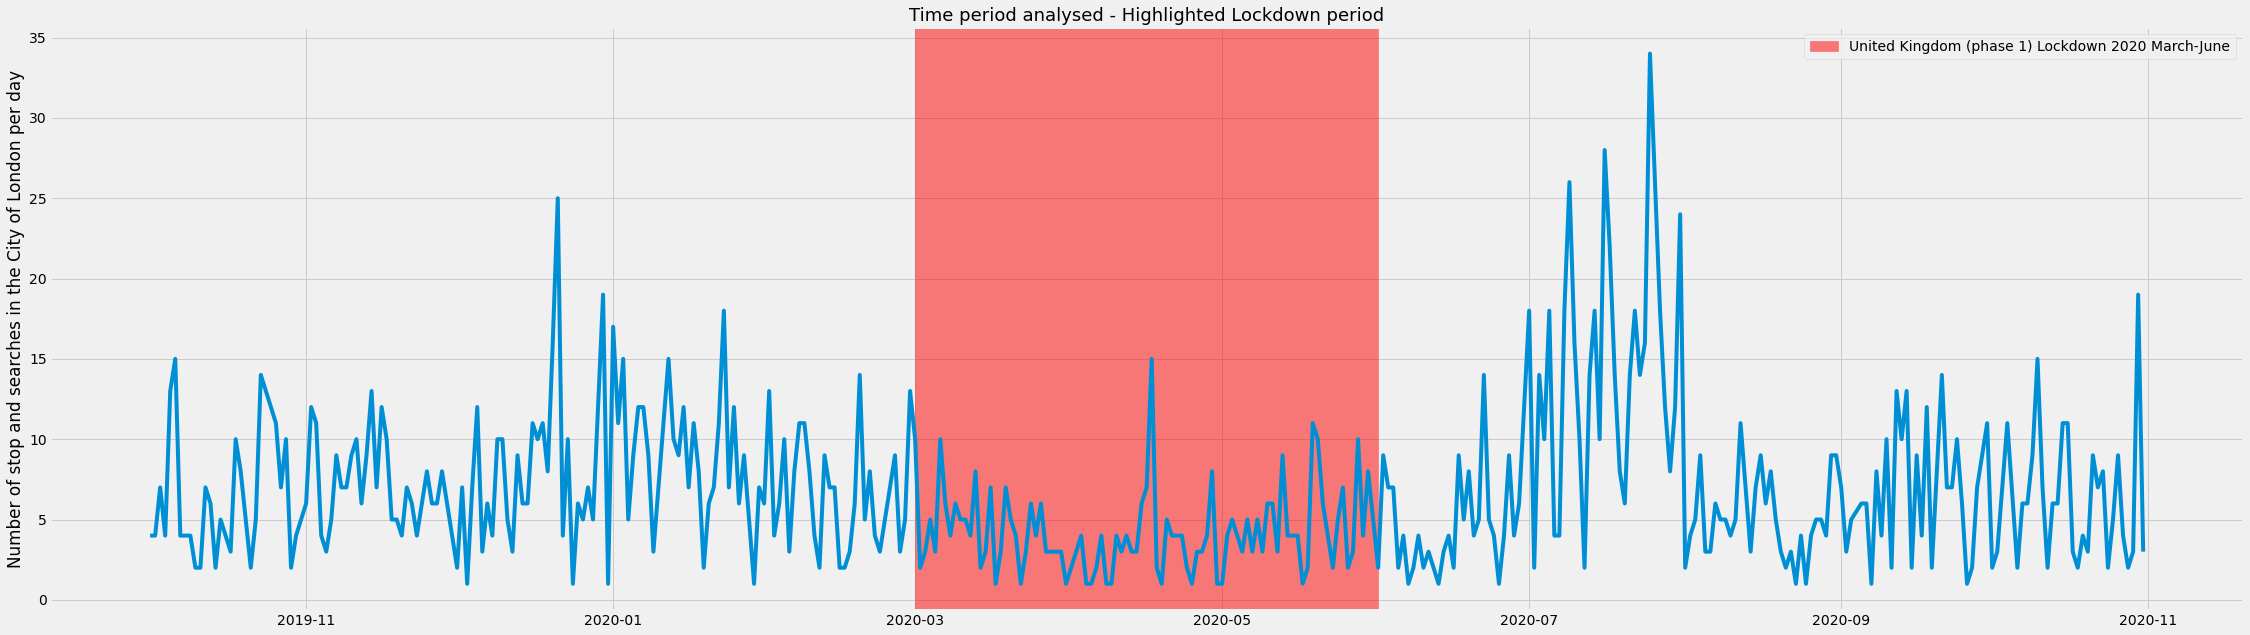

In [129]:
Stop_per_month = df_search.groupby('Date').size().reset_index(name='number of stop and search over the year').set_index('Date')
fig,ax=plt.subplots(figsize = (35,10))
ax.plot(Stop_per_month)

ax.axvspan(date2num(datetime(2020,3,1)),date2num(datetime(2020,6,1)),label='United Kingdom (phase 1) Lockdown 2020 March-June',color='red',alpha=0.5)
ax.legend()
ax.legend()

ax.set_ylabel('Number of stop and searches in the City of London per day')
ax.set_title('Time period analysed - Highlighted Lockdown period', size=18)
plt.show()

Comment:Lockdown seemed to have a mild affect to the rate of stop and searches carried out during this period we only see one major peak;- which potentially could be linked to the weather? - **will investigate this and inform in report**

TypeError: 'value' must be an instance of str or bytes, not a float

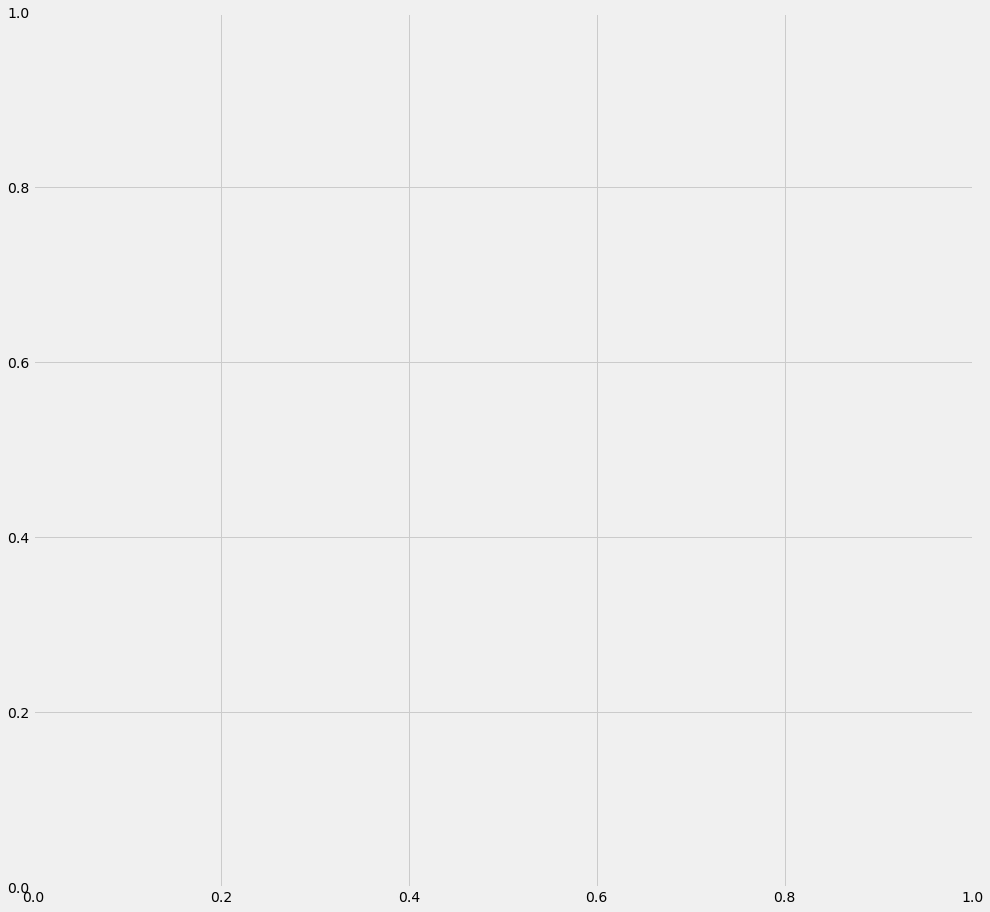

In [131]:
#plt.figure(figsize=(8,6))
#plt.hist(df_crime['Crime ID'], bins=100, alpha=0.5, label="data1")
#plt.hist(df_search['Date'], bins=100, alpha=0.5, label="data2")
#plt.hist(df_crime+df_search, bins=100, alpha=0.5, label="data3")
#plt.xlabel("Data", size=14)
#plt.ylabel("Count", size=14)
#plt.title("Multiple Histograms with Matplotlib")
#plt.legend(loc='upper right')
#plt.savefig("overlapping_histograms_with_matplotlib_Python_2.png")
#graph of crimes per month
plt.hist(df_search['Object of search'],bins=50,color='Purple', alpha=0.8, label='Value', edgecolor='blue', linewidth=2)
plt.rcParams["figure.figsize"] = [15,5]
plt.title('Reasons for stop and search',fontsize = 20)
#plt.xlabel('',color='darkgreen')
plt.ylabel("Number of reports",color='darkgreen')
plt.xticks(rotation = 90)
plt.show()

# Feature Engineering & Further Statistical (Correlation) Analysis

In [132]:
df_search['Age range'].unique()

array(['18-24', '25-34', '10-17', 'over 34', nan, 'under 10'],
      dtype=object)

In [133]:
#Encoding gender of Stop and search carried out by the Police; creating boolean columns for further analysis
df_search['Age:under 10']=((df_search['Age range']=='under 10'))
df_search['Age:10-17']=((df_search['Age range']=='10-17'))
df_search['Age:18-24']=((df_search['Age range']=='18-24'))
df_search['Age:25-34']=((df_search['Age range']=='25-34'))
df_search['over 34']=((df_search['Age range']=='over 34'))

In [134]:
#Encoding gender of Stop and search carried out by the Police; creating boolean columns for further analysis
df_search['Male']=((df_search['Gender']=='Male'))
df_search['Female']=((df_search['Gender']=='Female'))

In [135]:
#Encoding ethnicity of Stop and search carried out by the Police; creating boolean columns for further analysis
df_search['Police defined black ethnicity']=((df_search['Officer-defined ethnicity']=='Black'))
df_search['Police defined white ethnicity']=((df_search['Officer-defined ethnicity']=='White'))
df_search['Police defined asian ethnicity']=((df_search['Officer-defined ethnicity']=='Asian'))
df_search['Police defined other ethnicity']=((df_search['Officer-defined ethnicity']=='Other'))


In [136]:
#Encoding ethnicity of Stop and search carried out by the Police; creating boolean columns for further analysis

df_search['All categories of black ethnicity']=((df_search['Self-defined ethnicity']=='Black/African/Caribbean/Black British - Any other Black/African/Caribbean background')|(df_search['Self-defined ethnicity']=='Black/African/Caribbean/Black British - Caribbean')|((df_search['Self-defined ethnicity']=='Black/African/Caribbean/Black British - African')))
df_search['All categories of white ethnicity']=((df_search['Self-defined ethnicity']=='White - English/Welsh/Scottish/Northern Irish/British')|(df_search['Self-defined ethnicity']=='White - Any other White background')|(df_search['Self-defined ethnicity']=='White - Irish'))
df_search['All categories of asian ethnicity']=((df_search['Self-defined ethnicity']=='Asian/Asian British - Chinese')|(df_search['Self-defined ethnicity']=='Asian/Asian British - Indian')|(df_search['Self-defined ethnicity']=='Asian/Asian British - Bangladeshi')|(df_search['Self-defined ethnicity']=='Asian/Asian British - Pakistani')|(df_search['Self-defined ethnicity']=='Asian/Asian British - Any other Asian background'))
df_search['All categories of mixed ethnicity']=((df_search['Self-defined ethnicity']=='Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background')|(df_search['Self-defined ethnicity']=='Mixed/Multiple ethnic groups - White and Black Caribbean')|(df_search['Self-defined ethnicity']=='Mixed/Multiple ethnic groups - White and Asian')|(df_search['Self-defined ethnicity']=='Mixed/Multiple ethnic groups - White and Black African'))
df_search['All other categories of ethnicity']=((df_search['Self-defined ethnicity']=='Other ethnic group - Any other ethnic group'))                                 

In [137]:
#Encoding Outcomes of Stop and search carried out by the Police; creating boolean columns for further analysis

df_search['NFA']=((df_search['Outcome']=='A no further action disposal'))
df_search['Arrested']=((df_search['Outcome']=='Arrest'))
df_search['Controlled Drugs Warning']=((df_search['Outcome']=='Khat or Cannabis warning'))
df_search['Penalty_Notice/Caution']=((df_search['Outcome']=='Penalty Notice for Disorder'))
df_search['Summoned']=((df_search['Outcome']=='Summons / charged by post'))
df_search['Local_resolution']=((df_search['Outcome']=='Community resolution'))

In [138]:
#Encoding Reasons for Stop and Search carried out by the police; creating boolean columns for further analysis

df_search['Drug Offence']=((df_search['Object of search']=='Controlled drugs'))
df_search['Robbery Offence']=((df_search['Object of search']=='Stolen goods'))
df_search['Theft']=((df_search['Object of search']=='Article for use in theft'))
df_search['Weapon Offences']=((df_search['Object of search']=='Offensive weapons')|(df_search['Object of search']=='Firearms'))
df_search['Previous Evidence of Offences']=((df_search['Object of search']=='Evidence of offences under the Act'))
df_search['Criminal Damage']=((df_search['Object of search']=='Articles for use in criminal damage'))
df_search['Fireworks']=((df_search['Object of search']=='Fireworks'))



In [139]:
#Should be a bool however recognised as an Object
df_search['Outcome linked to object of search']=((df_search['Outcome linked to object of search']=='True'))

In [140]:
#Should be a bool however recognised as an Object
df_search['Removal of more than just outer clothing']=((df_search['Removal of more than just outer clothing']=='True'))

In [141]:
df_search.head()

Type       Date   Latitude  Longitude Gender  \
0  Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1              Person search 2019-10-01  51.509313  -0.073850   Male   
2              Person search 2019-10-01  51.509313  -0.073850   Male   
3              Person search 2019-10-01  51.510671  -0.084284   Male   
4              Person search 2019-10-02  51.513952  -0.085833   Male   

  Age range             Self-defined ethnicity Officer-defined ethnicity  \
0     18-24  Asian/Asian British - Bangladeshi                     Asian   
1     25-34  Asian/Asian British - Bangladeshi                     Asian   
2     10-17    Other ethnic group - Not stated                     Asian   
3   over 34    Other ethnic group - Not stated                     White   
4     18-24  Asian/Asian British - Bangladeshi                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome  Outcome linked to object of search  \
0  A no further action disposal                               False   
1  A no further action disposal                               False   
2                        Arrest                               False   
3  A no further action disposal                               False   
4                        Arrest                               False   

   Removal of more than just outer clothing                   geometry  \
0                                     False  POINT (-0.07385 51.50931)   
1                                     False  POINT (-0.07385 51.50931)   
2                                     False  POINT (-0.07385 51.50931)   
3                                     False  POINT (-0.08428 51.51067)   
4                                     False  POINT (-0.08583 51.51395)   

                   geo                                      city_district  \
0   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
1   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
2   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
3  51.510671,-0.084284  (23-39 Eastcheap, 23-39, Eastcheap, Bishopsgat...   
4  51.513952,-0.085833  (Cock and Woolpack, 6, Finch Lane, Bishopsgate...   

   Age:under 10  Age:10-17  Age:18-24  Age:25-34  over 34  Male  Female  \
0         False      False       True      False    False  True   False   
1         False      False      False       True    False  True   False   
2         False       True      False      False    False  True   False   
3         False      False      False      False     True  True   False   
4         False      False       True      False    False  True   False   

   Police defined black ethnicity  Police defined white ethnicity  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                            True   
4                           False                           False   

   Police defined asian ethnicity  Police defined other ethnicity  \
0                            True                           False   
1                            True                           False   
2                            True                           False   
3                           False                           False   
4                            True                           False   

   All categories of black ethnicity  All categories of white ethnicity  

*Now that we have converted the main columns which have useful information into isolated boolean columns we will now convert these to interger columns to be able to analyse this data via correlation.*

In [142]:
#Convert all bool variables to ints represetning 1 and 0
df_search.replace(False, 0, inplace=True)

In [143]:
df_search.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2598 entries, 0 to 3392
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Type                                      2598 non-null   object        
 1   Date                                      2598 non-null   datetime64[ns]
 2   Latitude                                  2598 non-null   float64       
 3   Longitude                                 2598 non-null   float64       
 4   Gender                                    2595 non-null   object        
 5   Age range                                 2462 non-null   object        
 6   Self-defined ethnicity                    2490 non-null   object        
 7   Officer-defined ethnicity                 2487 non-null   object        
 8   Legislation                               2597 non-null   object        
 9   Object of search      

In [144]:
#Converting these two column into bool as they are both currently considered as Object
df_search['Outcome linked to object of search'].astype(bool)
df_search['Removal of more than just outer clothing'].astype(bool)

0       False
1       False
2       False
3       False
4       False
6       False
7       False
9       False
10      False
11      False
13      False
16      False
17      False
18      False
19      False
22      False
25      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
43      False
45      False
46      False
47      False
48      False
49      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
60      False
61      False
62      False
64      False
65      False
67      False
68      False
69      False
70      False
71      False
73      False
75      False
76      False
78      False
79      False
80      False
81      False
82      False
86      False
87      False
89      False
90      False
91      False
94      False
95      False
96    

In [145]:
df_search['Outcome'].unique()

array(['A no further action disposal', 'Arrest', nan,
       'Khat or Cannabis warning', 'Penalty Notice for Disorder',
       'Caution (simple or conditional)', 'Summons / charged by post',
       'Community resolution'], dtype=object)

***Lets look at the correlations between columns***

In [146]:
df_search.corr()

Latitude  Longitude  \
Latitude                                  1.000000   0.164922   
Longitude                                 0.164922   1.000000   
Outcome linked to object of search             NaN        NaN   
Removal of more than just outer clothing       NaN        NaN   
Age:under 10                             -0.000459   0.012296   
Age:10-17                                -0.005095  -0.052624   
Age:18-24                                -0.015147   0.036420   
Age:25-34                                -0.022188  -0.000108   
over 34                                  -0.018394  -0.019906   
Male                                     -0.078421  -0.022867   
Female                                    0.078923   0.023355   
Police defined black ethnicity           -0.003304   0.021722   
Police defined white ethnicity           -0.039241  -0.083358   
Police defined asian ethnicity           -0.010038   0.086939   
Police defined other ethnicity           -0.005029   0.004129   
All categories of black ethnicity         0.007591   0.019428   
All categories of white ethnicity        -0.031175  -0.040552   
All categories of asian ethnicity        -0.008635   0.075007   
All categories of mixed ethnicity        -0.003568  -0.009030   
All other categories of ethnicity        -0.002788   0.011131   
NFA                                       0.018437   0.004870   
Arrested                                 -0.017729  -0.012081   
Controlled Drugs Warning                 -0.007440   0.014735   
Penalty_Notice/Caution                    0.016146  -0.012018   
Summoned                                 -0.002507  -0.008892   
Local_resolution                         -0.003334   0.004764   
Drug Offence                              0.028858   0.111838   
Robbery Offence                          -0.017519  -0.085626   
Theft                                    -0.017854  -0.061877   
Weapon Offences                           0.002905   0.008120   
Previous Evidence of Offences            -0.005542   0.017216   
Criminal Damage                          -0.003079  -0.004370   
Fireworks                                -0.001624  -0.056313   

                                          Outcome linked to object of search  \
Latitude                                                                 NaN   
Longitude                                                                NaN   
Outcome linked to object of search                                       NaN   
Removal of more than just outer clothing                                 NaN   
Age:under 10                                                             NaN   
Age:10-17                                                                NaN   
Age:18-24                                                                NaN   
Age:25-34                                                                NaN   
over 34                                                                  NaN   
Male                                                                     NaN   
Female                                                                   NaN   
Police defined black ethnicity                                           NaN   
Police defined white ethnicity                                           NaN   
Police defined asian ethnicity                                           NaN   
Police defined other ethnicity                                           NaN   
All categories of black ethnicity                                        NaN   
All categories of white ethnicity                                        NaN   
All categories of asian ethnicity                                        NaN   
All categories of mixed ethnicity                                        NaN   
All other categories of ethnicity                                        NaN   
NFA                                                                      NaN   
Arrested                                                               

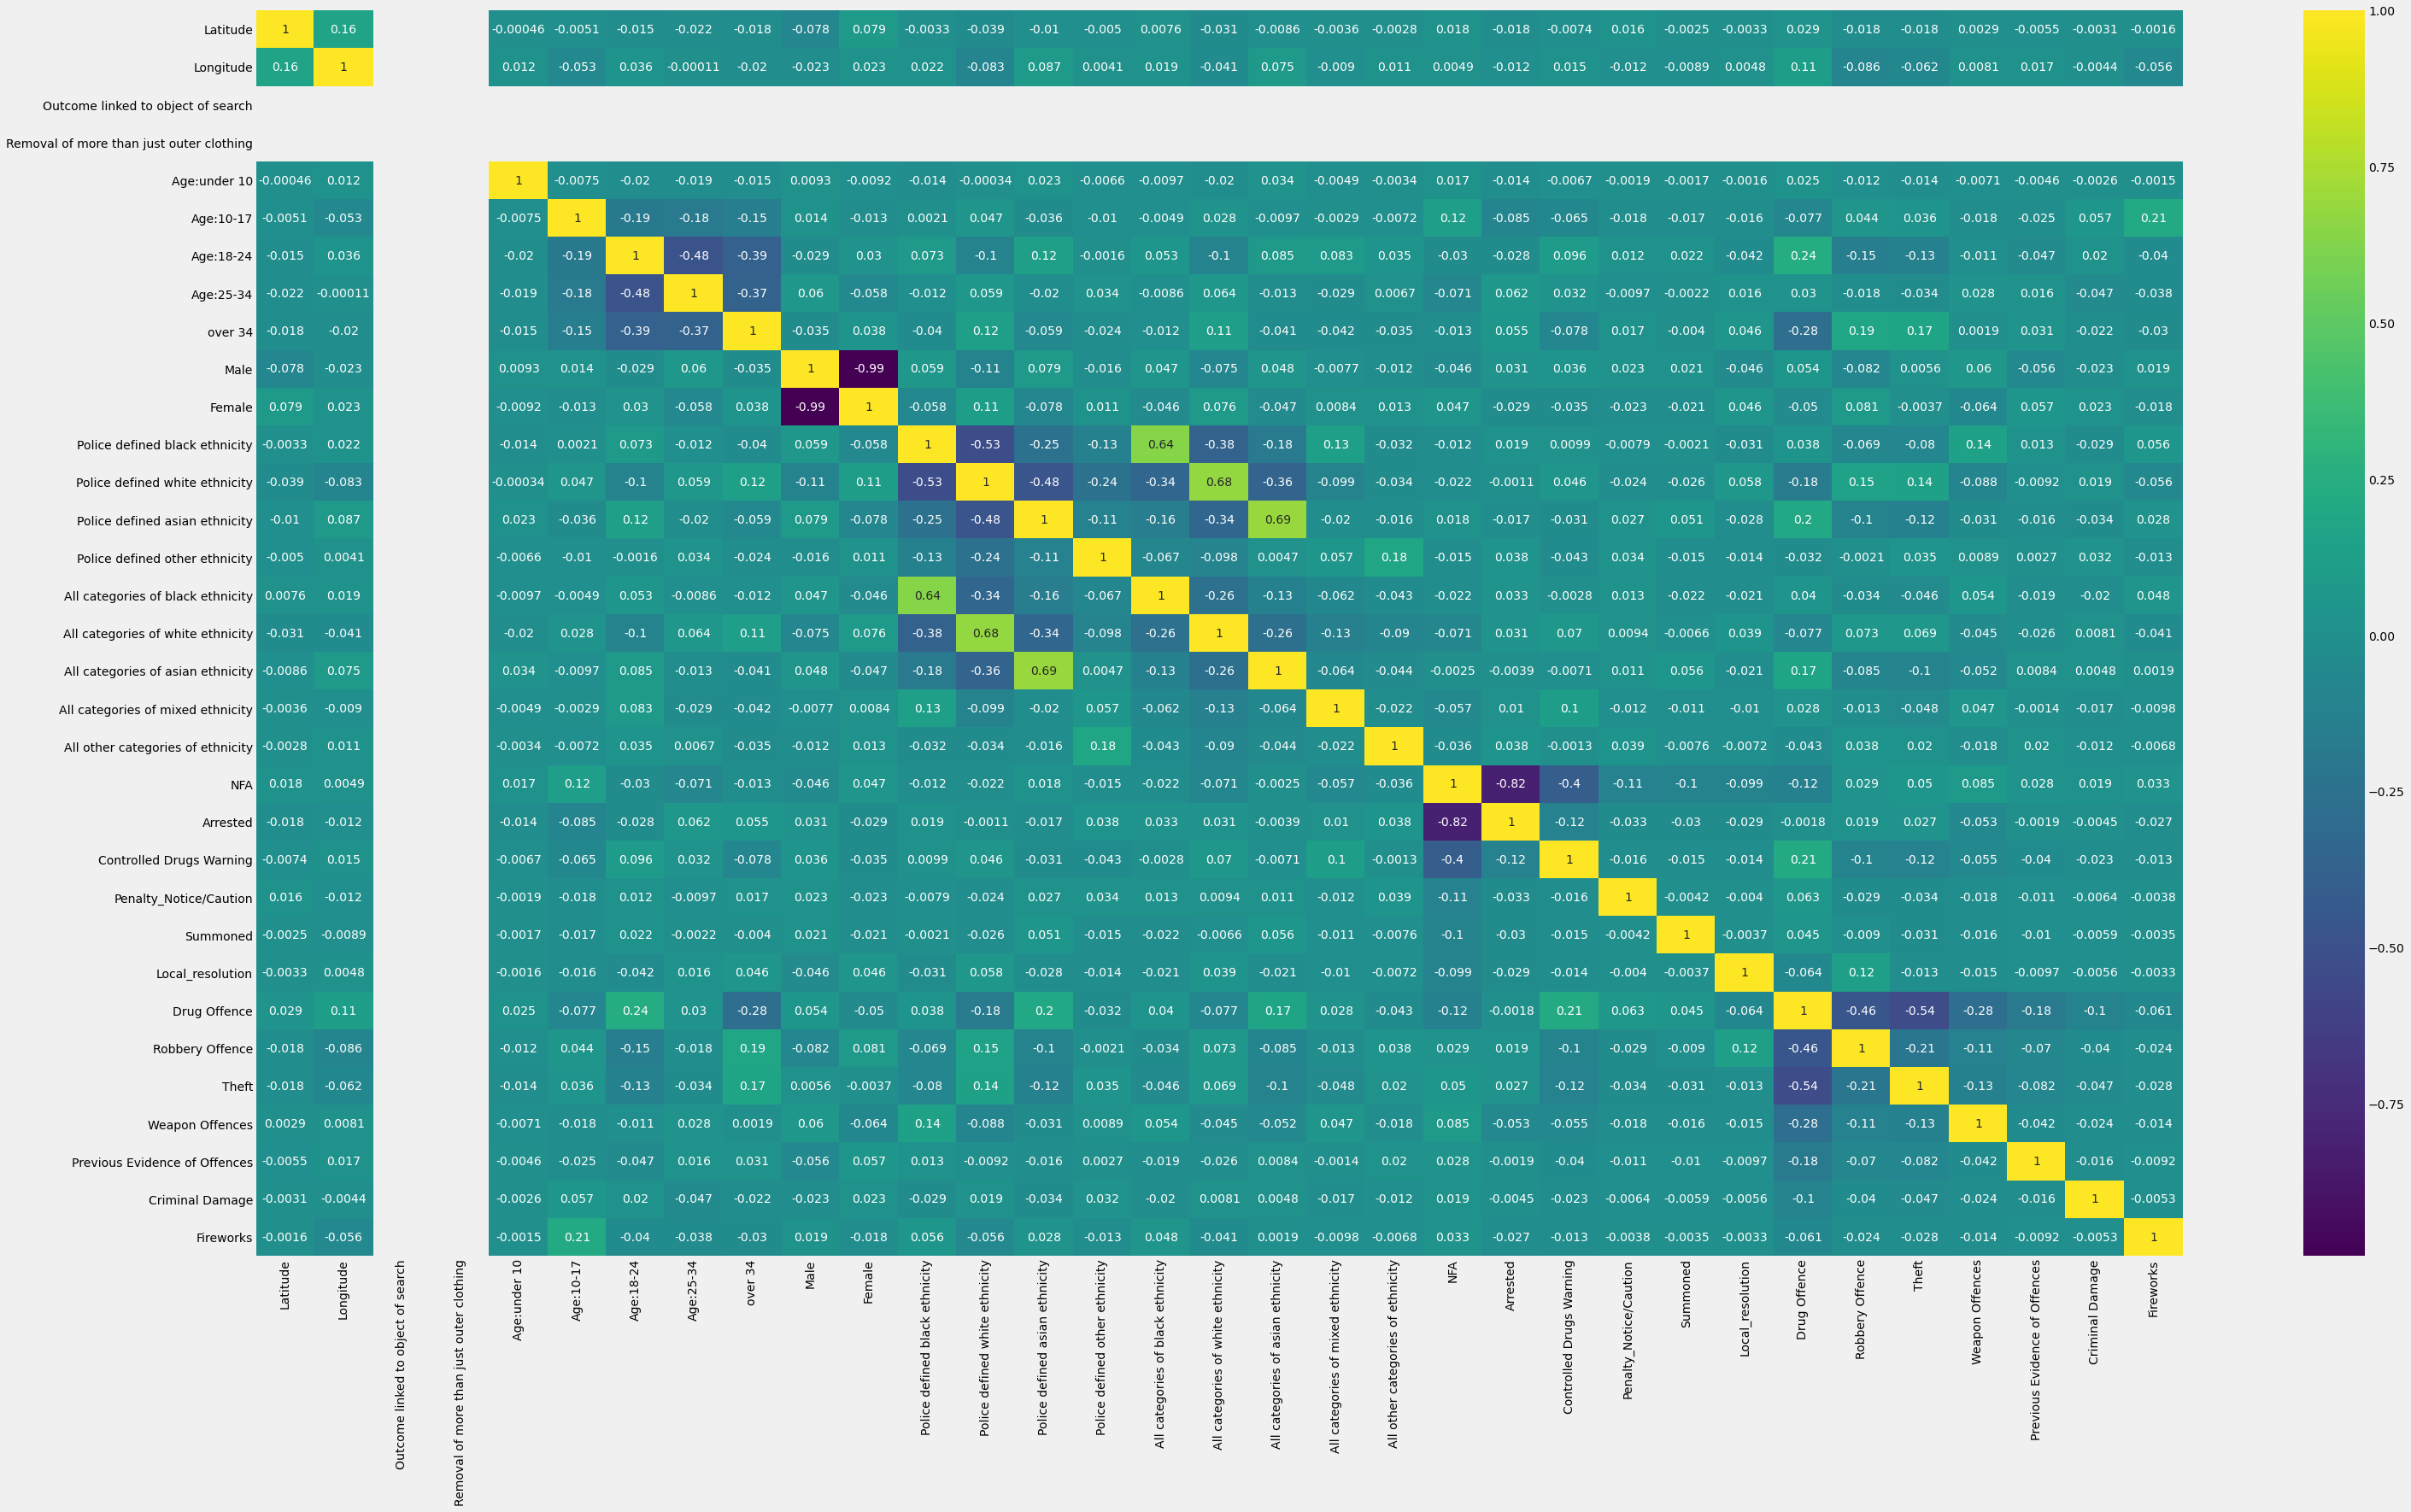

In [147]:
#Lets visual this to be able to easily extract insight.

plt.figure(num=100, figsize=(45,25))
plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)
sns.heatmap(df_search.corr(),annot=True, cmap='viridis')#'coolwarm')

There are several take away information from this heatmap; Core evaluations;

from [Arrest] column highest correlated features: 

- Controlled Drugs 0.12
- NFA (negative) 0.82
- Outcome linked to outcome of search 0.65

from [Drug Offence] column highest correlated features:

- Police Defined Asian Ethnicity 0.2
- Police Defined White Ethnicity -0.18
- Controlled drugs Warning 0.21
- Previous evidence of offences -0.18
- Weapon offences -0.28
- Theft -0.54
- Robbery Offence -0.46
- NFA -0.12
- over 34 -0.28
- 18-24 = 0.24

from [Theft] column highest correlated features: 

- Police defined(White) 0.14
- Theft 0.17
- 18-24 = - 0.13


From [Weapon offences] column highest correlated features:

- Police defined (Black) 0.14
- Drug offences 0.28

from [Previous evidence of offences] column highest correlated features:
- Drug Offences -0.18

from [Controlled drugs warning] column highest correlated features:
- Drug offence 0.21
.
.
.
.
.

# Geospatial Analysis of both Crime data frame and Stop and Search in search for Patterns

Examing the data frames

In [148]:
df_crime.head()

Crime ID    Month  \
Month                                                                    
2019-10-01                                                     2019-10   
2019-10-01                                                     2019-10   
2019-10-01  23ec49b879ae98cbe271fa4c7f87d24bbe386d1a7e5437...  2019-10   
2019-10-01  c342ee15a58a80f4d03ff91b20d25ce9dd633ac38e649a...  2019-10   
2019-10-01  91391df9f41a8ed353ea290ec8aaa73b2fe02856adc6c9...  2019-10   

                            Reported by                 Falls within  \
Month                                                                  
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   

            Longitude   Latitude                    Location  LSOA code  \
Month                                                                     
2019-10-01  -0.122940  51.526341  On or near Tavistock Place  E01000937   
2019-10-01  -0.122310  51.525521   On or near Henrietta Mews  E01000937   
2019-10-01  -0.121515  51.526642    On or near Regent Square  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   

              LSOA name             Crime type          Last outcome category  \
Month                                                                           
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B               Burglary      Status update unavailable   
2019-10-01  Camden 025B                  Drugs  Offender given penalty notice   
2019-10-01  Camden 025B                  Drugs               Local resolution   

           Context                   geometry  Arrested  Domestic  \
Month                                                               
2019-10-01          POINT (-0.12294 51.52634)       0.0       0.0   
2019-10-01          POINT (-0.12231 51.52552)       0.0       0.0   
2019-10-01          POINT (-0.12152 51.52664)       0.0       0.0   
2019-10-01          POINT (-0.12334 51.52545)       0.0       0.0   
2019-10-01          POINT (-0.12334 51.52545)       0.0       1.0   

            Warning Given  No Further Action  Theft  Robbery  \
Month                                                          
2019-10-01            0.0                0.0    0.0      0.0   
2019-10-01            0.0                0.0    0.0      0.0   
2019-10-01            1.0                0.0    0.0      1.0   
2019-10-01            1.0                0.0    0.0      0.0   
2019-10-01            0.0                0.0    0.0      0.0   

            Social_Infringement  Drug,Weapon and other  
Month                                                   
2019-10-01                  1.0                    0.0  
2019-10-01                  1.0                    0.0  
2019-10-01                  0.0                    0.0  
2019-10-01                  0.0                    1.0  
2019-10-01                  0.0                    1.0

In [149]:
df_search.head()

Type       Date   Latitude  Longitude Gender  \
0  Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1              Person search 2019-10-01  51.509313  -0.073850   Male   
2              Person search 2019-10-01  51.509313  -0.073850   Male   
3              Person search 2019-10-01  51.510671  -0.084284   Male   
4              Person search 2019-10-02  51.513952  -0.085833   Male   

  Age range             Self-defined ethnicity Officer-defined ethnicity  \
0     18-24  Asian/Asian British - Bangladeshi                     Asian   
1     25-34  Asian/Asian British - Bangladeshi                     Asian   
2     10-17    Other ethnic group - Not stated                     Asian   
3   over 34    Other ethnic group - Not stated                     White   
4     18-24  Asian/Asian British - Bangladeshi                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome  Outcome linked to object of search  \
0  A no further action disposal                                 0.0   
1  A no further action disposal                                 0.0   
2                        Arrest                                 0.0   
3  A no further action disposal                                 0.0   
4                        Arrest                                 0.0   

   Removal of more than just outer clothing                   geometry  \
0                                       0.0  POINT (-0.07385 51.50931)   
1                                       0.0  POINT (-0.07385 51.50931)   
2                                       0.0  POINT (-0.07385 51.50931)   
3                                       0.0  POINT (-0.08428 51.51067)   
4                                       0.0  POINT (-0.08583 51.51395)   

                   geo                                      city_district  \
0   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
1   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
2   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
3  51.510671,-0.084284  (23-39 Eastcheap, 23-39, Eastcheap, Bishopsgat...   
4  51.513952,-0.085833  (Cock and Woolpack, 6, Finch Lane, Bishopsgate...   

   Age:under 10  Age:10-17  Age:18-24  Age:25-34  over 34  Male  Female  \
0           0.0        0.0        1.0        0.0      0.0   1.0     0.0   
1           0.0        0.0        0.0        1.0      0.0   1.0     0.0   
2           0.0        1.0        0.0        0.0      0.0   1.0     0.0   
3           0.0        0.0        0.0        0.0      1.0   1.0     0.0   
4           0.0        0.0        1.0        0.0      0.0   1.0     0.0   

   Police defined black ethnicity  Police defined white ethnicity  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             1.0   
4                             0.0                             0.0   

   Police defined asian ethnicity  Police defined other ethnicity  \
0                             1.0                             0.0   
1                             1.0                             0.0   
2                             1.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   All categories of black ethnicity  All categories of white ethnicity  

In [150]:
#Adding Arrested Column
#I will be adding 'Arrested' column from outcome = ['Under investigation','Awaiting Court outcome' and 'Court result unavailable']

df_crime['Arrested']=((df_crime['Last outcome category']=='Under investigation') | (df_crime['Last outcome category']=='Awaiting court outcome')|(df_crime['Last outcome category']=='Court result unavailable'))

#Adding Domestic Column

#I will be adding 'Domestic' column from outcome = ['Formal action is not in the public interest' and 'Local resolution']

df_crime['Domestic']=((df_crime['Last outcome category']=='Formal action is not in the public interest') | (df_crime['Last outcome category']=='Local resolution')|(df_crime['Last outcome category']=='Action to be taken by another organisation')|(df_crime['Last outcome category']=='Further investigation is not in the public interest'))

df_crime['Warning Given']=((df_crime['Last outcome category']=='Status update unavailable')|(df_crime['Last outcome category']=='Offender given penalty notice')|(df_crime['Last outcome category']=='Offender given a caution')|(df_crime['Last outcome category']=='Offender given a drugs possession warning'))
#Adding NFA Column

#I will be adding 'No Further Action' from outcome = ['Investigation complete; no suspect identified' and Unable to prosecute suspect]

df_crime['No Further Action']=((df_crime['Last outcome category']=='Investigation complete; no suspect identified') | (df_crime['Last outcome category']=='Unable to prosecute suspect'))

#Adding Theft Column

#I will be adding 'Theft' from Crime type = ['Other theft'; 'Bicycle theft'; 'Shoplifting']

df_crime['Theft']=((df_crime['Crime type']=='Other theft') | (df_crime['Crime type']=='Bicycle theft')|(df_crime['Crime type']=='Shoplifting'))

#Adding Robbery Column

#1I will be adding 'Robbery' from Crime type = ['Robbery','Burglary']

df_crime['Robbery']=((df_crime['Crime type']=='Robbery') | (df_crime['Crime type']=='Burglary'))

#Adding Social_Infringement column

#I will be adding 'Social_Infringement' from Crime type = ['Anti-social behaviour','Public order']

df_crime['Social_Infringement']=((df_crime['Crime type']=='Anti-social behaviour') | (df_crime['Crime type']=='Public order'))

#Adding 'Drug_weapon_other'

#I will be adding 'Drug,Weapon and other' from crime type = ['Drugs', 'Other crime','Possession of weapons']

df_crime['Drug,Weapon and other']=((df_crime['Crime type']=='Drugs') | (df_crime['Crime type']=='Other crime')|(df_crime['Crime type']=='Possession of weapons'))



Displacement of Crime and Stop and Search for Inner London

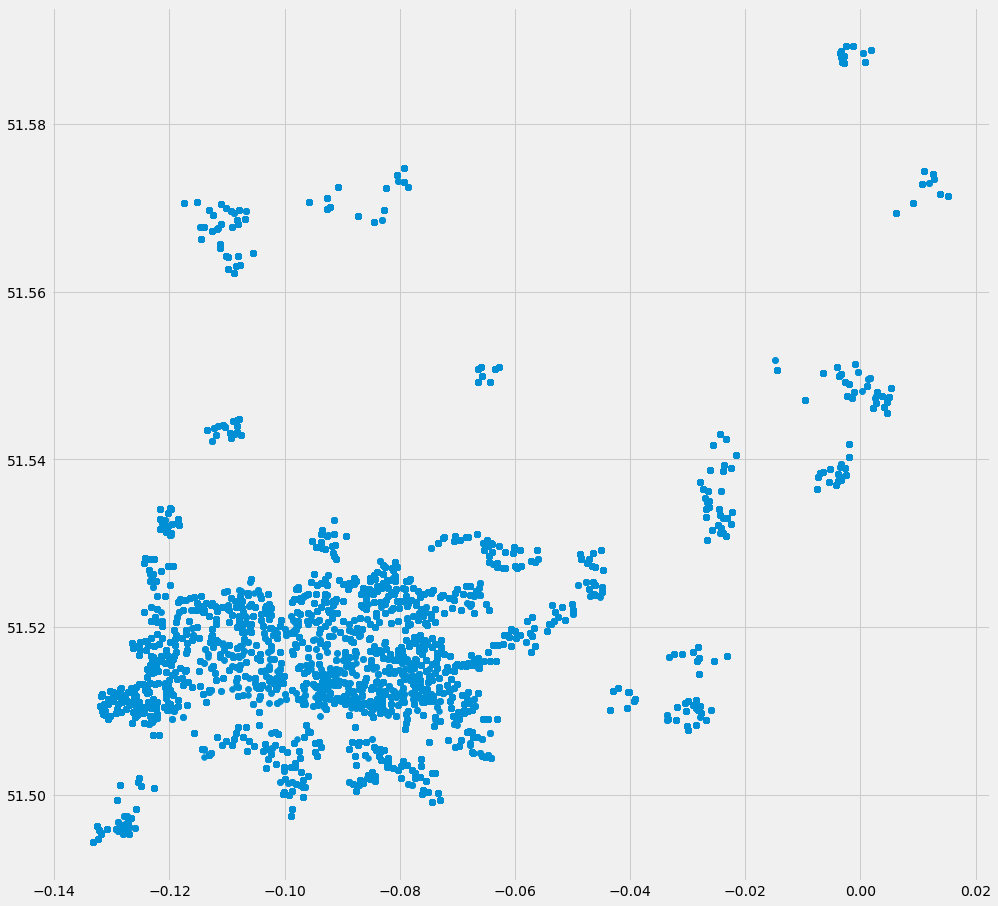

In [151]:
plt.scatter(df_crime['Longitude'],df_crime['Latitude'])

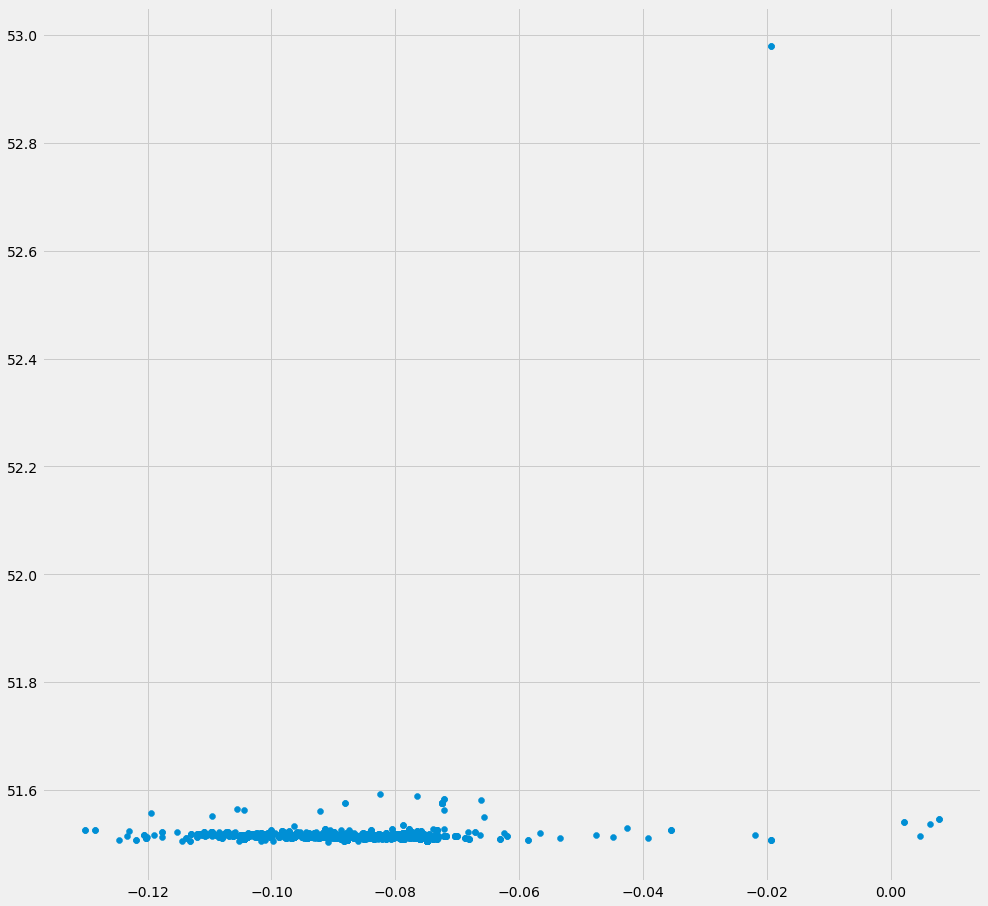

In [152]:
plt.scatter(df_search['Longitude'],df_search['Latitude'])

In [153]:
#Outbound=df_search[df_search['Latitude'].between(52,53)]

In [154]:
#Delete coordinates which are out of bounds!
df_search = df_search[~(df_search['Latitude'] >= 52)] 
#df_search = df_search[(df_search['Theift'])]

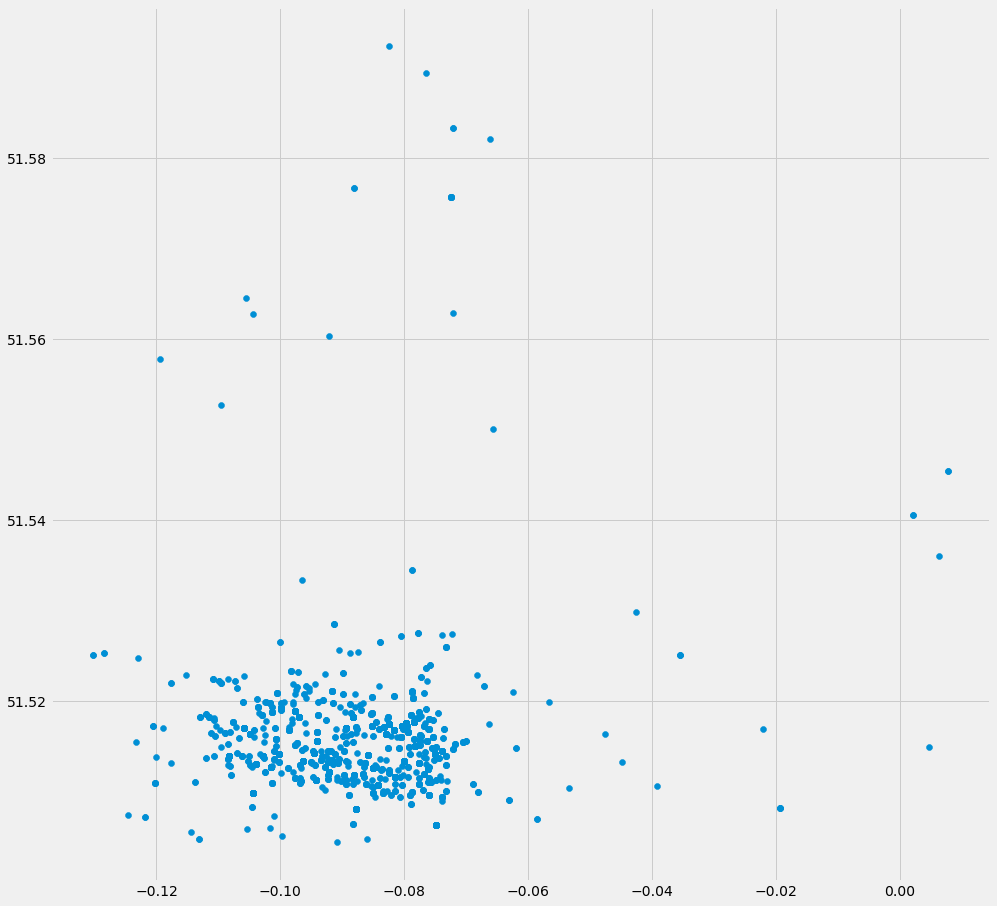

In [155]:
plt.scatter(df_search['Longitude'],df_search['Latitude'])

In [ ]:
df_crime.head()

Load in Shape file

In [156]:
#Load London Shape file
ldn_shape= gpd.read_file('LOAC.shp')

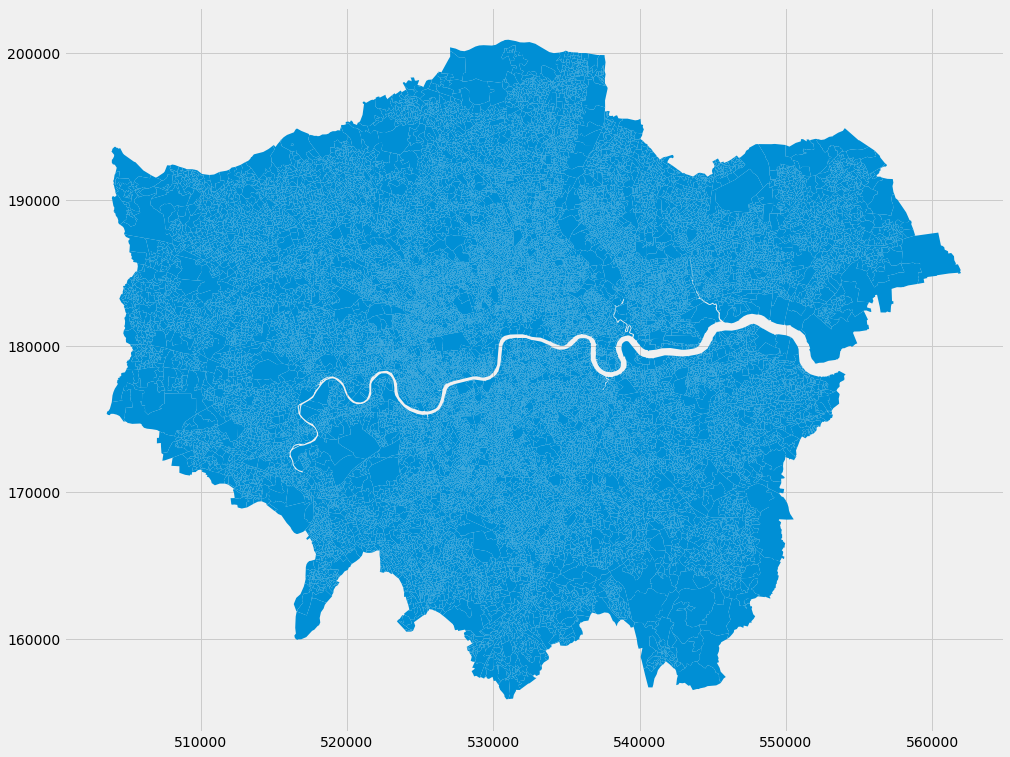

In [157]:
ldn_shape.plot()

In [158]:
ldn_shape.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [159]:
crs={'init':'EPSG:27700'}

Transform Long & Lat columns into British National Grid Measurement using Pyproj

In [161]:
df_search.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2596 entries, 0 to 3392
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Type                                      2596 non-null   object        
 1   Date                                      2596 non-null   datetime64[ns]
 2   Latitude                                  2596 non-null   float64       
 3   Longitude                                 2596 non-null   float64       
 4   Gender                                    2593 non-null   object        
 5   Age range                                 2462 non-null   object        
 6   Self-defined ethnicity                    2490 non-null   object        
 7   Officer-defined ethnicity                 2487 non-null   object        
 8   Legislation                               2595 non-null   object        
 9   Object of search      

In [162]:
#We need to convert Long & Latitude into the British National Grid scale
from pyproj import Transformer
trans = Transformer.from_crs(4326, 27700, always_xy=True)

xx, yy = trans.transform(df_crime["Longitude"].values, df_crime["Latitude"].values)
df_crime["X"] = xx
df_crime["Y"] = yy

In [163]:
#We need to convert Long & Latitude into the British National Grid scale
from pyproj import Transformer
trans = Transformer.from_crs(4326, 27700, always_xy=True)

xx, yy = trans.transform(df_search["Longitude"].values, df_search["Latitude"].values)
df_search["X"] = xx
df_search["Y"] = yy

In [165]:
geometry_crime = [Point(xy) for xy in zip(df_crime['X'],df_crime['Y'])]
geometry_crime[:3]

In [166]:
#df_search=gpd.GeoDataFrame(df_search,geometry=gpd.points_from_xy(df_search.Longitude,df_search.Latitude))

geometry_search = [Point(xy) for xy in zip(df_search['X'],df_search['Y'])]
geometry_search[:3]

In [429]:
geo_crime=gpd.GeoDataFrame(df_crime,crs=crs,geometry=geometry_crime)

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [168]:
geo_search=gpd.GeoDataFrame(df_search,crs=crs,geometry=geometry_search)

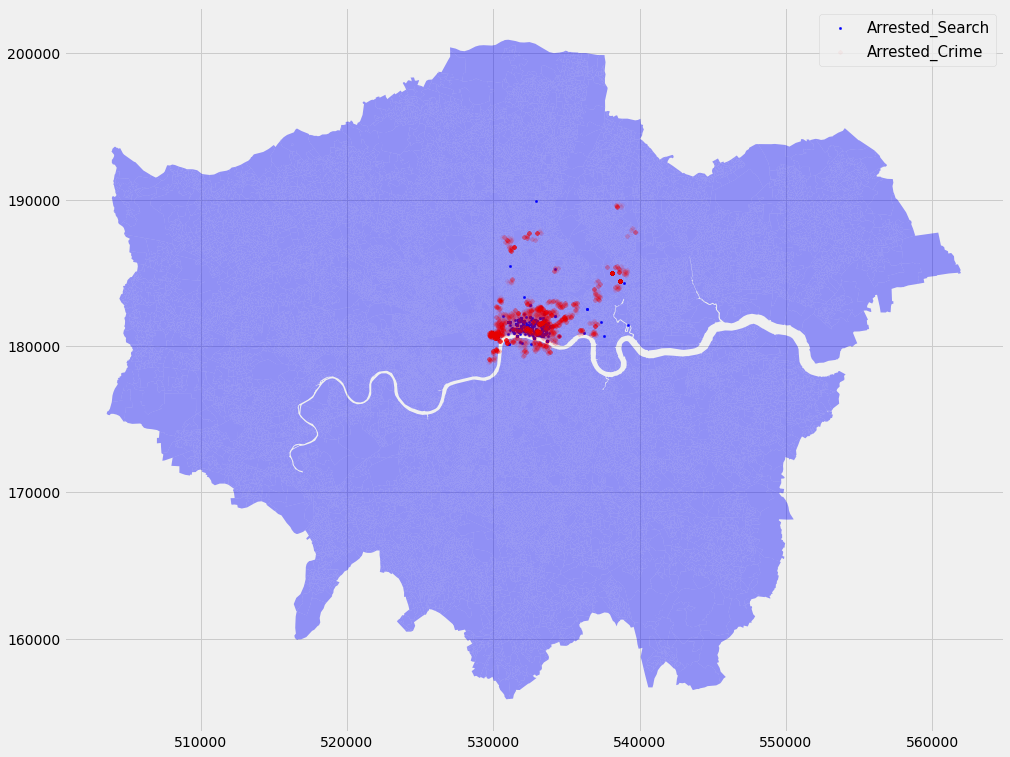

In [177]:
fig,ax = plt.subplots(figsize =(15,15))
ldn_shape.plot(ax=ax, alpha = 0.4, color='blue')
geo_search[geo_search['Arrested']==1].plot(ax=ax,markersize = 5, color ='blue', marker='o',label = 'Arrested_Search')
geo_crime[geo_crime['Arrested']==1].plot(ax=ax,markersize = 5, color ='red', marker='x',label = 'Arrested_Crime',alpha =0.04)
plt.legend(prop={'size':15})

Focussing on inner London, We need to get more zoomed in order to be able to spatially analyse the arrests, therefore I will delete a few boroughs in order to gain a more zoomed in image

In [178]:
print(ldn_shape)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [179]:
list(ldn_shape['LAD11NM'].unique())

['Wandsworth',
 'Bromley',
 'Southwark',
 'Enfield',
 'Westminster',
 'Waltham Forest',
 'Brent',
 'Hillingdon',
 'Kensington and Chelsea',
 'Tower Hamlets',
 'Barking and Dagenham',
 'Croydon',
 'Camden',
 'Lambeth',
 'Richmond upon Thames',
 'Islington',
 'Hackney',
 'Havering',
 'Haringey',
 'Merton',
 'Ealing',
 'Hounslow',
 'Sutton',
 'Bexley',
 'Newham',
 'Kingston upon Thames',
 'Greenwich',
 'Barnet',
 'Redbridge',
 'Lewisham',
 'Hammersmith and Fulham',
 'Harrow',
 'City of London']

In [180]:
#Adding in all inner london boroughs to gain a full insight of data available 
inner_ldn=['Islington', 'Hackney','Westminster','Tower Hamlets','Camden','City of London','Haringey','Newham','Southwark','Lambeth']
CoL=ldn_shape.loc[ldn_shape['LAD11NM'].isin(inner_ldn)]

In [181]:
#Zoomed in view of London itself for a more tailored view
City=['City of London']
Only_CoL=ldn_shape.loc[ldn_shape['LAD11NM'].isin(City)]

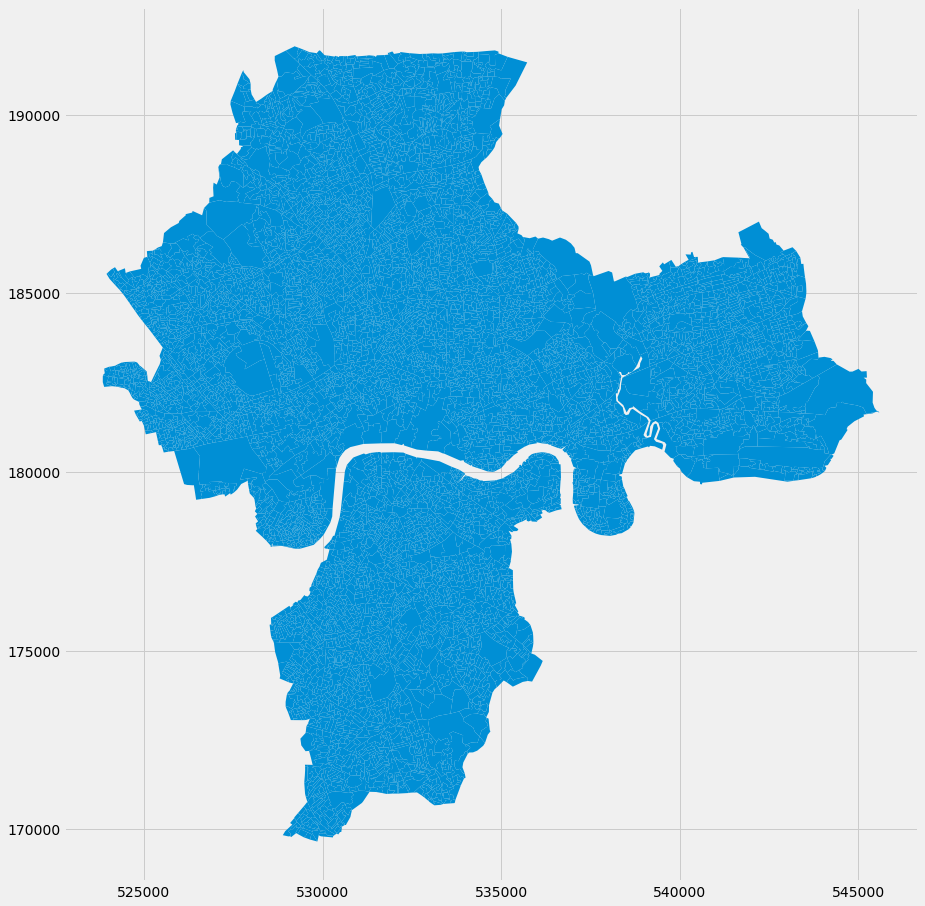

In [182]:
#Imported shape dataset
CoL.plot()

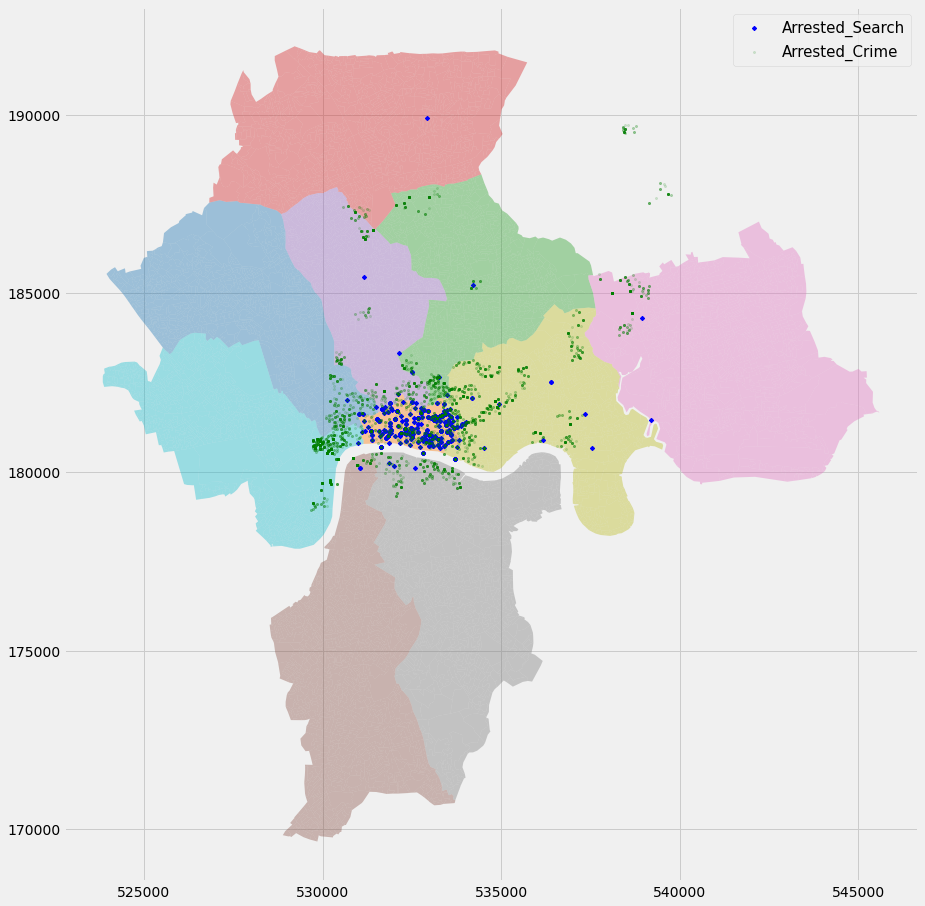

In [188]:
#Map of inner london with Coloured bourogh regions showing Arrests
fig,ax = plt.subplots(figsize =(15,15))
CoL.plot(column='LAD11NM', ax=ax, alpha = 0.4) #color='blue')
geo_search[geo_search['Arrested']==1].plot(ax=ax,markersize = 5, color ='blue', marker='x',label = 'Arrested_Search')
geo_crime[geo_crime['Arrested']==1].plot(ax=ax,markersize = 5, color ='green', marker='o',label = 'Arrested_Crime',alpha = 0.16)
plt.legend(prop={'size':15})

In [ ]:
Comment:

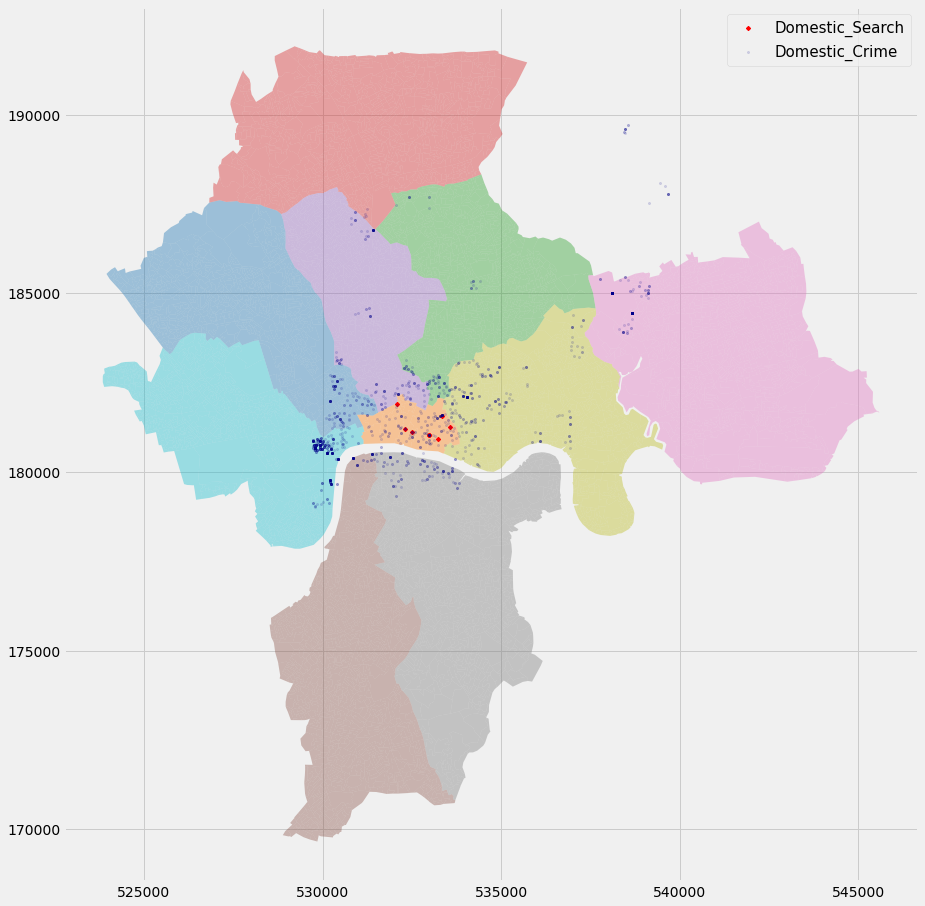

In [191]:
fig,ax = plt.subplots(figsize =(15,15))
CoL.plot(column='LAD11NM', ax=ax, alpha = 0.4) #color='blue')
geo_search[geo_search['Local_resolution']==1].plot(ax=ax,markersize = 5, color ='red', marker='x',label = 'Domestic_Search')
geo_crime[geo_crime['Domestic']==1].plot(ax=ax,markersize = 5, color ='darkblue', marker='o',label = 'Domestic_Crime',alpha = 0.15)
plt.legend(prop={'size':15})

In [ ]:
Comment:

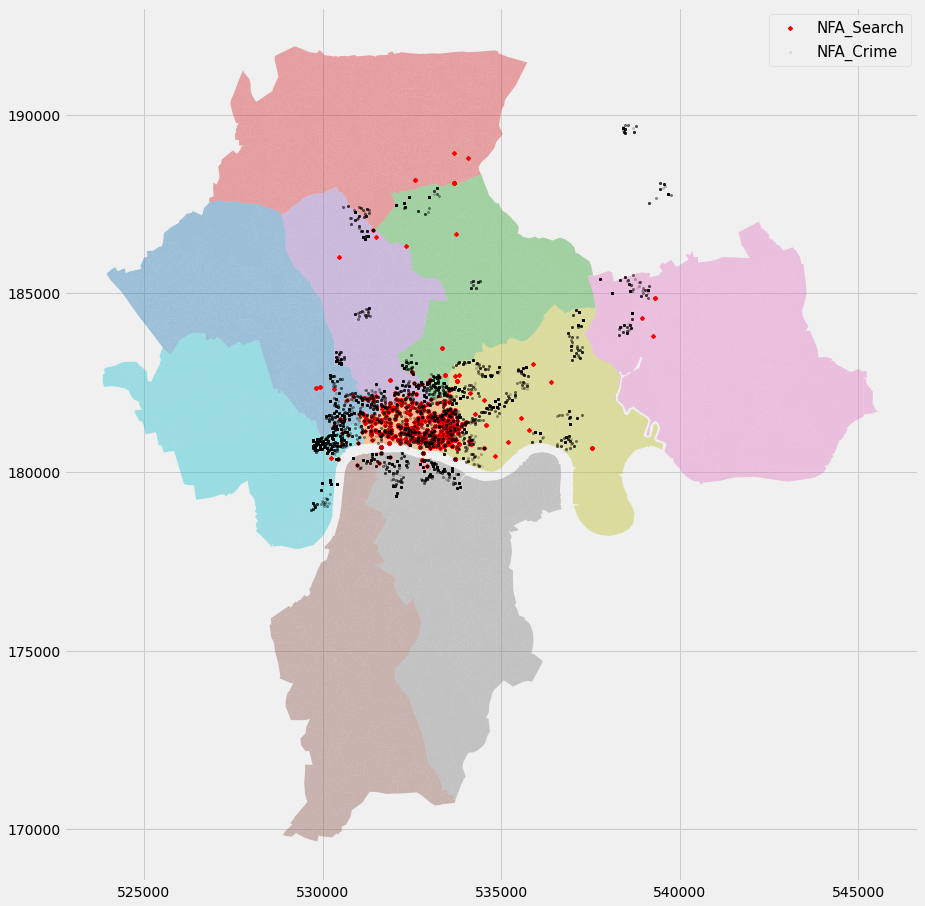

In [195]:
fig,ax = plt.subplots(figsize =(15,15))
CoL.plot(column='LAD11NM', ax=ax, alpha = 0.4) #color='blue')
geo_search[geo_search['NFA']==1].plot(ax=ax,markersize = 5, color ='red', marker='x',label = 'NFA_Search')
geo_crime[geo_crime['No Further Action']==1].plot(ax=ax,markersize = 5, color ='black', marker='o',label = 'NFA_Crime',alpha = 0.1)
plt.legend(prop={'size':15})

In [ ]:
Comment:

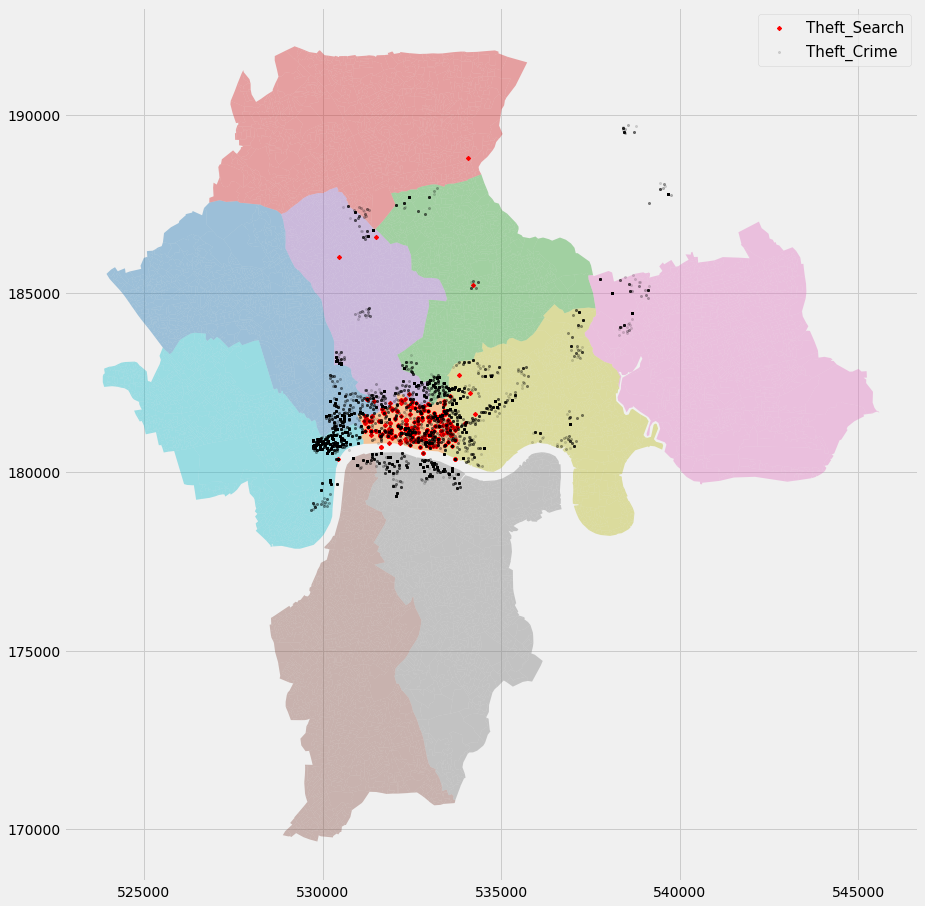

In [196]:
fig,ax = plt.subplots(figsize =(15,15))
CoL.plot(column='LAD11NM', ax=ax, alpha = 0.4) #color='blue')
geo_search[geo_search['Theft']==1].plot(ax=ax,markersize = 5, color ='red', marker='x',label = 'Theft_Search')
geo_crime[geo_crime['Theft']==1].plot(ax=ax,markersize = 5, color ='black', marker='o',label = 'Theft_Crime',alpha = 0.15)
plt.legend(prop={'size':15})

In [ ]:
df_crime.head()

In [ ]:
df_search.head()

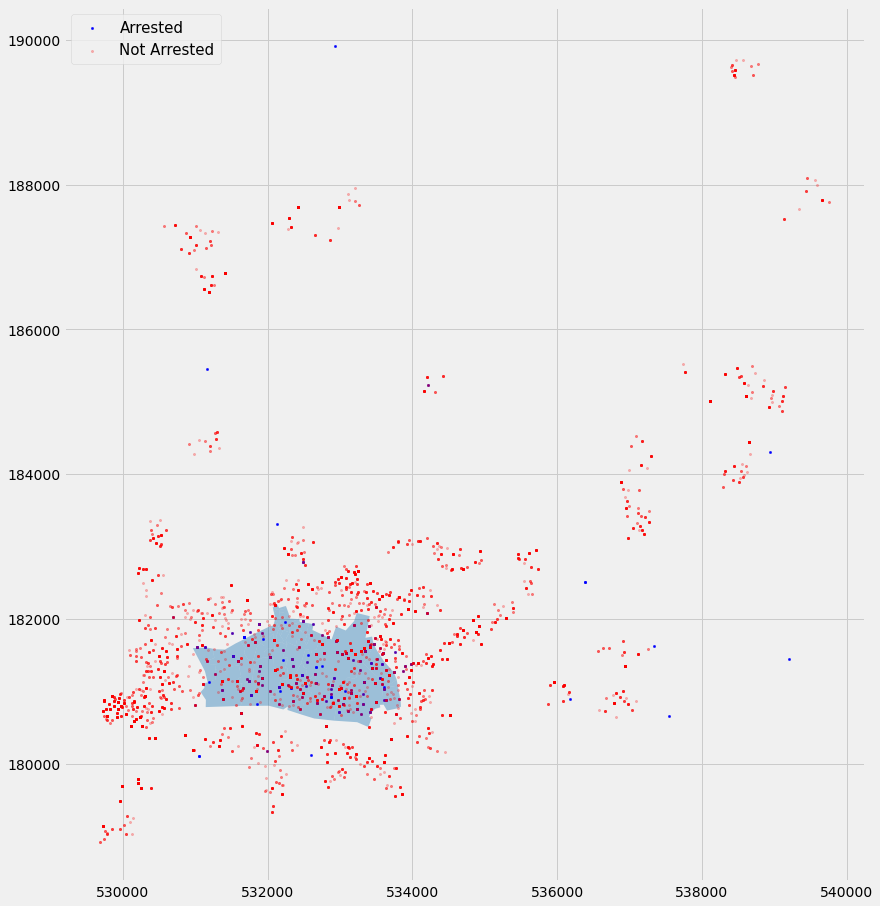

In [434]:
#Zoomed in City of London highlighted 
fig,ax = plt.subplots(figsize =(15,15))
Only_CoL.plot(column='LAD11NM', ax=ax, alpha = 0.4) #color='blue')
geo_search[geo_search['Arrested']==1].plot(ax=ax,markersize = 5, color ='blue', marker='o',label = 'Arrested')
geo_crime[geo_crime['Arrested']==1].plot(ax=ax,markersize = 5, color ='red',alpha = 0.29, marker='o',label = 'Not Arrested')
plt.legend(prop={'size':15})

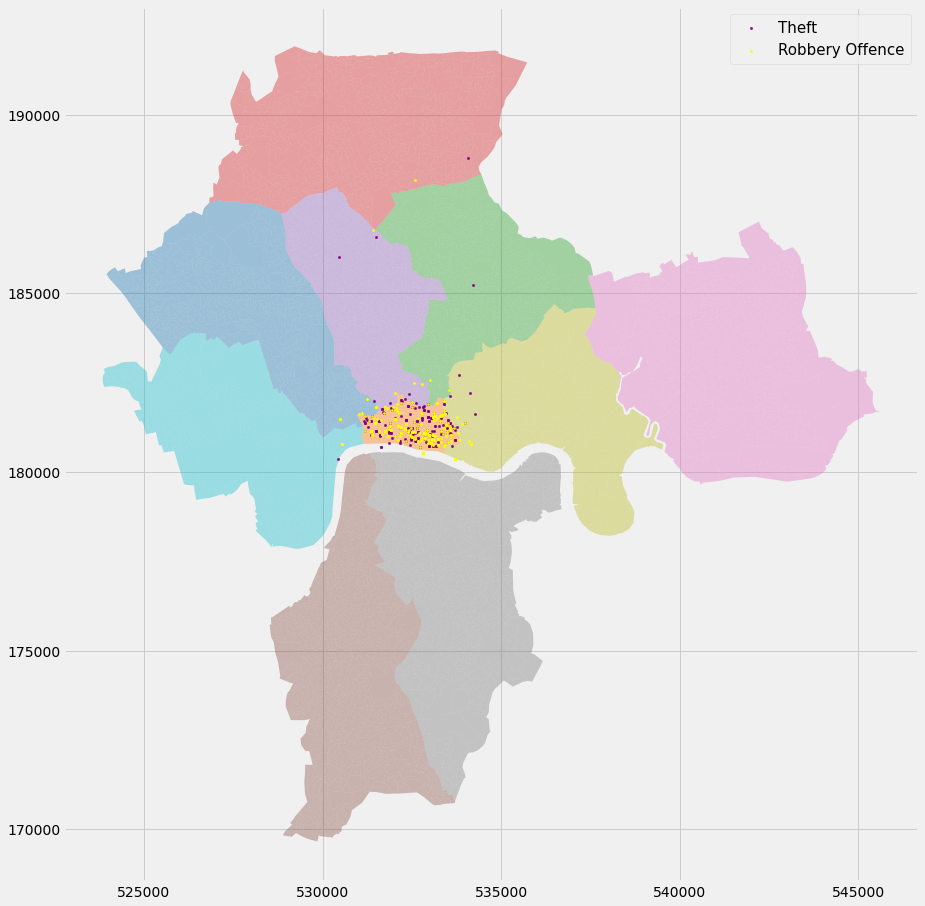

In [198]:
fig,ax = plt.subplots(figsize =(15,15))
CoL.plot(column='LAD11NM', ax=ax, alpha = 0.4) #color='blue')
geo_search[geo_search['Theft']==1].plot(ax=ax,markersize = 5, color ='purple', marker='o',label = 'Theft')
geo_search[geo_search['Robbery Offence']==1].plot(ax=ax,markersize = 5, color ='yellow', marker='o',label = 'Robbery Offence')
plt.legend(prop={'size':15})

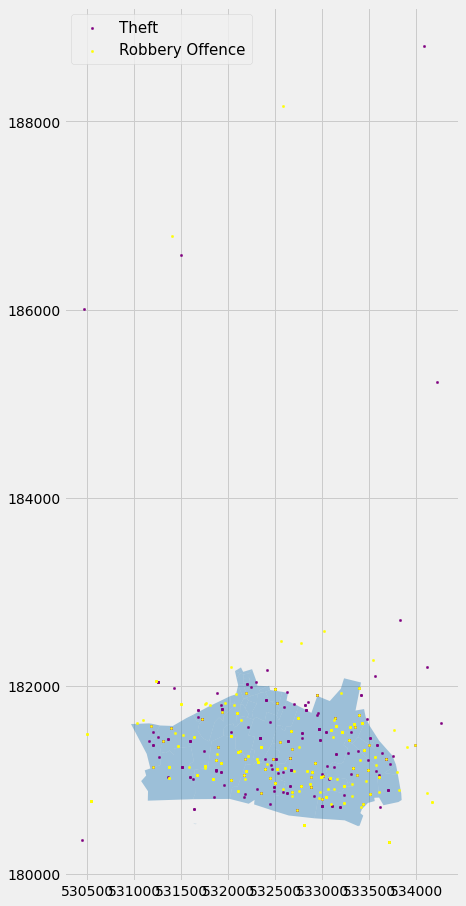

In [199]:
#Zoomed in City of london map with Theft highlighted
fig,ax = plt.subplots(figsize =(15,15))
Only_CoL.plot(column='LAD11NM', ax=ax, alpha = 0.4) #color='blue')
geo_search[geo_search['Theft']==1].plot(ax=ax,markersize = 5, color ='purple', marker='o',label = 'Theft')
geo_search[geo_search['Robbery Offence']==1].plot(ax=ax,markersize = 5, color ='yellow', marker='o',label = 'Robbery Offence')
plt.legend(prop={'size':15})

Comment: GEospatial analysis was interesting, although no mathematic trend or patterns could be derived as both datasets are limited in nuermeical information as mapping provides fantastic visuals, the area we are cover is too small to be able to breakdown area space and come demographics and crime status. we did however find major clusteres of arrests in the north east mapping of the for the borough for crime. we found high number of theft being done in the area betwen algate and liverpool street

# **Using Machine Learning to analyse the affects on crime over the *Lockdown* period**

I will be splitting both [crime] and [stop and search] dataframes at the point of which Lockdown had occured: 

1st Octber 2019 - 31 June 2020 (9 months) - Training Set
1st July 2020 - 31st October 2020 (3 Months) - Test Set

This will split the Data 70/30 although this is a relatively large split in respect to the train data; This would give great insight and reflection on how lockdown had affected crime and evaluating how this has left a fracture regards to policing in the inner districts of London. Trianing the model with the lockdown dataset will hopefully allow the model to be able to predict accurately as the hugh erratic change in post lock

I will be using an ensemble method as most my attributes which I have are binary therefore an ensemble method to classify or target will give a well processed model 

In [200]:
df_crime.head()

Crime ID    Month  \
Month                                                                    
2019-10-01                                                     2019-10   
2019-10-01                                                     2019-10   
2019-10-01  23ec49b879ae98cbe271fa4c7f87d24bbe386d1a7e5437...  2019-10   
2019-10-01  c342ee15a58a80f4d03ff91b20d25ce9dd633ac38e649a...  2019-10   
2019-10-01  91391df9f41a8ed353ea290ec8aaa73b2fe02856adc6c9...  2019-10   

                            Reported by                 Falls within  \
Month                                                                  
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   

            Longitude   Latitude                    Location  LSOA code  \
Month                                                                     
2019-10-01  -0.122940  51.526341  On or near Tavistock Place  E01000937   
2019-10-01  -0.122310  51.525521   On or near Henrietta Mews  E01000937   
2019-10-01  -0.121515  51.526642    On or near Regent Square  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   

              LSOA name             Crime type          Last outcome category  \
Month                                                                           
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B               Burglary      Status update unavailable   
2019-10-01  Camden 025B                  Drugs  Offender given penalty notice   
2019-10-01  Camden 025B                  Drugs               Local resolution   

           Context                       geometry  Arrested  Domestic  \
Month                                                                   
2019-10-01          POINT (530311.980 182495.038)     False     False   
2019-10-01          POINT (530358.021 182404.973)     False     False   
2019-10-01          POINT (530409.968 182531.048)     False     False   
2019-10-01          POINT (530286.989 182395.027)     False     False   
2019-10-01          POINT (530286.989 182395.027)     False      True   

            Warning Given  No Further Action  Theft  Robbery  \
Month                                                          
2019-10-01          False              False  False    False   
2019-10-01          False              False  False    False   
2019-10-01           True              False  False     True   
2019-10-01           True              False  False    False   
2019-10-01          False              False  False    False   

            Social_Infringement  Drug,Weapon and other              X  \
Month                                                                   
2019-10-01                 True                  False  530311.980221   
2019-10-01                 True                  False  530358.021095   
2019-10-01                False                  False  530409.967962   
2019-10-01                False                   True  530286.988749   
2019-10-01                False                   True  530286.988749   

                        Y  
Month                      
2019-10-01  182495.038462  
2019-10-01  182404.972738  
2019-10-01  182531.047518  
2019-10-01  182395.027195  
2019-10-01  182395.027195

In [202]:
df_crime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 56288 entries, 2019-10-01 to 2020-10-01
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Crime ID               56288 non-null  object  
 1   Month                  56288 non-null  object  
 2   Reported by            56288 non-null  object  
 3   Falls within           56288 non-null  object  
 4   Longitude              56288 non-null  float64 
 5   Latitude               56288 non-null  float64 
 6   Location               56288 non-null  object  
 7   LSOA code              56288 non-null  object  
 8   LSOA name              56288 non-null  object  
 9   Crime type             56288 non-null  category
 10  Last outcome category  56288 non-null  category
 11  Context                56288 non-null  object  
 12  geometry               56288 non-null  geometry
 13  Arrested               56288 non-null  bool    
 14  Domestic     

In [203]:
#Convert Month into datetime to use as pivot for splitting
df_crime['Month'] = pd.to_datetime(df_crime['Month'])

In [204]:
#Split data to pre and post lockdown enforced dates for crime dataframe 
split_date = pd.datetime(2020,6,30)

df_pre_crime = df_crime.loc[df_crime['Month']<= split_date] #Pre Lockdown
df_post_crime = df_crime.loc[df_crime['Month'] > split_date] #Post Lockdown

<ipython-input-204-f212c9660050>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2020,6,30)


In [205]:
df_pre_crime.head()

Crime ID      Month  \
Month                                                                      
2019-10-01                                                    2019-10-01   
2019-10-01                                                    2019-10-01   
2019-10-01  23ec49b879ae98cbe271fa4c7f87d24bbe386d1a7e5437... 2019-10-01   
2019-10-01  c342ee15a58a80f4d03ff91b20d25ce9dd633ac38e649a... 2019-10-01   
2019-10-01  91391df9f41a8ed353ea290ec8aaa73b2fe02856adc6c9... 2019-10-01   

                            Reported by                 Falls within  \
Month                                                                  
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   
2019-10-01  Metropolitan Police Service  Metropolitan Police Service   

            Longitude   Latitude                    Location  LSOA code  \
Month                                                                     
2019-10-01  -0.122940  51.526341  On or near Tavistock Place  E01000937   
2019-10-01  -0.122310  51.525521   On or near Henrietta Mews  E01000937   
2019-10-01  -0.121515  51.526642    On or near Regent Square  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   
2019-10-01  -0.123337  51.525448    On or near Hunter Street  E01000937   

              LSOA name             Crime type          Last outcome category  \
Month                                                                           
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B  Anti-social behaviour                                  
2019-10-01  Camden 025B               Burglary      Status update unavailable   
2019-10-01  Camden 025B                  Drugs  Offender given penalty notice   
2019-10-01  Camden 025B                  Drugs               Local resolution   

           Context                       geometry  Arrested  Domestic  \
Month                                                                   
2019-10-01          POINT (530311.980 182495.038)     False     False   
2019-10-01          POINT (530358.021 182404.973)     False     False   
2019-10-01          POINT (530409.968 182531.048)     False     False   
2019-10-01          POINT (530286.989 182395.027)     False     False   
2019-10-01          POINT (530286.989 182395.027)     False      True   

            Warning Given  No Further Action  Theft  Robbery  \
Month                                                          
2019-10-01          False              False  False    False   
2019-10-01          False              False  False    False   
2019-10-01           True              False  False     True   
2019-10-01           True              False  False    False   
2019-10-01          False              False  False    False   

            Social_Infringement  Drug,Weapon and other              X  \
Month                                                                   
2019-10-01                 True                  False  530311.980221   
2019-10-01                 True                  False  530358.021095   
2019-10-01                False                  False  530409.967962   
2019-10-01                False                   True  530286.988749   
2019-10-01                False                   True  530286.988749   

                        Y  
Month                      
2019-10-01  182495.038462  
2019-10-01  182404.972738  
2019-10-01  182531.047518  
2019-10-01  182395.027195  
2019-10-01  182395.027195

In [206]:
df_pre_crime.tail()

Crime ID      Month  \
Month                                                                      
2020-06-01  7f7d6df858171f38ad530ac6536da7cc4c88f1ca349be6... 2020-06-01   
2020-06-01  46e368f61c68c329269cd8cc8ed7a3cba47d6e0700e122... 2020-06-01   
2020-06-01  a1f1fed844323b240a7fec0c6207de398c169c7ccb08c3... 2020-06-01   
2020-06-01  04d15e43e7c28c12aa1acc6de944a67fb5a48f351c5bac... 2020-06-01   
2020-06-01  7fcfcb3fd20f89a800995334bac6ca1fbe6f39474900da... 2020-06-01   

                      Reported by           Falls within  Longitude  \
Month                                                                 
2020-06-01  City of London Police  City of London Police  -0.076031   
2020-06-01  City of London Police  City of London Police  -0.074901   
2020-06-01  City of London Police  City of London Police  -0.074901   
2020-06-01  City of London Police  City of London Police  -0.076031   
2020-06-01  City of London Police  City of London Police  -0.111974   

             Latitude                 Location  LSOA code           LSOA name  \
Month                                                                           
2020-06-01  51.509547    On or near Tower Hill  E01004293  Tower Hamlets 027B   
2020-06-01  51.506255          On or near A100  E01004293  Tower Hamlets 027B   
2020-06-01  51.506255          On or near A100  E01004293  Tower Hamlets 027B   
2020-06-01  51.509547    On or near Tower Hill  E01004293  Tower Hamlets 027B   
2020-06-01  51.513683  On or near Fleet Street  E01004735    Westminster 018B   

                       Crime type  \
Month                               
2020-06-01                  Drugs   
2020-06-01  Possession of weapons   
2020-06-01           Public order   
2020-06-01                Robbery   
2020-06-01            Other theft   

                                    Last outcome category Context  \
Month                                                               
2020-06-01      Offender given a drugs possession warning           
2020-06-01                            Under investigation           
2020-06-01    Formal action is not in the public interest           
2020-06-01                    Unable to prosecute suspect           
2020-06-01  Investigation complete; no suspect identified           

                                 geometry  Arrested  Domestic  Warning Given  \
Month                                                                          
2020-06-01  POINT (533614.980 180712.016)     False     False           True   
2020-06-01  POINT (533703.022 180347.999)      True     False          False   
2020-06-01  POINT (533703.022 180347.999)     False      True          False   
2020-06-01  POINT (533614.980 180712.016)     False     False          False   
2020-06-01  POINT (531108.970 181106.997)     False     False          False   

            No Further Action  Theft  Robbery  Social_Infringement  \
Month                                                                
2020-06-01              False  False    False                False   
2020-06-01              False  False    False                False   
2020-06-01              False  False    False                 True   
2020-06-01               True  False     True                False   
2020-06-01               True   True    False                False   

            Drug,Weapon and other              X              Y  
Month                                                            
2020-06-01                   True  533614.979776  180712.016233  
2020-06-01                   True  533703.021536  180347.999073  
2020-06-01                  False  533703.021536  180347.999073  
2020-06-01                  False  533614.979776  180712.016233  
2020-06-01                  False  531108.969825  181106.996802

In [207]:
df_post_crime.head()

Crime ID      Month  \
Month                                                                      
2020-07-01                                                    2020-07-01   
2020-07-01                                                    2020-07-01   
2020-07-01                                                    2020-07-01   
2020-07-01                                                    2020-07-01   
2020-07-01  00c4b5e30380b0ff05225c7fa6fb58ec5e5ba7cf390438... 2020-07-01   

                            Reported by                 Falls within  \
Month                                                                  
2020-07-01  Metropolitan Police Service  Metropolitan Police Service   
2020-07-01  Metropolitan Police Service  Metropolitan Police Service   
2020-07-01  Metropolitan Police Service  Metropolitan Police Service   
2020-07-01  Metropolitan Police Service  Metropolitan Police Service   
2020-07-01  Metropolitan Police Service  Metropolitan Police Service   

            Longitude   Latitude                   Location  LSOA code  \
Month                                                                    
2020-07-01  -0.120305  51.527306  On or near Seaford Street  E01000937   
2020-07-01  -0.122310  51.525521  On or near Henrietta Mews  E01000937   
2020-07-01  -0.123337  51.525448   On or near Hunter Street  E01000937   
2020-07-01  -0.120305  51.527306  On or near Seaford Street  E01000937   
2020-07-01  -0.123337  51.525448   On or near Hunter Street  E01000937   

              LSOA name             Crime type  \
Month                                            
2020-07-01  Camden 025B  Anti-social behaviour   
2020-07-01  Camden 025B  Anti-social behaviour   
2020-07-01  Camden 025B  Anti-social behaviour   
2020-07-01  Camden 025B  Anti-social behaviour   
2020-07-01  Camden 025B          Bicycle theft   

                                    Last outcome category Context  \
Month                                                               
2020-07-01                                                          
2020-07-01                                                          
2020-07-01                                                          
2020-07-01                                                          
2020-07-01  Investigation complete; no suspect identified           

                                 geometry  Arrested  Domestic  Warning Given  \
Month                                                                          
2020-07-01  POINT (530492.004 182607.042)     False     False          False   
2020-07-01  POINT (530358.021 182404.973)     False     False          False   
2020-07-01  POINT (530286.989 182395.027)     False     False          False   
2020-07-01  POINT (530492.004 182607.042)     False     False          False   
2020-07-01  POINT (530286.989 182395.027)     False     False          False   

            No Further Action  Theft  Robbery  Social_Infringement  \
Month                                                                
2020-07-01              False  False    False                 True   
2020-07-01              False  False    False                 True   
2020-07-01              False  False    False                 True   
2020-07-01              False  False    False                 True   
2020-07-01               True   True    False                False   

            Drug,Weapon and other              X              Y  
Month                                                            
2020-07-01                  False  530492.003780  182607.042263  
2020-07-01                  False  530358.021095  182404.972738  
2020-07-01                  False  530286.988749  182395.027195  
2020-07-01                  False  530492.003780  182607.042263  
2020-07-01                  False  530286.988749  182395.027195

In [208]:
df_post_crime.tail()

Crime ID      Month  \
Month                                                                      
2020-10-01  c9880ca0159dde4824aae22fc77b53e6837ceab602789c... 2020-10-01   
2020-10-01  092e2c6aa03e026b5398dd1ed1e2fb0dffba315341d17c... 2020-10-01   
2020-10-01  0440b0b0be071c901fd2c86ef7d94e19633e29d13d63bc... 2020-10-01   
2020-10-01  ac04a0563d6464908f5061c431512e492b87de52be6c19... 2020-10-01   
2020-10-01  3b96d8c23a246606a0c13bcaed5b91cc5e1ef7a323660e... 2020-10-01   

                      Reported by           Falls within  Longitude  \
Month                                                                 
2020-10-01  City of London Police  City of London Police  -0.074901   
2020-10-01  City of London Police  City of London Police  -0.074901   
2020-10-01  City of London Police  City of London Police  -0.079130   
2020-10-01  City of London Police  City of London Police  -0.076031   
2020-10-01  City of London Police  City of London Police  -0.121813   

             Latitude                        Location  LSOA code  \
Month                                                              
2020-10-01  51.506255                 On or near A100  E01004293   
2020-10-01  51.506255                 On or near A100  E01004293   
2020-10-01  51.507808       On or near Ferry Terminal  E01004293   
2020-10-01  51.509547           On or near Tower Hill  E01004293   
2020-10-01  51.507133  On or near Victoria Embankment  E01004733   

                     LSOA name             Crime type  \
Month                                                   
2020-10-01  Tower Hamlets 027B                  Drugs   
2020-10-01  Tower Hamlets 027B                  Drugs   
2020-10-01  Tower Hamlets 027B            Other theft   
2020-10-01  Tower Hamlets 027B  Theft from the person   
2020-10-01    Westminster 020C           Public order   

                                    Last outcome category Context  \
Month                                                               
2020-10-01      Offender given a drugs possession warning           
2020-10-01                       Offender given a caution           
2020-10-01  Investigation complete; no suspect identified           
2020-10-01                            Under investigation           
2020-10-01  Investigation complete; no suspect identified           

                                 geometry  Arrested  Domestic  Warning Given  \
Month                                                                          
2020-10-01  POINT (533703.022 180347.999)     False     False           True   
2020-10-01  POINT (533703.022 180347.999)     False     False           True   
2020-10-01  POINT (533405.011 180512.986)     False     False          False   
2020-10-01  POINT (533614.980 180712.016)      True     False          False   
2020-10-01  POINT (530444.978 180361.048)     False     False          False   

            No Further Action  Theft  Robbery  Social_Infringement  \
Month                                                                
2020-10-01              False  False    False                False   
2020-10-01              False  False    False                False   
2020-10-01               True   True    False                False   
2020-10-01              False  False    False                False   
2020-10-01               True  False    False                 True   

            Drug,Weapon and other              X              Y  
Month                                                            
2020-10-01                   True  533703.021536  180347.999073  
2020-10-01                   True  533703.021536  180347.999073  
2020-10-01                  False  533405.011090  180512.985879  
2020-10-01                  False  533614.979776  180712.016233  
2020-10-01                  False  530444.977945  180361.047870

In [209]:
df_search.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2596 entries, 0 to 3392
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Type                                      2596 non-null   object        
 1   Date                                      2596 non-null   datetime64[ns]
 2   Latitude                                  2596 non-null   float64       
 3   Longitude                                 2596 non-null   float64       
 4   Gender                                    2593 non-null   object        
 5   Age range                                 2462 non-null   object        
 6   Self-defined ethnicity                    2490 non-null   object        
 7   Officer-defined ethnicity                 2487 non-null   object        
 8   Legislation                               2595 non-null   object        
 9   Object of search      

In [210]:
split_date = pd.datetime(2020,6,30)

df_pre_search = df_search.loc[df_search['Date']<= split_date] #Pre Lockdown
df_post_search = df_search.loc[df_search['Date'] > split_date] #Post Lockdown

<ipython-input-210-bf9a836708d8>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2020,6,30)


In [211]:
df_pre_search.head()

Type       Date   Latitude  Longitude Gender  \
0  Person and Vehicle search 2019-10-01  51.509313  -0.073850   Male   
1              Person search 2019-10-01  51.509313  -0.073850   Male   
2              Person search 2019-10-01  51.509313  -0.073850   Male   
3              Person search 2019-10-01  51.510671  -0.084284   Male   
4              Person search 2019-10-02  51.513952  -0.085833   Male   

  Age range             Self-defined ethnicity Officer-defined ethnicity  \
0     18-24  Asian/Asian British - Bangladeshi                     Asian   
1     25-34  Asian/Asian British - Bangladeshi                     Asian   
2     10-17    Other ethnic group - Not stated                     Asian   
3   over 34    Other ethnic group - Not stated                     White   
4     18-24  Asian/Asian British - Bangladeshi                     Asian   

                                         Legislation  Object of search  \
0              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
1              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
2              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   
3  Police and Criminal Evidence Act 1984 (section 1)      Stolen goods   
4              Misuse of Drugs Act 1971 (section 23)  Controlled drugs   

                        Outcome  Outcome linked to object of search  \
0  A no further action disposal                                 0.0   
1  A no further action disposal                                 0.0   
2                        Arrest                                 0.0   
3  A no further action disposal                                 0.0   
4                        Arrest                                 0.0   

   Removal of more than just outer clothing                       geometry  \
0                                       0.0  POINT (533767.007 180689.976)   
1                                       0.0  POINT (533767.007 180689.976)   
2                                       0.0  POINT (533767.007 180689.976)   
3                                       0.0  POINT (533039.020 180821.985)   
4                                       0.0  POINT (532921.991 181184.029)   

                   geo                                      city_district  \
0   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
1   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
2   51.509313,-0.07385  (A1210, Whitechapel, London Borough of Tower H...   
3  51.510671,-0.084284  (23-39 Eastcheap, 23-39, Eastcheap, Bishopsgat...   
4  51.513952,-0.085833  (Cock and Woolpack, 6, Finch Lane, Bishopsgate...   

   Age:under 10  Age:10-17  Age:18-24  Age:25-34  over 34  Male  Female  \
0           0.0        0.0        1.0        0.0      0.0   1.0     0.0   
1           0.0        0.0        0.0        1.0      0.0   1.0     0.0   
2           0.0        1.0        0.0        0.0      0.0   1.0     0.0   
3           0.0        0.0        0.0        0.0      1.0   1.0     0.0   
4           0.0        0.0        1.0        0.0      0.0   1.0     0.0   

   Police defined black ethnicity  Police defined white ethnicity  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             1.0   
4                             0.0                             0.0   

   Police defined asian ethnicity  Police defined other ethnicity  \
0                             1.0                             0.0   
1                             1.0                             0.0   
2                             1.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   All categories of black ethnicity  All categor

In [212]:
df_post_search.head()

Type       Date   Latitude  Longitude  Gender  \
2183              Person search 2020-07-01  51.517196  -0.085149    Male   
2184              Person search 2020-07-01  51.517196  -0.085149    Male   
2185  Person and Vehicle search 2020-07-01  51.512117  -0.102411  Female   
2186  Person and Vehicle search 2020-07-01  51.512117  -0.102411  Female   
2187              Person search 2020-07-01  51.512117  -0.102411    Male   

     Age range                             Self-defined ethnicity  \
2183     18-24                    Other ethnic group - Not stated   
2184     18-24                    Other ethnic group - Not stated   
2185   over 34  White - English/Welsh/Scottish/Northern Irish/...   
2186   over 34  White - English/Welsh/Scottish/Northern Irish/...   
2187     25-34  White - English/Welsh/Scottish/Northern Irish/...   

     Officer-defined ethnicity                            Legislation  \
2183                     White  Misuse of Drugs Act 1971 (section 23)   
2184                     White  Misuse of Drugs Act 1971 (section 23)   
2185                     White  Misuse of Drugs Act 1971 (section 23)   
2186                     White  Misuse of Drugs Act 1971 (section 23)   
2187                     White  Misuse of Drugs Act 1971 (section 23)   

      Object of search                       Outcome  \
2183  Controlled drugs  A no further action disposal   
2184  Controlled drugs  A no further action disposal   
2185  Controlled drugs                        Arrest   
2186  Controlled drugs                        Arrest   
2187  Controlled drugs                        Arrest   

      Outcome linked to object of search  \
2183                                 0.0   
2184                                 0.0   
2185                                 0.0   
2186                                 0.0   
2187                                 0.0   

      Removal of more than just outer clothing                       geometry  \
2183                                       0.0  POINT (532960.011 181546.013)   
2184                                       0.0  POINT (532960.011 181546.013)   
2185                                       0.0  POINT (531777.019 180950.015)   
2186                                       0.0  POINT (531777.019 180950.015)   
2187                                       0.0  POINT (531777.019 180950.015)   

                                          geo  \
2183             51.517196000000006,-0.085149   
2184             51.517196000000006,-0.085149   
2185  51.512116999999996,-0.10241099999999999   
2186  51.512116999999996,-0.10241099999999999   
2187  51.512116999999996,-0.10241099999999999   

                                          city_district  Age:under 10  \
2183  (London Wall Buildings, Blomfield Street, Bish...           0.0   
2184  (London Wall Buildings, Blomfield Street, Bish...           0.0   
2185  (A3211, Blackfriars, City of London, Greater L...           0.0   
2186  (A3211, Blackfriars, City of London, Greater L...           0.0   
2187  (A3211, Blackfriars, City of London, Greater L...           0.0   

      Age:10-17  Age:18-24  Age:25-34  over 34  Male  Female  \
2183        0.0        1.0        0.0      0.0   1.0     0.0   
2184        0.0        1.0        0.0      0.0   1.0     0.0   
2185        0.0        0.0        0.0      1.0   0.0     1.0   
2186        0.0        0.0        0.0      1.0   0.0     1.0   
2187        0.0        0.0        1.0      0.0   1.0     0.0   

      Police defined black ethnicity  Police defined white ethnicity  \
2183                             0.0                             1.0   
2184                             0.0                             1.0   
2185                             0.0                             1.0   
2186                             0.0                             1.0   
2187                             0.0                             1.0   

      Police defined asian ethnicity  Police defined other ethnicity  \
218

Now that both dataframes are respectively split I will begin with building my ensemble model I will be looking to answer my analytical question (Are the Police harsher/lenient with outcome of crimes potentially due to lockdown?) along with any other findings the Machine Learning Model brings to light


I have used https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for reference along with Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [214]:
#reproducibility
seed = 4
np.random.seed(seed)

In [222]:
df_pre_crime.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 39368 entries, 2019-10-01 to 2020-06-01
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Crime ID               39368 non-null  object        
 1   Month                  39368 non-null  datetime64[ns]
 2   Reported by            39368 non-null  object        
 3   Falls within           39368 non-null  object        
 4   Longitude              39368 non-null  float64       
 5   Latitude               39368 non-null  float64       
 6   Location               39368 non-null  object        
 7   LSOA code              39368 non-null  object        
 8   LSOA name              39368 non-null  object        
 9   Crime type             39368 non-null  category      
 10  Last outcome category  39368 non-null  category      
 11  Context                39368 non-null  object        
 12  geometry               39368 non-nu

In [ ]:
#Convert all bool variables to ints represetning 1 and 0
#df_search.replace(False, 0, inplace=True)

In [221]:
#df_pre_crime.replace(False, 0, inplace=True)
#df_post_crime.replace(False, 0, inplace=True)
#df_pre_search.replace(False, 0, inplace=True)
#df_post_search.replace(False, 0, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [223]:
#extract all numeric data from all datasets prior
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_crime_pre_num = df_pre_crime.select_dtypes(include=numerics)
df_crime_post_num = df_post_crime.select_dtypes(include=numerics)
df_search_pre_num = df_pre_search.select_dtypes(include=numerics)
df_search_post_num = df_post_search.select_dtypes(include=numerics)



In [ ]:
Delete Location columns to gain raw ins

In [303]:
del df_crime_pre_num['Longitude']
del df_crime_pre_num['Latitude']
del df_crime_pre_num['X']
del df_crime_pre_num['Y']

In [304]:
del df_crime_post_num['Longitude']
del df_crime_post_num['Latitude']
del df_crime_post_num['X']
del df_crime_post_num['Y']

In [306]:
del df_search_pre_num['Longitude']
del df_search_pre_num['Latitude']
del df_search_pre_num['X']
del df_search_pre_num['Y']

In [307]:
del df_search_post_num['Longitude']
del df_search_post_num['Latitude']
del df_search_post_num['X']
del df_search_post_num['Y']

In [308]:
df_search_pre_num.head()

Outcome linked to object of search  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   Removal of more than just outer clothing  Age:under 10  Age:10-17  \
0                                       0.0           0.0        0.0   
1                                       0.0           0.0        0.0   
2                                       0.0           0.0        1.0   
3                                       0.0           0.0        0.0   
4                                       0.0           0.0        0.0   

   Age:18-24  Age:25-34  over 34  Male  Female  \
0        1.0        0.0      0.0   1.0     0.0   
1        0.0        1.0      0.0   1.0     0.0   
2        0.0        0.0      0.0   1.0     0.0   
3        0.0        0.0      1.0   1.0     0.0   
4        1.0        0.0      0.0   1.0     0.0   

   Police defined black ethnicity  Police defined white ethnicity  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             1.0   
4                             0.0                             0.0   

   Police defined asian ethnicity  Police defined other ethnicity  \
0                             1.0                             0.0   
1                             1.0                             0.0   
2                             1.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   All categories of black ethnicity  All categories of white ethnicity  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   All categories of asian ethnicity  All categories of mixed ethnicity  \
0                                1.0                                0.0   
1                                1.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                1.0                                0.0   

   All other categories of ethnicity  NFA  Arrested  Controlled Drugs Warning  \
0                                0.0  1.0       0.0                       0.0   
1                                0.0  1.0       0.0                       0.0   
2                                0.0  0.0       1.0                       0.0   
3                                0.0  1.0       0.0                       0.0   
4                                0.0  0.0       1.0                       0.0   

   Penalty_Notice/Caution  Summoned  Local_resolution  Drug Offence  \
0                     0.0       0.0               0.0           1.0   
1                     0.0       0.0               0.0           1.0   
2                     0.0       0.0               0.0           1.0   
3                     0.0       0.0               0.0           0.0   
4                     0.0       0.0               0.0           1.0   

   Robbery Offence  Theft  Weapon Offences  Previous Evidence of Offences  \
0              0.0    0.0              0.0                            0.0   
1              0.0    0.0              0.0                            0.0   
2              0.0    0.0              0.0                            0.0   
3              1.0    0.0              0.0                          

In [309]:
df_crime_pre_num.head()


Arrested  Domestic  Warning Given  No Further Action  Theft  \
Month                                                                     
2019-10-01       0.0       0.0            0.0                0.0    0.0   
2019-10-01       0.0       0.0            0.0                0.0    0.0   
2019-10-01       0.0       0.0            1.0                0.0    0.0   
2019-10-01       0.0       0.0            1.0                0.0    0.0   
2019-10-01       0.0       1.0            0.0                0.0    0.0   

            Robbery  Social_Infringement  Drug,Weapon and other  
Month                                                            
2019-10-01      0.0                  1.0                    0.0  
2019-10-01      0.0                  1.0                    0.0  
2019-10-01      1.0                  0.0                    0.0  
2019-10-01      0.0                  0.0                    1.0  
2019-10-01      0.0                  0.0                    1.0

In [ ]:
Attributes from crime which we will be using for the ML model{
    'Arrested', # Class Label 1 for Arrested, 0 for Not Arrested
    'Domestic', # Predictors
    'No Further Action',
    'Robbery',
    'Social_Infringement',
    'Drug,Weapon and other',
    'Theft'
}


In [310]:
#PreLockdown Crime data split in Arribute and Label
X_pre_crime = df_crime_pre_num.drop(['Arrested'], axis=1)
y_pre_crime = (df_crime_pre_num['Arrested']).astype(int)

print('Dimensions of feature matrix X_pre_crime: ', X_pre_crime.shape)
print('Dimensions of target vector y_pre_crime:  ', y_pre_crime.shape)




#PostLockdown Crime data split in Arribute and Label
X_post_crime = df_crime_post_num.drop(['Arrested'], axis=1)
y_post_crime = (df_crime_post_num['Arrested']).astype(int)

print('Dimensions of feature matrix X_post_crime: ', X_post_crime.shape)
print('Dimensions of target vector y_post_crime:  ', y_post_crime.shape)

Dimensions of feature matrix X_pre_crime:  (39368, 7)
Dimensions of target vector y_pre_crime:   (39368,)
Dimensions of feature matrix X_post_crime:  (16920, 7)
Dimensions of target vector y_post_crime:   (16920,)


In [311]:
#Percentages 
print(round(39368/56288 * 100,2), "% of data in Training set")
print(round(16920/56288 * 100,2), "% of data in Test Set")

69.94 % of data in Training set
30.06 % of data in Test Set


In [ ]:
Attributes from crime which we will be using for the ML model{
    'Arrested', # Class Label 1 for Arrested, 0 for Not Arrested
    'Age:under 10', # Predictors
    'Age:10-17',
    'Age:18-24',
    'Age:25-34',
    'over 34',
    'Male',
    'Female',
    'Police defined black ethnicity',
    'Police defined white ethnicity',
    'Police defined asian ethnicity',
    'Police defined other ethnicity',
    'All categories of black ethnicity',
    'All categories of white ethnicity',
    'All categories of asian ethnicity',
    'All categories of mixed ethnicity',
    'All other categories of ethnicity',
    'NFA',
    'Arrested',
    'Controlled Drugs Warning',
    'Penalty_Notice/Caution',
    'Summoned',
    'Local_resolution',
    'Drug Offence',
    'Robbery Offence',
    'Theft',
    'Weapon Offences',
    'Previous Evidence of Offences',
    'Criminal Damage',
    'Fireworks'
    
    
    
}

In [312]:
#PreLockdown Crime data split in Arribute and Label
X_pre_search = df_search_pre_num.drop(['Arrested'], axis=1)
y_pre_search = (df_search_pre_num['Arrested']).astype(int)

print('Dimensions of feature matrix X_pre_search: ', X_pre_search.shape)
print('Dimensions of target vector y_pre_search:  ', y_pre_search.shape)




#PostLockdown Crime data split in Arribute and Label
X_post_search = df_search_post_num.drop(['Arrested'], axis=1)
y_post_search = (df_search_post_num['Arrested']).astype(int)

print('Dimensions of feature matrix X_post_search: ', X_post_search.shape)
print('Dimensions of target vector y_post_search:  ', y_post_search.shape)

Dimensions of feature matrix X_pre_search:  (1623, 30)
Dimensions of target vector y_pre_search:   (1623,)
Dimensions of feature matrix X_post_search:  (973, 30)
Dimensions of target vector y_post_search:   (973,)


In [229]:
#Percentages 
print(round(1623/2596 * 100,2), "% of data in Training set for stop and search")
print(round(973/2596 * 100,2), "% of data in Test Set")

62.52 % of data in Training set for stop and search
37.48 % of data in Test Set


**We find that both features and data are balanced meaning it has equal amount of features as it has labels**

Introduce Random forest model using Sklearn RandomForestClassifier

In [362]:
Mdl = RandomForestClassifier(n_estimators=49, # We have 7 predictors hence we will begin with 7^2 estimators in the to begin with prior hyperparameters
                             max_depth=None,
                             max_leaf_nodes=None,
                             bootstrap=True)

In [ ]:
#Add Validation set for trainign to add further precision
#X_pre_crime, X_preC_val, y_pre_crime, y_preC_val = train_test_split(X_pre_crime, y_pre_crime, 
   #                                               test_size=20000)

In [363]:
#We apply the model on the pre dataset to be able to analyse the accuracy of both the training and classification set
mdl = Mdl.fit(X_pre_crime, y_pre_crime)

In [364]:
print("Accuracy on training set:   {:.3f}".format(Mdl.score(X_pre_crime, y_pre_crime)))
#print("Accuracy on validation set: {:.3f}".format(Mdl.score(X_preC_val, y_preC_val)))

Accuracy on training set:   0.995


I expected the validation set to have a higher accuracy than the validation set; however performing at 99.5% is phenomenal hopefully this doesn't overfit as i have included the lockdown period the model should be equip to sense trends and predict the remaining 3 months of Data. **-Lets investigate which features had most influence in the accuracy** 



ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html using scikit page for technical assistance

Feature ranking:
	1. ['Domestic'] 	(0.287957)
	2. ['Warning Given'] 	(0.237795)
	3. ['No Further Action'] 	(0.204425)
	4. ['Theft'] 	(0.175191)
	5. ['Robbery'] 	(0.042297)
	6. ['Social_Infringement'] 	(0.031460)
	7. ['Drug,Weapon and other'] 	(0.020875)


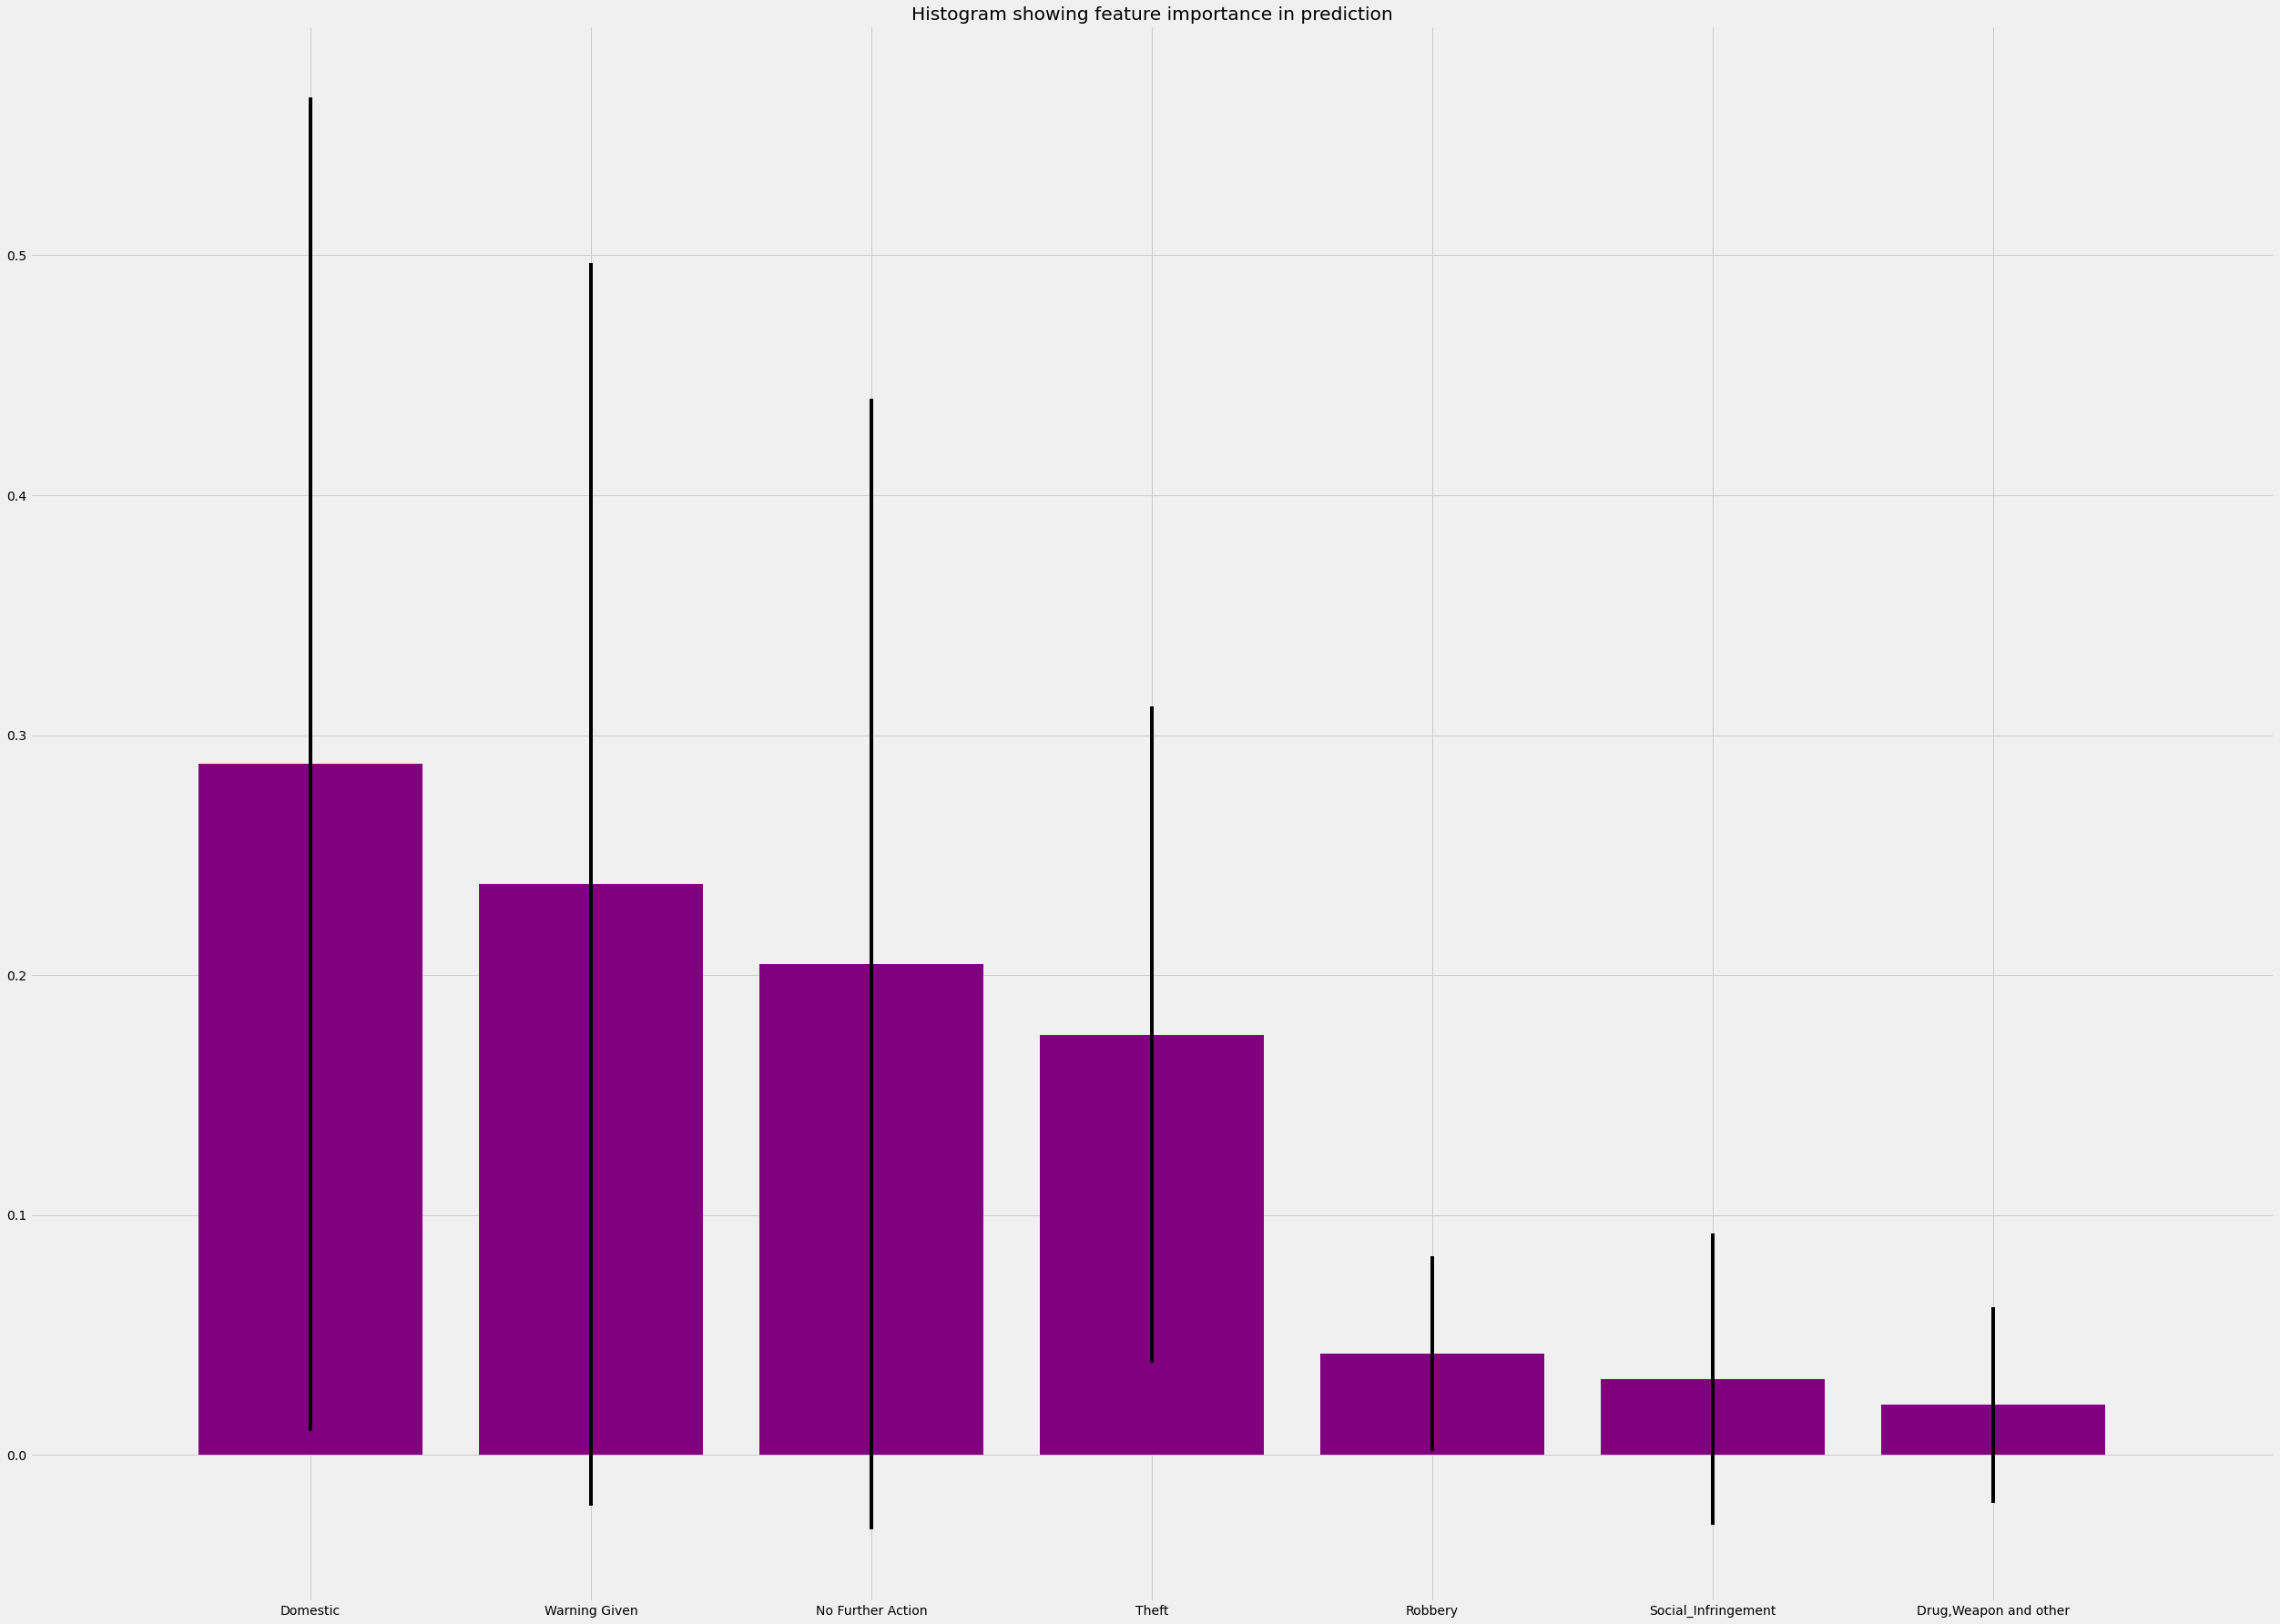

In [365]:
imp_features_crime = Mdl.feature_importances_

std = np.std([tree.feature_importances_ for tree in Mdl.estimators_],
             axis=0)

indices = np.argsort(imp_features_crime)[::-1]

features = X_pre_crime.columns[X_pre_crime.columns != 'Arrested']

print("Feature ranking:")

for f in range(X_pre_crime.shape[1]):
    print("\t%d. %s \t(%f)" % (f + 1, [features[f]], imp_features_crime[indices[f]]))
    

plt.figure()
plt.title("Histogram showing feature importance in prediction")
plt.bar(range(X_pre_crime.shape[1]),
        imp_features_crime[indices],
        color="purple",
        yerr=std[indices],
        align="center")
plt.xticks(range(X_pre_crime.shape[1]),features)
plt.xlim([-1, X_pre_crime.shape[1]])
plt.tight_layout()

#predictors[]

We find Domestic having the highest influence on predictions of Arrests outcome pre lockdown, this isn't a suprise as looking back at the correlation analysis we find this was the highest correlated however a negative correlation essentially they are polar opposite both 'NFA' and 'Warning Given' are mutually exclusive when comparing with Arrested both are optional outcomes depending on the crime itself

**Train Crime Dataset**

**Lets look at predictions**

In [366]:
#Prediction of both 
y_pre_crime_score = Mdl.predict(X_pre_crime) #Predict training set 

y_pre_crime_scorePB=Mdl.predict_proba(X_pre_crime) #Predict training set Probability


#y_preC_val_score = Mdl.predict(X_preC_val) #Predict validation set for comparison

#X_pre_crime, X_preC_val, y_pre_crime, y_preC_val

In [367]:
#Ref
y_pre_crime_scorePB=y_pre_crime_scorePB[:,1]#probabilities of the positive outcomes kept

#General prediction for ROC curve will make all predictions wrong
G_prob=[0 for _ in range(len(y_pre_crime))]


#X_pre_crime = df_crime_pre_num.drop(['Arrested'], axis=1)
#y_pre_crime = (df_crime_pre_num['Arrested']).astype(int)

Lets analyse how the model done predicting these two inputs

Lets first plot the ROC curve which is the receiver operating characteristic curve. This allows us to compare both True Positives and False Positive rates. plotting a graph where the area under the curve (AUC) the higher the accuracy of the random forest.

In [368]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_pre_crime,y_pre_crime_score))

Accuracy: 0.9948181263970738


In [369]:
confusion_matrix_Post_C = pd.crosstab(y_pre_crime, y_pre_crime_score,rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_Post_C


Predicted      0     1
Actual                
0          37351     0
1            204  1813

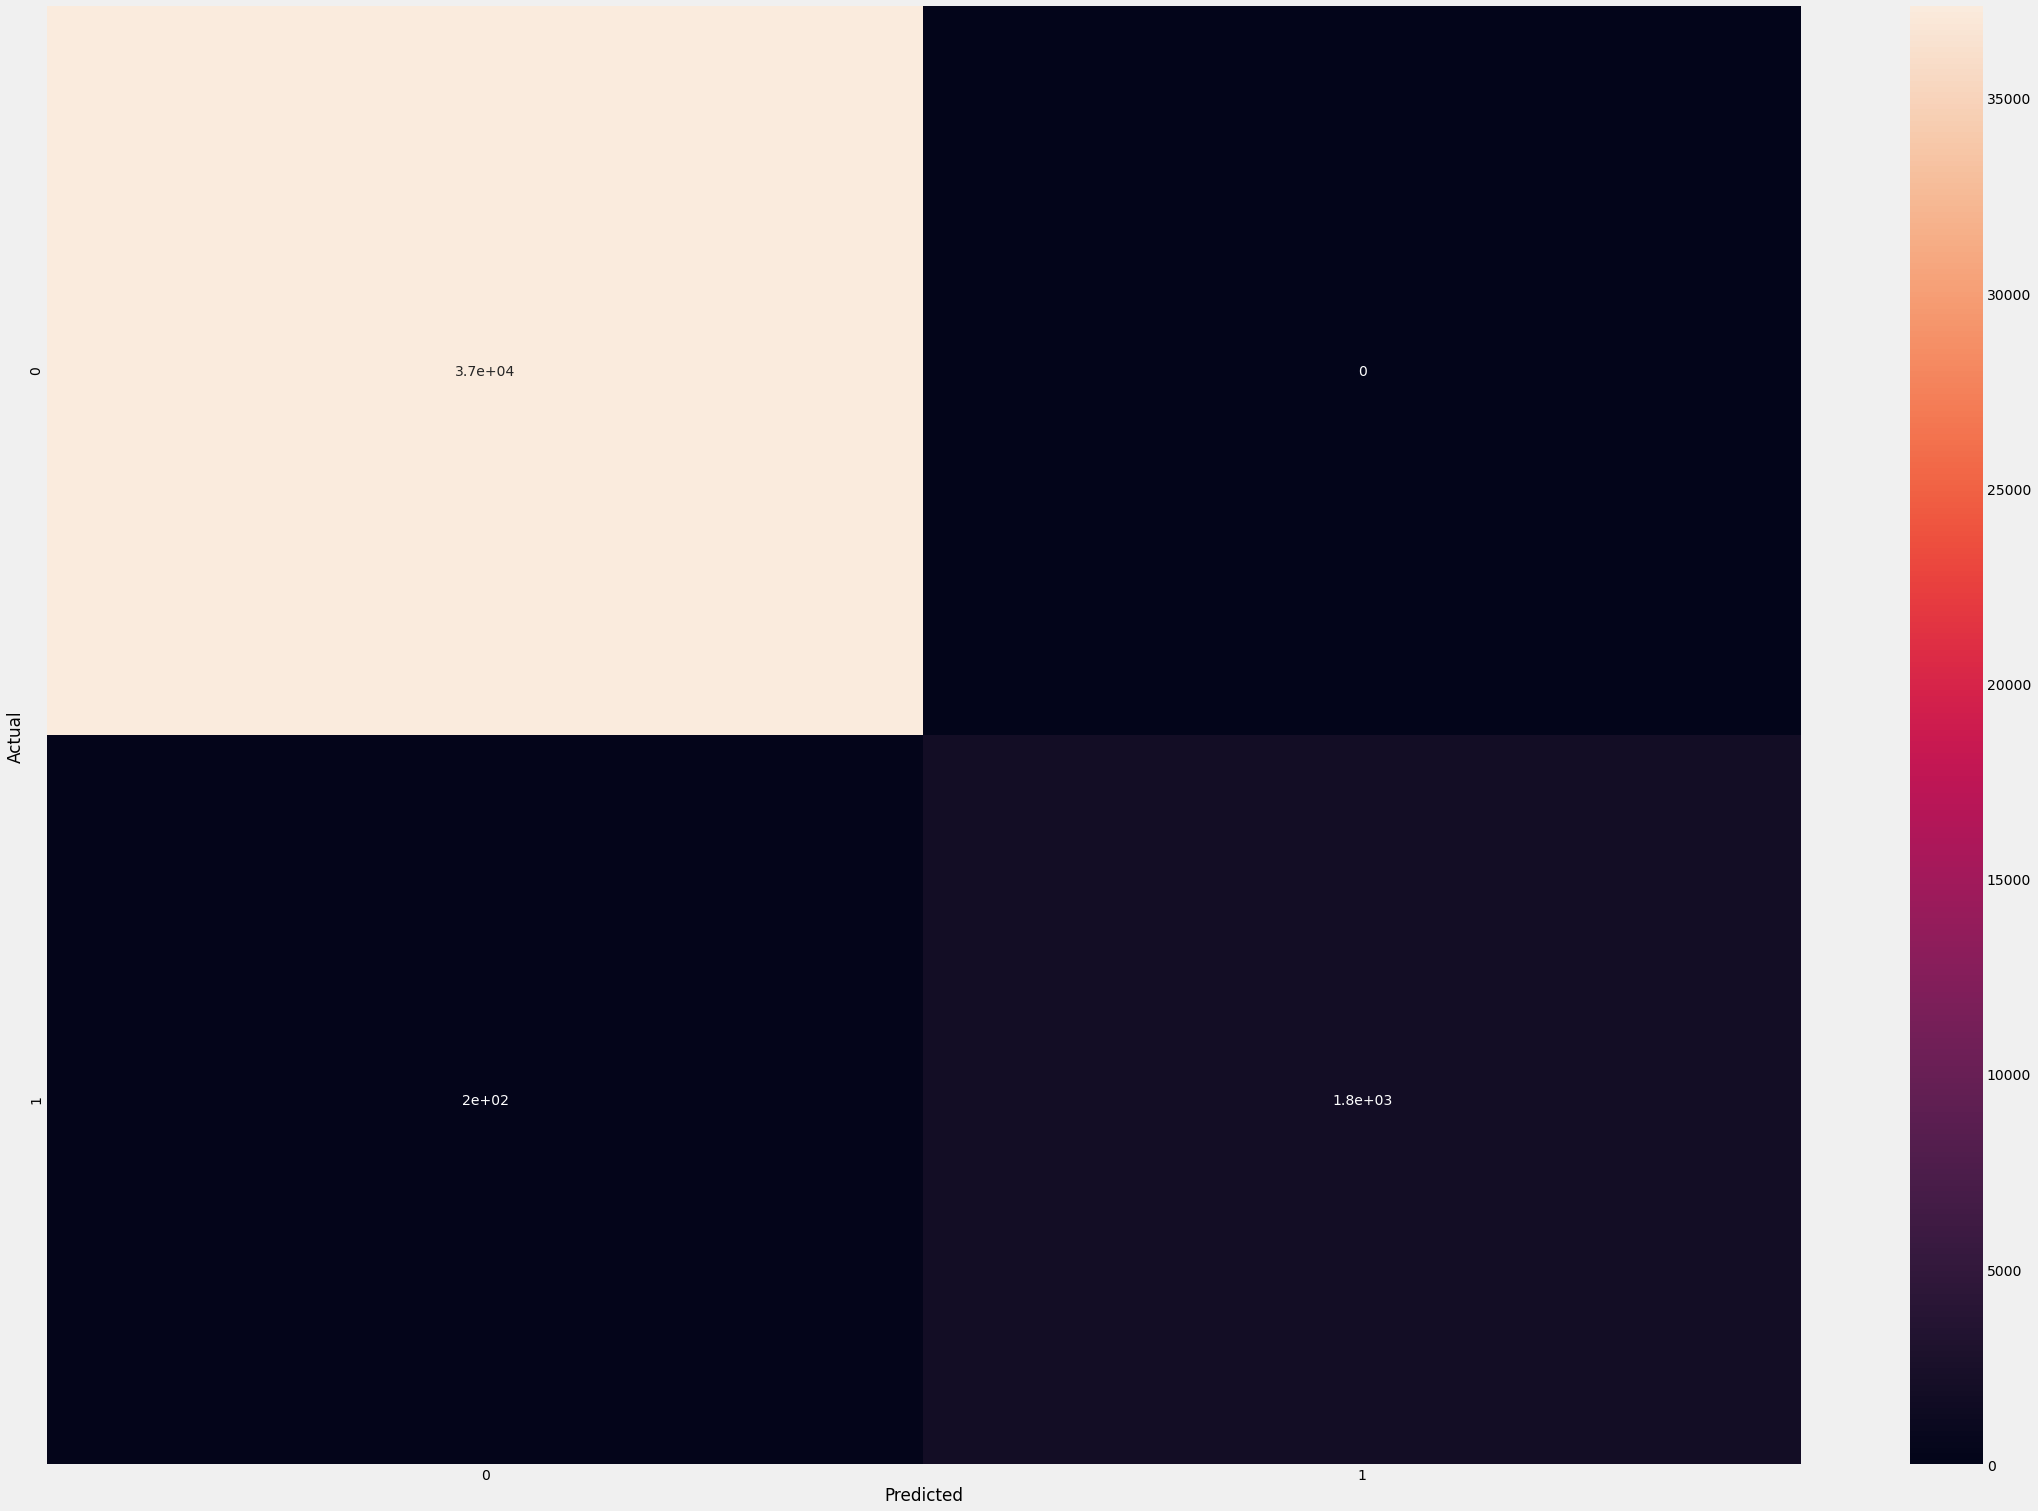

In [355]:
sns.heatmap(confusion_matrix, annot=True)

In [370]:
#Defining both general(Random Chance) prediction and Random Forest AUC calculation to show graphically
G_prob_auc=roc_auc_score(y_pre_crime,G_prob)
crime_train_auc=roc_auc_score(y_pre_crime,y_pre_crime_scorePB) 

In [371]:
print('Training crime dataset AUROC:=%.5f'%(crime_train_auc))
print('Genralised prediction AUROC:=%.5f'%(G_prob_auc))

Training crime dataset AUROC:=0.98677
Genralised prediction AUROC:=0.50000


In [372]:
#Calculating the AUROC
crime_train_fpr,crime_train_tpr,_=roc_curve(y_pre_crime,y_pre_crime_scorePB)
G_fpr,G_tpr,_=roc_curve(y_pre_crime,G_prob)

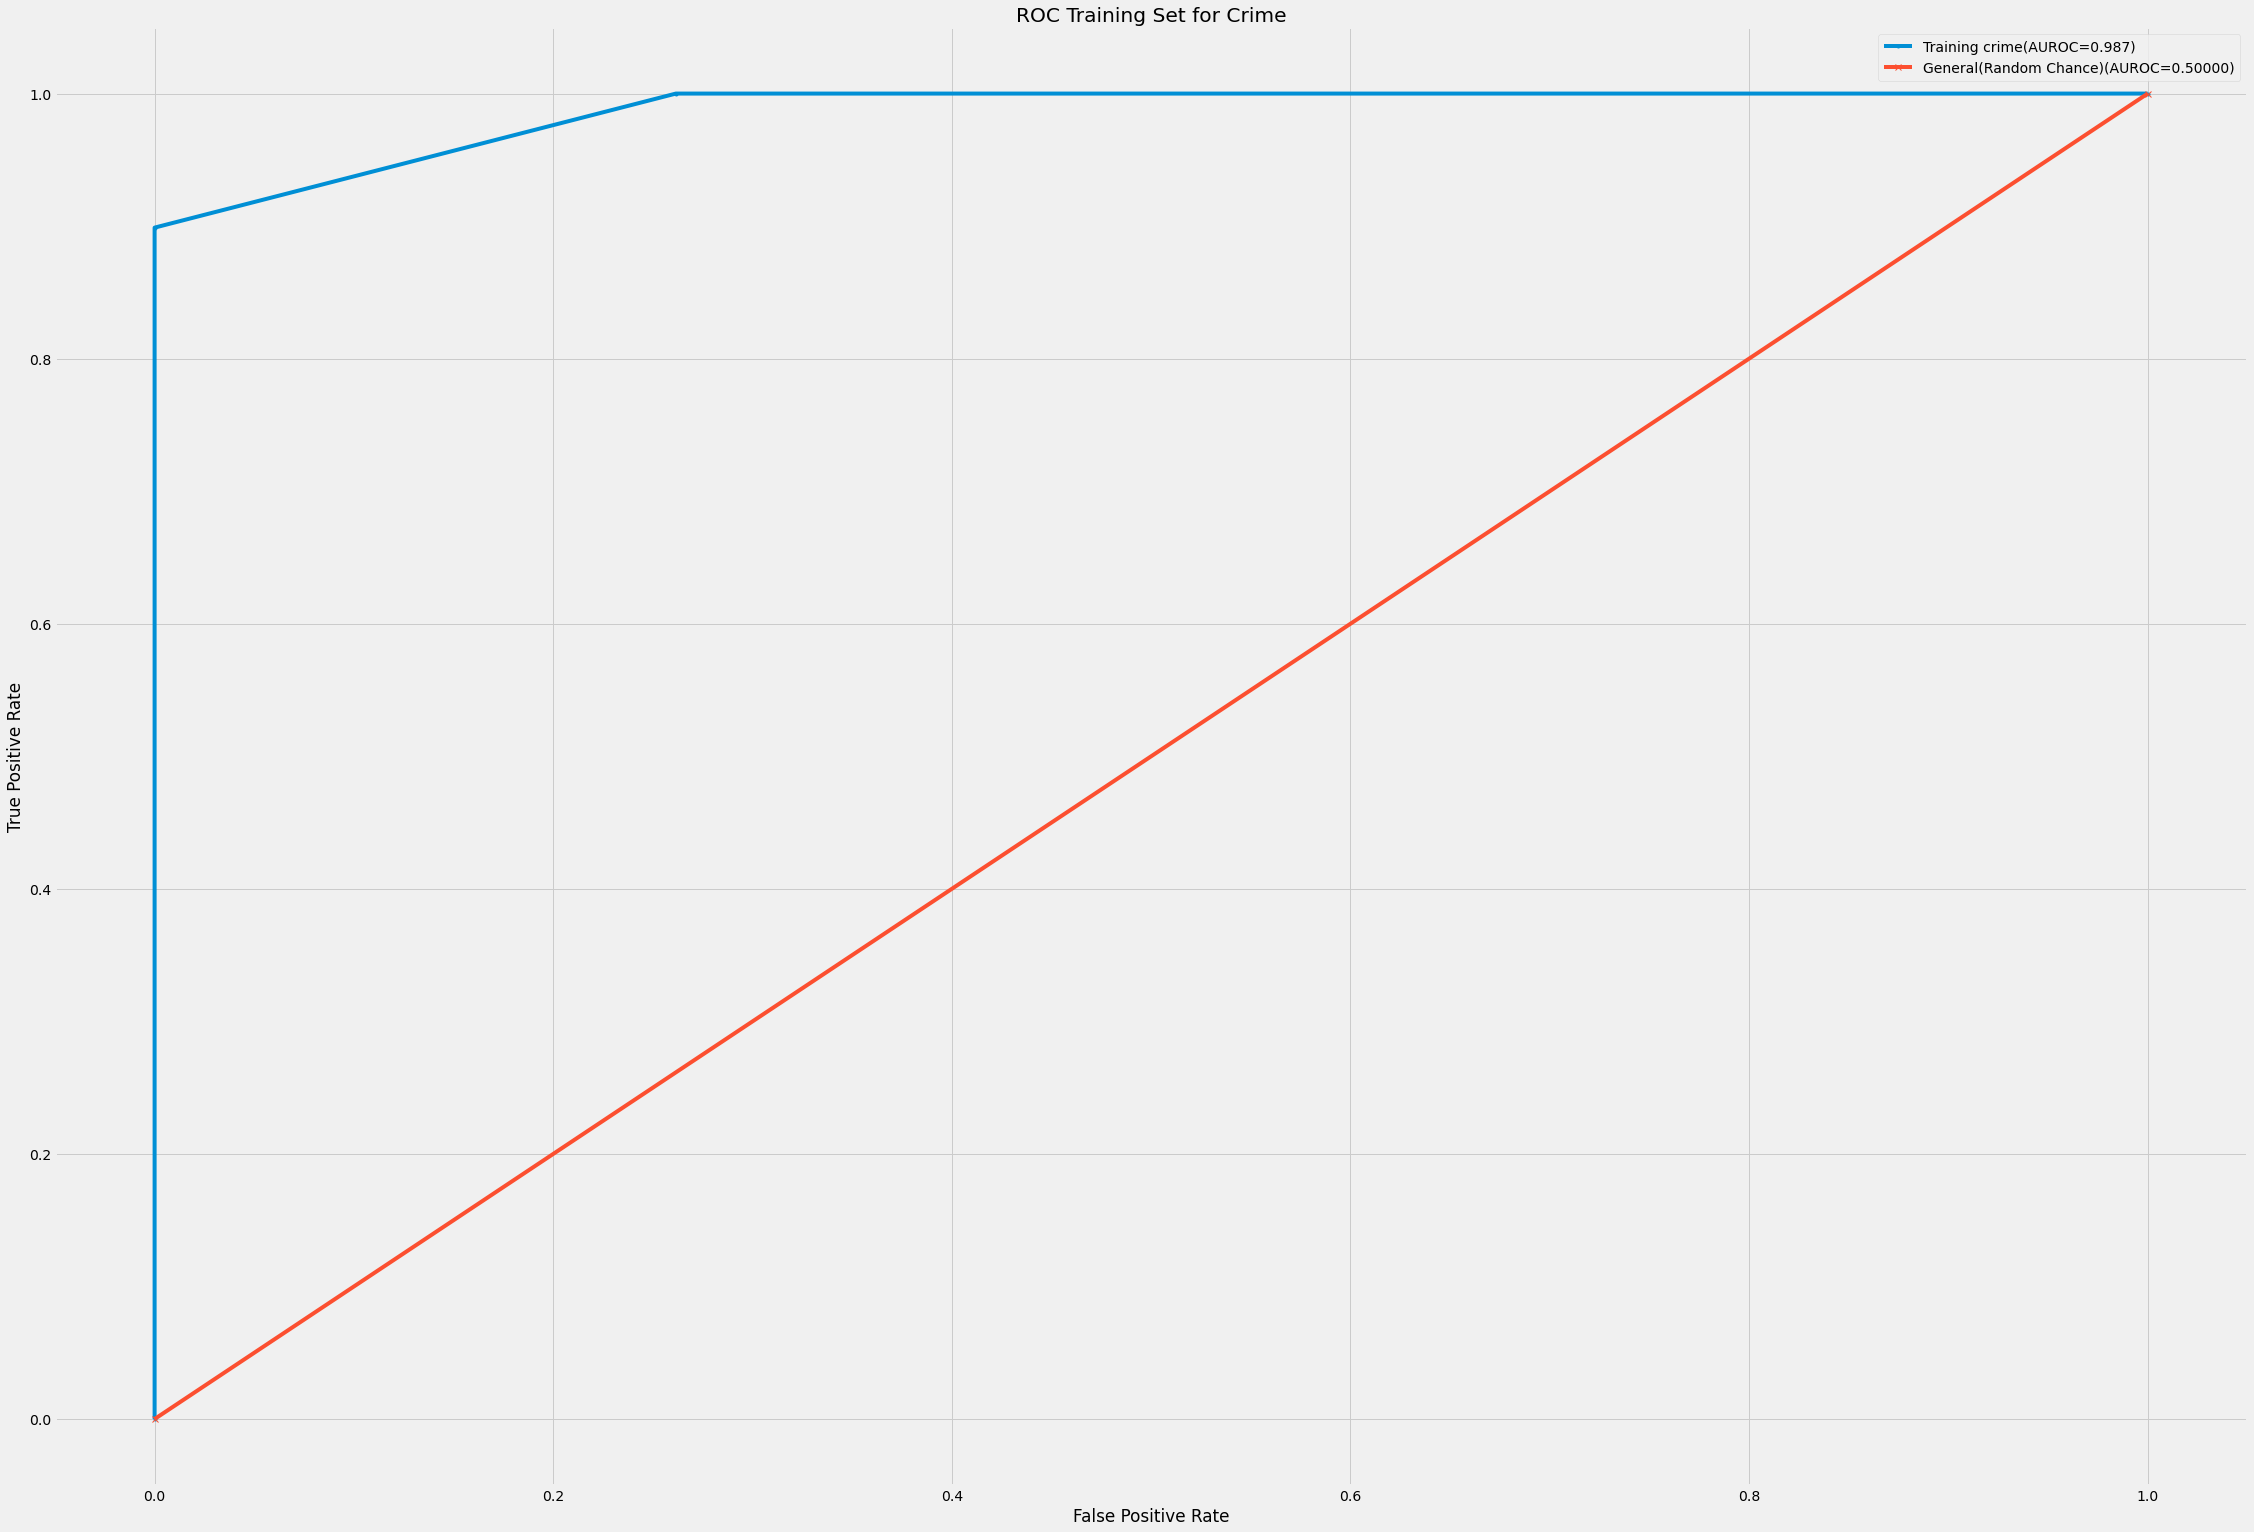

In [373]:
#Plotting AUROC scores
plt.plot(crime_train_fpr,crime_train_tpr,marker='.',label='Training crime(AUROC=%0.3f)'%crime_train_auc)
plt.plot(G_fpr,G_tpr,marker='x',label='General(Random Chance)(AUROC=%0.5f)'%G_prob_auc)

plt.title("ROC Training Set for Crime")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()


This is very interesting I'm excited to see if this will perform as well as 98.6% with the test set which I've held. Potentially the model maybe overfitted however I thought the rapid changes in arrests and crime over the lockdown periods may have caused some hiderance to the accuracy. I'm also eager to see how the stop and search data will be perform. 

**Test crime dataset**

In [374]:
y_post_crime_score = Mdl.predict(X_post_crime) #Predict Test set 

y_post_crime_scorePB=Mdl.predict_proba(X_post_crime)

G_Post=[0 for _ in range(len(y_post_crime))] #- generalised prediction at 0.5

In [375]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_post_crime,y_post_crime_score))

Accuracy: 0.9771867612293145


Performance at a slight drop which is ideal given the train data includes the lockdown period it was inevitable that a drop in accuracy was going to happen, trends during the lockdown were irratic hence it would have influenced our model therefore causing the drop in accuracy

In [377]:
confusion_matrix_test_C = pd.crosstab(y_post_crime, y_post_crime_score,rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test_C

Predicted      0     1
Actual                
0          12681     0
1            386  3853

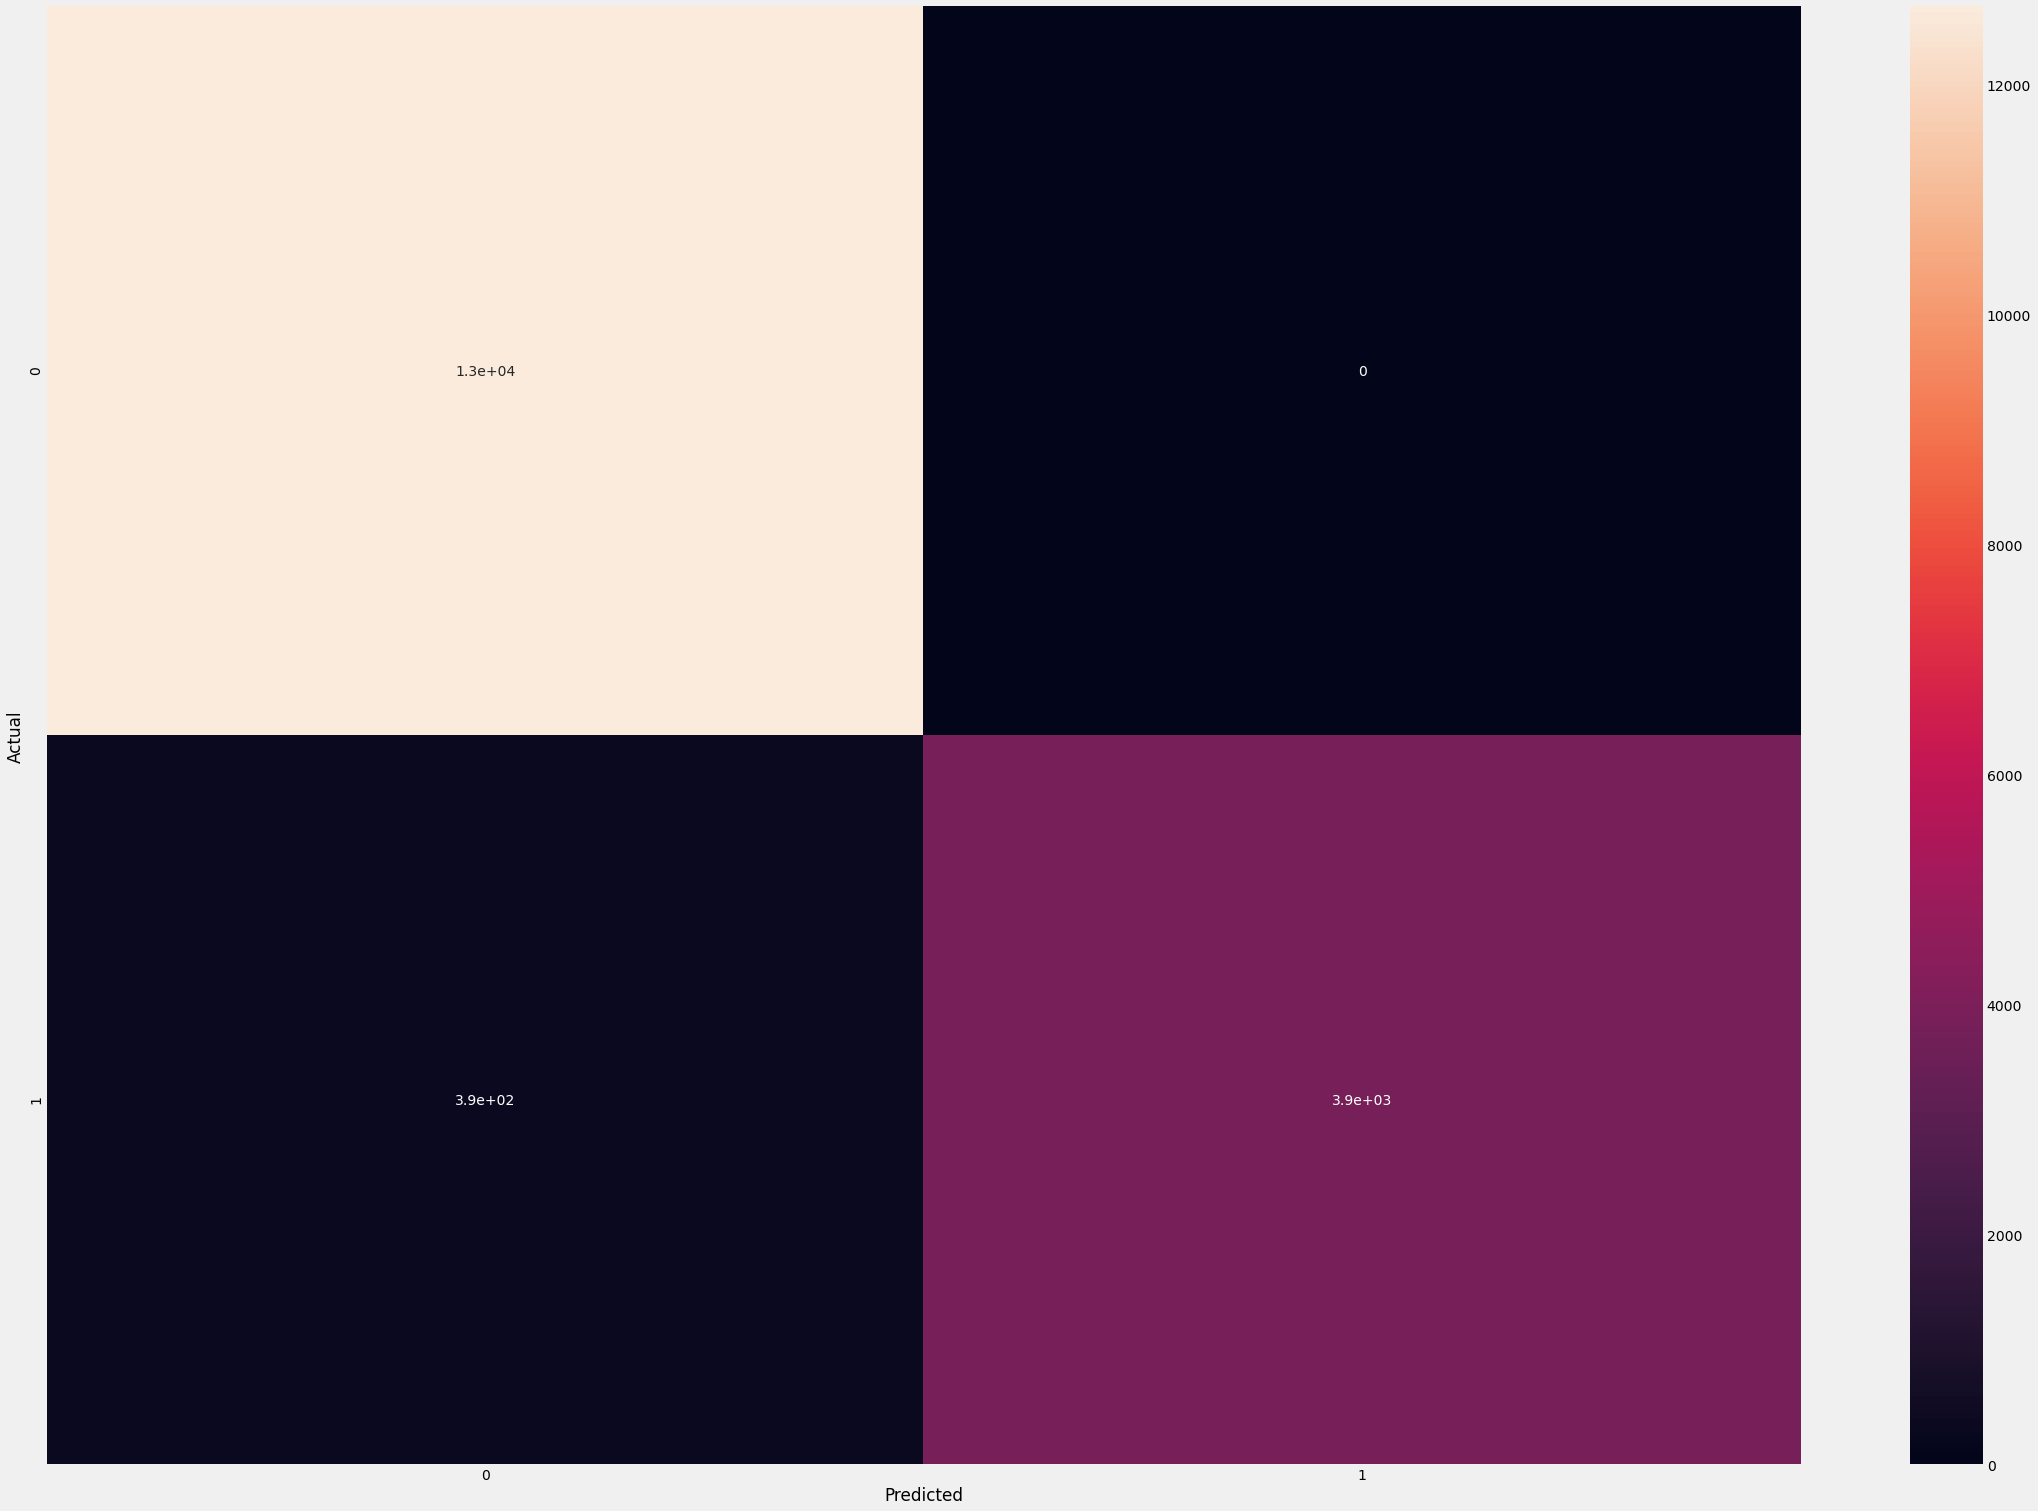

In [378]:
sns.heatmap(confusion_matrix_test_C, annot=True)

In [379]:
y_post_crime_scorePB=y_post_crime_scorePB[:,1]

In [380]:
#Defining both general(Random Chance) prediction and Random Forest AUC calculation to show graphically
G_Post_auc=roc_auc_score(y_post_crime,G_Post)
crime_test_auc=roc_auc_score(y_post_crime,y_post_crime_scorePB) 

In [381]:
print('Test crime dataset AUROC:=%.5f'%(crime_test_auc))
print('Genralised prediction AUROC:=%.5f'%(G_Post_auc))

Test crime dataset AUROC:=0.98285
Genralised prediction AUROC:=0.50000


In [382]:
#Calculating the AUROC
crime_test_fpr,crime_test_tpr,_=roc_curve(y_post_crime,y_post_crime_scorePB)
G_Post_fpr,G_Post_tpr,_=roc_curve(y_post_crime,G_Post)

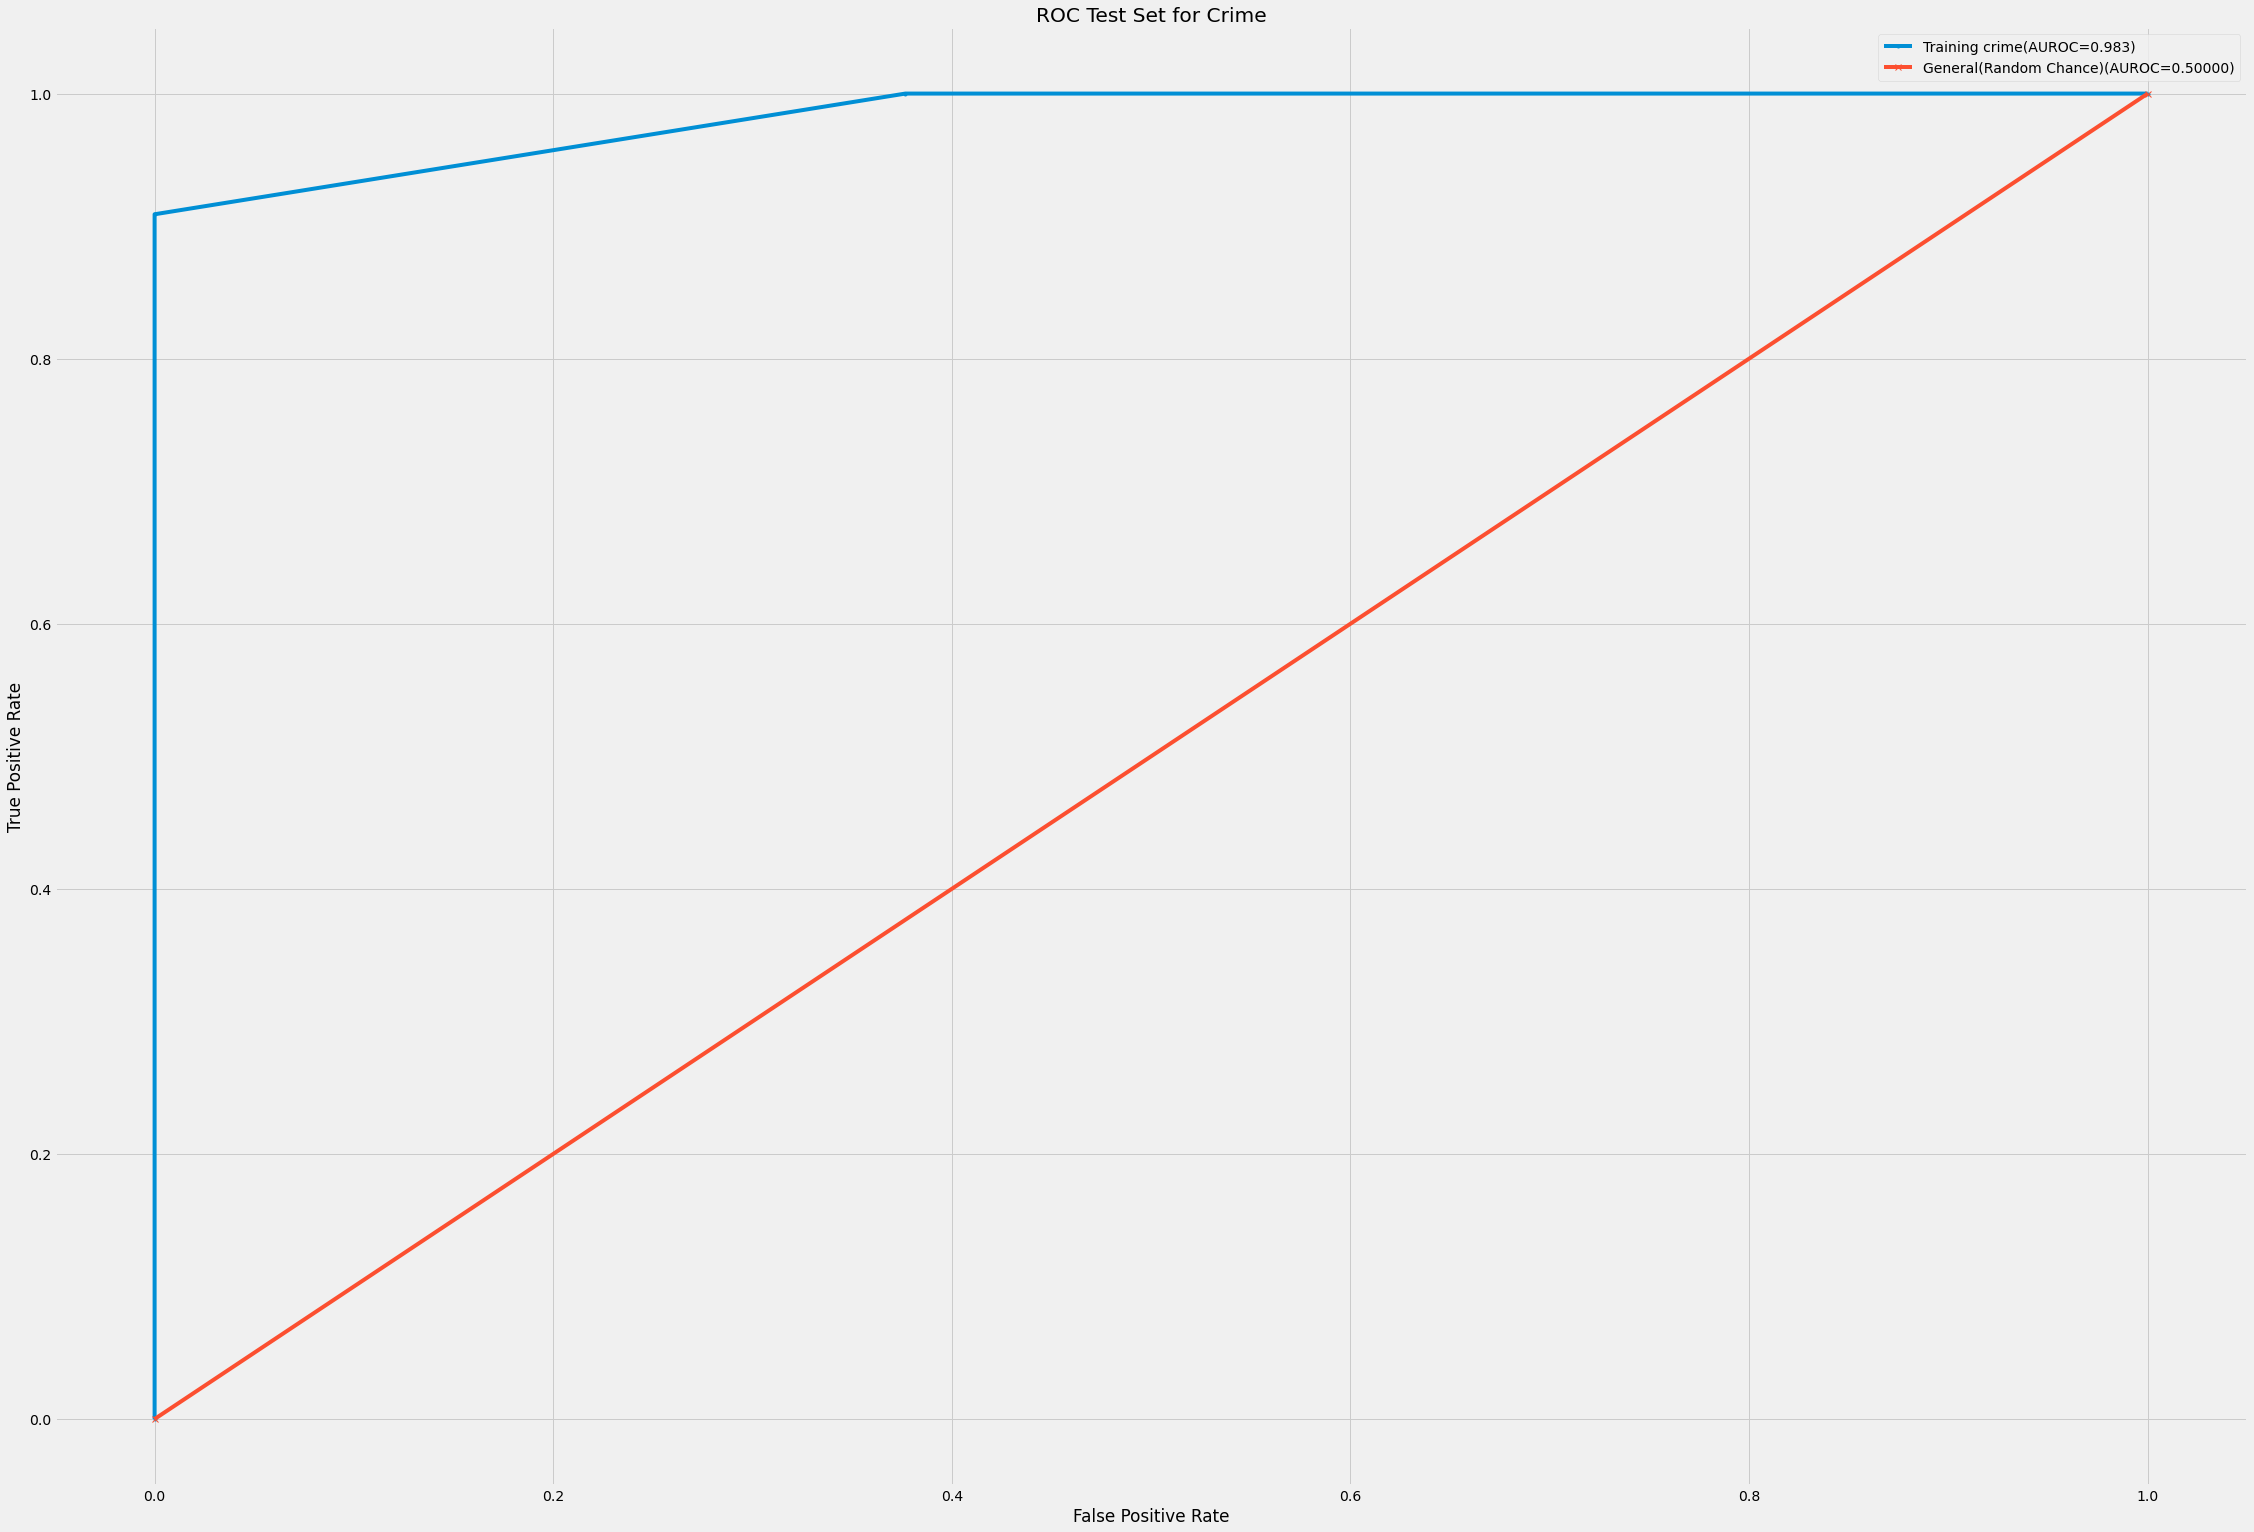

In [383]:
#Plotting AUROC scores
plt.plot(crime_test_fpr,crime_test_tpr,marker='.',label='Training crime(AUROC=%0.3f)'%crime_test_auc)
plt.plot(G_Post_fpr,G_Post_tpr,marker='x',label='General(Random Chance)(AUROC=%0.5f)'%G_Post_auc)

plt.title("ROC Test Set for Crime")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

As suspected, slight drop in accuracy suggests potential longterm changes in the structure to how crime is handled by the police; suggests the police may have been harsher.Over 400 cases which should have been given other outcomes were arrests which tells us the policing have become significantly harsher.

In [387]:
print(classification_report(y_post_crime, y_post_crime_score,
                            target_names=['negative class','positive class']))

                precision    recall  f1-score   support

negative class       0.97      1.00      0.99     12681
positive class       1.00      0.91      0.95      4239

      accuracy                           0.98     16920
     macro avg       0.99      0.95      0.97     16920
  weighted avg       0.98      0.98      0.98     16920



In [ ]:
Comment:

**Lets investigate stop and search data to see if this follows similar trends**

In [388]:
#PreLockdown Crime data split in Arribute and Label
X_pre_search = df_search_pre_num.drop(['Arrested'], axis=1)
y_pre_search = (df_search_pre_num['Arrested']).astype(int)

print('Dimensions of feature matrix X_pre_search: ', X_pre_search.shape)
print('Dimensions of target vector y_pre_search:  ', y_pre_search.shape)




#PostLockdown Crime data split in Arribute and Label
X_post_search = df_search_post_num.drop(['Arrested'], axis=1)
y_post_search = (df_search_post_num['Arrested']).astype(int)

print('Dimensions of feature matrix X_post_search: ', X_post_search.shape)
print('Dimensions of target vector y_post_search:  ', y_post_search.shape)

Dimensions of feature matrix X_pre_search:  (1623, 30)
Dimensions of target vector y_pre_search:   (1623,)
Dimensions of feature matrix X_post_search:  (973, 30)
Dimensions of target vector y_post_search:   (973,)


In [390]:
#Establish the RF for the Search Dataframe
Mdl1 = RandomForestClassifier(n_estimators=49, # We have 10 predictors hence we will begin with 10^2 estimators in the to begin with prior hyperparameters
                             max_depth=None,
                             max_leaf_nodes=None,
                             bootstrap=True)

In [391]:
#We apply the model on the pre dataset of Stop and Search to be able to analyse the accuracy of both the training and classification set
MdlS = Mdl1.fit(X_pre_search, y_pre_search)

In [392]:
print("Accuracy on training set:   {:.9f}".format(MdlS.score(X_pre_search, y_pre_search)))
#print("Accuracy on validation set: {:.f}".format(Mdl.score(X_preC_val, y_preC_val)))

Accuracy on training set:   0.998151571


Woah! interestingly the accuracy of 99.8% suggests a perfect estimation on the stop and search data lets check the data just to make sure no errors have been in splitting the data

In [266]:
print(y_pre_search)

0       0
1       0
2       1
3       0
4       1
6       0
7       1
9       0
10      1
11      0
13      0
16      0
17      0
18      1
19      0
22      0
25      1
27      1
28      1
29      1
30      0
31      0
32      0
33      0
34      1
35      0
36      0
37      0
38      0
39      0
40      0
41      0
43      0
45      0
46      0
47      0
48      0
49      0
51      0
52      0
53      0
54      0
55      1
56      0
57      0
58      0
60      0
61      0
62      1
64      0
65      0
67      0
68      0
69      0
70      0
71      1
73      0
75      1
76      0
78      0
79      0
80      0
81      0
82      1
86      1
87      0
89      0
90      0
91      0
94      1
95      0
96      0
97      0
98      0
100     0
101     1
102     0
103     0
105     0
108     0
109     1
110     0
111     0
114     0
115     1
116     0
120     0
122     0
124     0
125     0
127     0
128     1
129     1
130     0
132     0
137     1
138     1
139     1
140     0
141     0


In [395]:
X_pre_search.head()

Outcome linked to object of search  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   Removal of more than just outer clothing  Age:under 10  Age:10-17  \
0                                       0.0           0.0        0.0   
1                                       0.0           0.0        0.0   
2                                       0.0           0.0        1.0   
3                                       0.0           0.0        0.0   
4                                       0.0           0.0        0.0   

   Age:18-24  Age:25-34  over 34  Male  Female  \
0        1.0        0.0      0.0   1.0     0.0   
1        0.0        1.0      0.0   1.0     0.0   
2        0.0        0.0      0.0   1.0     0.0   
3        0.0        0.0      1.0   1.0     0.0   
4        1.0        0.0      0.0   1.0     0.0   

   Police defined black ethnicity  Police defined white ethnicity  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             1.0   
4                             0.0                             0.0   

   Police defined asian ethnicity  Police defined other ethnicity  \
0                             1.0                             0.0   
1                             1.0                             0.0   
2                             1.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   All categories of black ethnicity  All categories of white ethnicity  \
0                                0.0                                0.0   
1                                0.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                0.0                                0.0   

   All categories of asian ethnicity  All categories of mixed ethnicity  \
0                                1.0                                0.0   
1                                1.0                                0.0   
2                                0.0                                0.0   
3                                0.0                                0.0   
4                                1.0                                0.0   

   All other categories of ethnicity  NFA  Controlled Drugs Warning  \
0                                0.0  1.0                       0.0   
1                                0.0  1.0                       0.0   
2                                0.0  0.0                       0.0   
3                                0.0  1.0                       0.0   
4                                0.0  0.0                       0.0   

   Penalty_Notice/Caution  Summoned  Local_resolution  Drug Offence  \
0                     0.0       0.0               0.0           1.0   
1                     0.0       0.0               0.0           1.0   
2                     0.0       0.0               0.0           1.0   
3                     0.0       0.0               0.0           0.0   
4                     0.0       0.0               0.0           1.0   

   Robbery Offence  Theft  Weapon Offences  Previous Evidence of Offences  \
0              0.0    0.0              0.0                            0.0   
1              0.0    0.0              0.0                            0.0   
2              0.0    0.0              0.0                            0.0   
3              1.0    0.0              0.0                            0.0   
4              0.0    0.0              0.0         

Ok, data seems to be fine; lets continue and see how the data performs

Feature ranking:
	1. ['Outcome linked to object of search'] 	(0.781809)
	2. ['Removal of more than just outer clothing'] 	(0.097824)
	3. ['Age:under 10'] 	(0.015782)
	4. ['Age:10-17'] 	(0.015262)
	5. ['Age:18-24'] 	(0.012049)
	6. ['Age:25-34'] 	(0.007174)
	7. ['over 34'] 	(0.006277)
	8. ['Male'] 	(0.005972)
	9. ['Female'] 	(0.005390)
	10. ['Police defined black ethnicity'] 	(0.004938)
	11. ['Police defined white ethnicity'] 	(0.004933)
	12. ['Police defined asian ethnicity'] 	(0.004422)
	13. ['Police defined other ethnicity'] 	(0.004308)
	14. ['All categories of black ethnicity'] 	(0.003950)
	15. ['All categories of white ethnicity'] 	(0.003740)
	16. ['All categories of asian ethnicity'] 	(0.003115)
	17. ['All categories of mixed ethnicity'] 	(0.003085)
	18. ['All other categories of ethnicity'] 	(0.002884)
	19. ['NFA'] 	(0.002869)
	20. ['Controlled Drugs Warning'] 	(0.002715)
	21. ['Penalty_Notice/Caution'] 	(0.002247)
	22. ['Summoned'] 	(0.002212)
	23. ['Local_resolution'] 	(0.002168

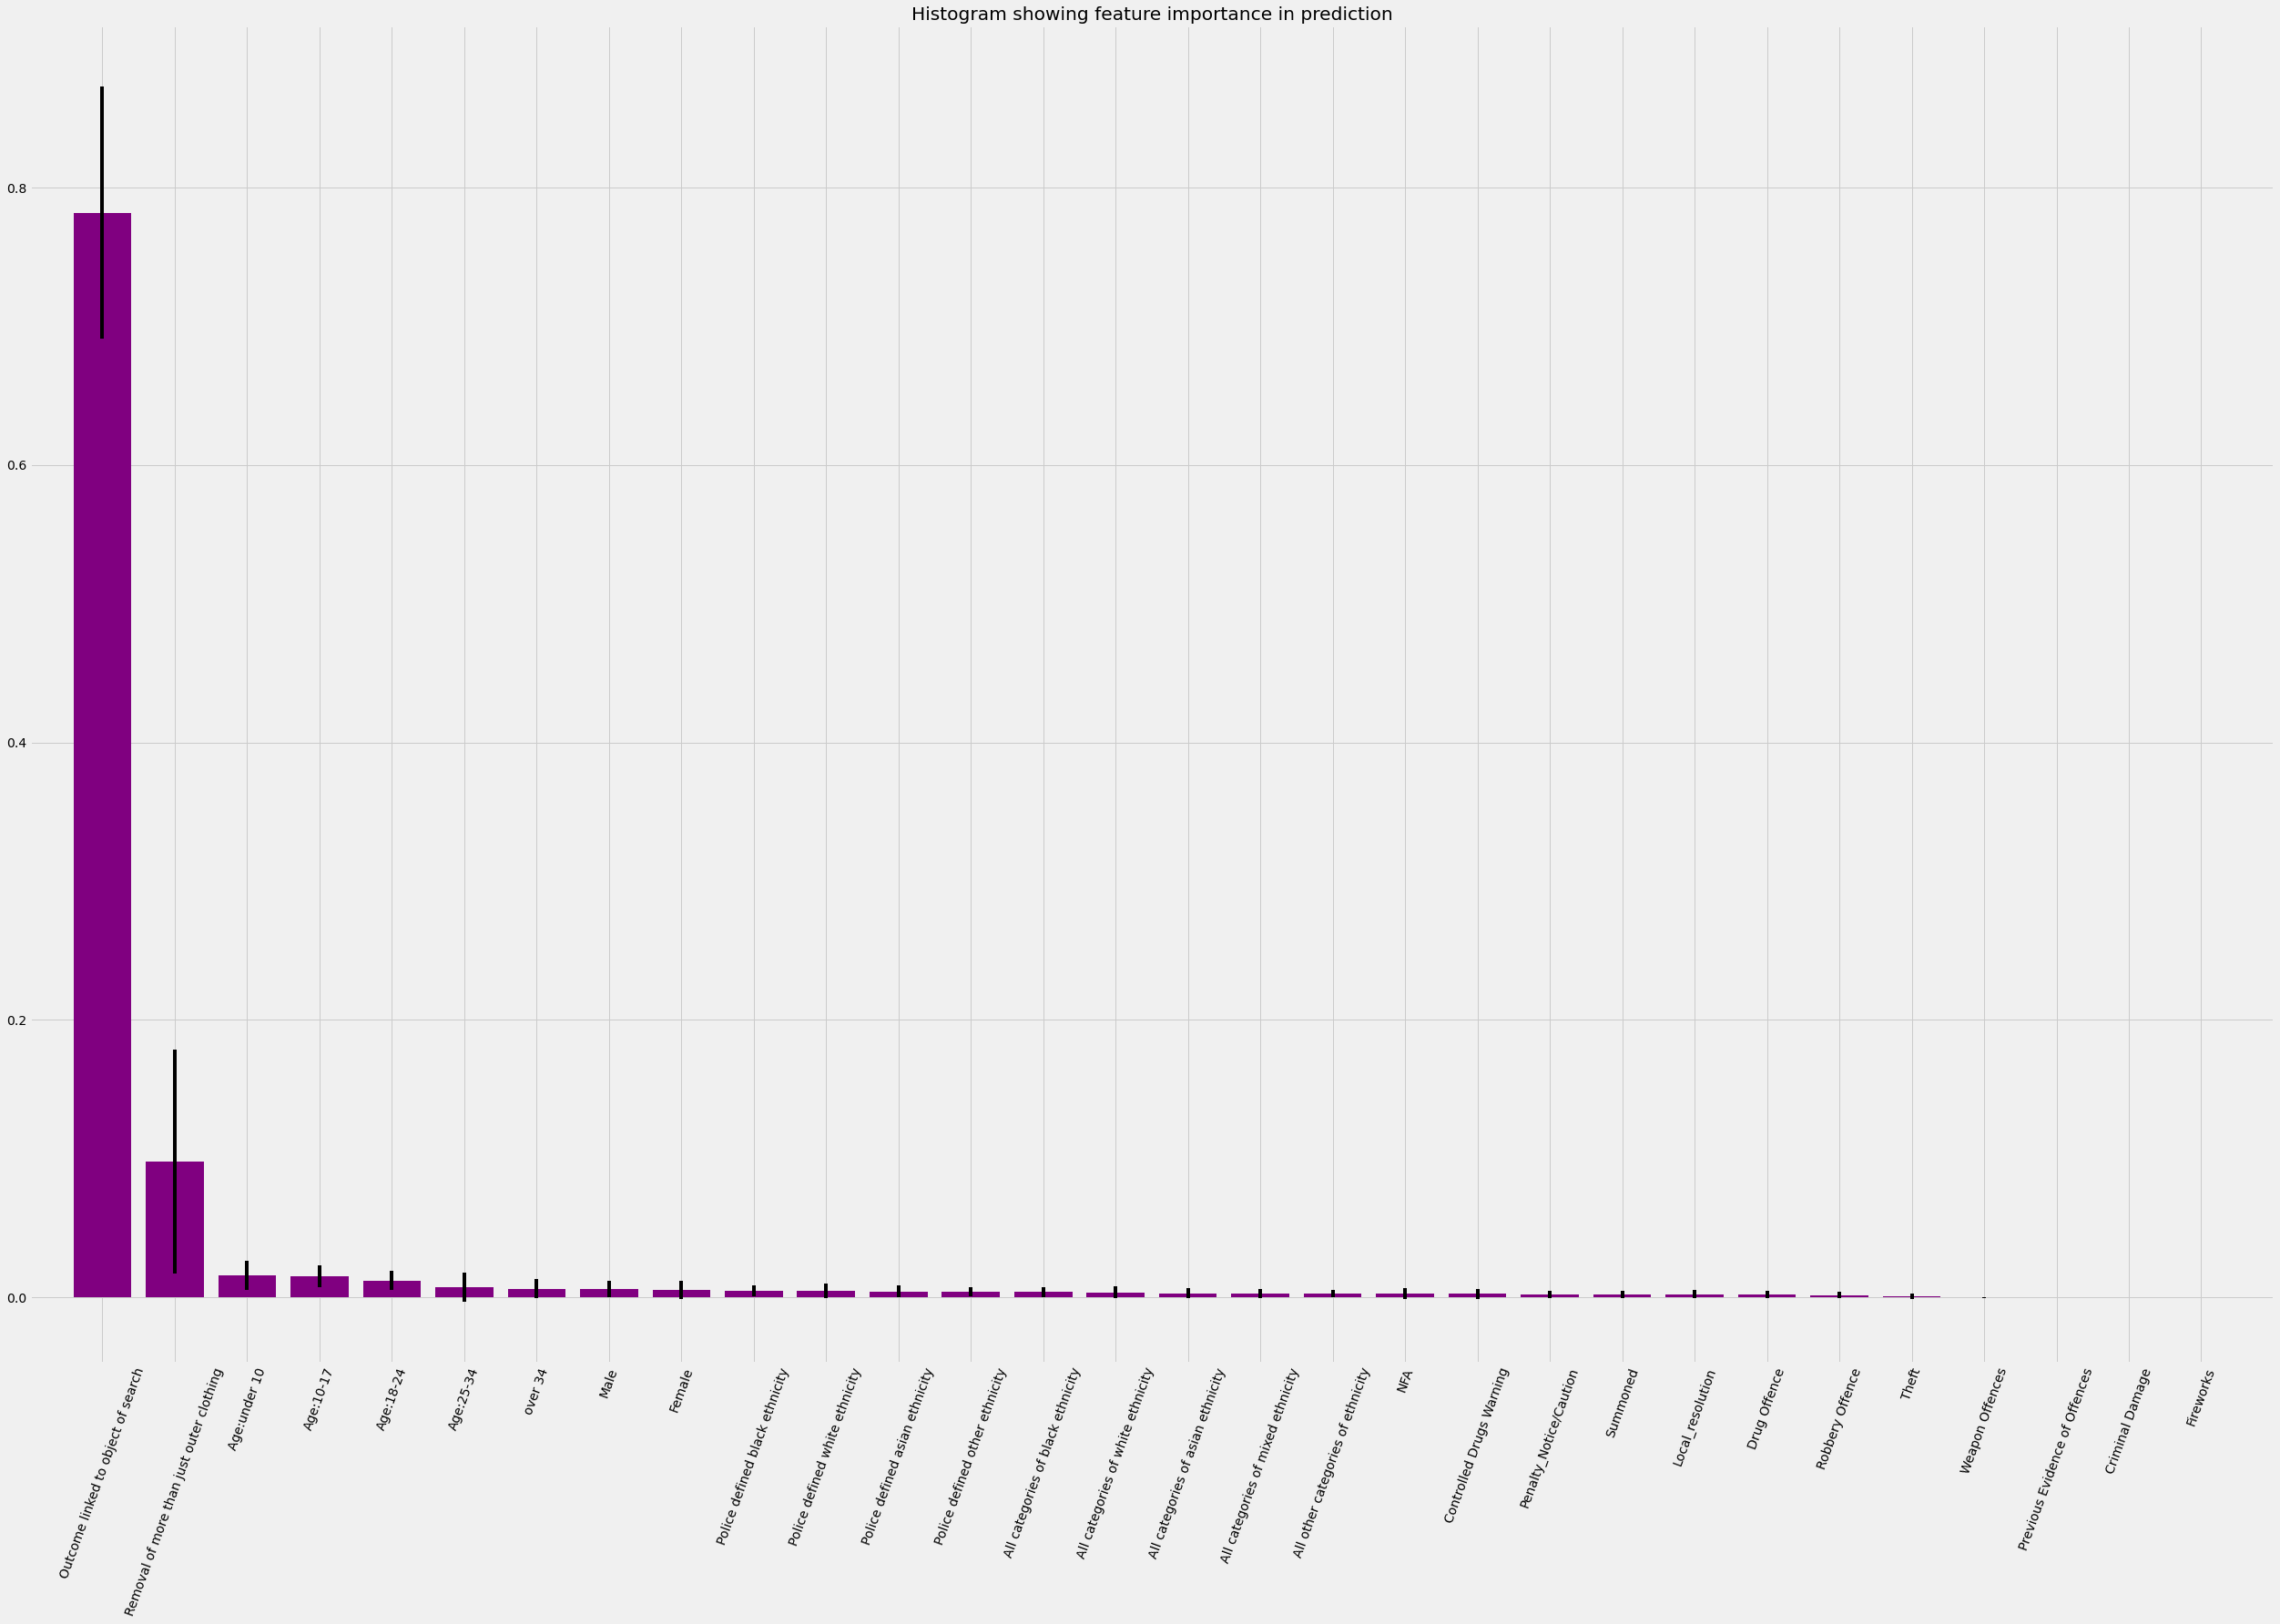

In [403]:
imp_features_search = MdlS.feature_importances_

std = np.std([tree.feature_importances_ for tree in MdlS.estimators_],
             axis=0)

indices = np.argsort(imp_features_search)[::-1]

features = X_pre_search.columns[X_pre_search.columns != 'Arrested']

print("Feature ranking:")

for f in range(X_pre_search.shape[1]):
    print("\t%d. %s \t(%f)" % (f + 1, [features[f]], imp_features_search[indices[f]]))
    

plt.figure()
plt.title("Histogram showing feature importance in prediction")
plt.bar(range(X_pre_search.shape[1]),
        imp_features_search[indices],
        color="purple",
        yerr=std[indices],
        align="center")
plt.xticks(range(X_pre_search.shape[1]),features, rotation=70)
plt.xlim([-1, X_pre_search.shape[1]])
plt.tight_layout()



In [404]:
#Prediction of both 
y_pre_search_score = MdlS.predict(X_pre_search) #Predict training set 

y_pre_search_scorePB=MdlS.predict_proba(X_pre_search) #Predict training set Probability


G_Pre_search =[0 for _ in range(len(y_pre_search))] #- generalised prediction at 0.5
#y_preC_val_score = Mdl.predict(X_preC_val) #Predict validation set for comparison

#X_pre_crime, X_preC_val, y_pre_crime, y_preC_val



In [405]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_pre_search,y_pre_search_score))

Accuracy: 0.9981515711645101


In [406]:
confusion_matrix_train_search = pd.crosstab(y_pre_search, y_pre_search_score,rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_train_search

Predicted     0    1
Actual              
0          1306    3
1             0  314

3 Errors in prediction; compared to the previous data the Stop and Search data uses 24 predictors

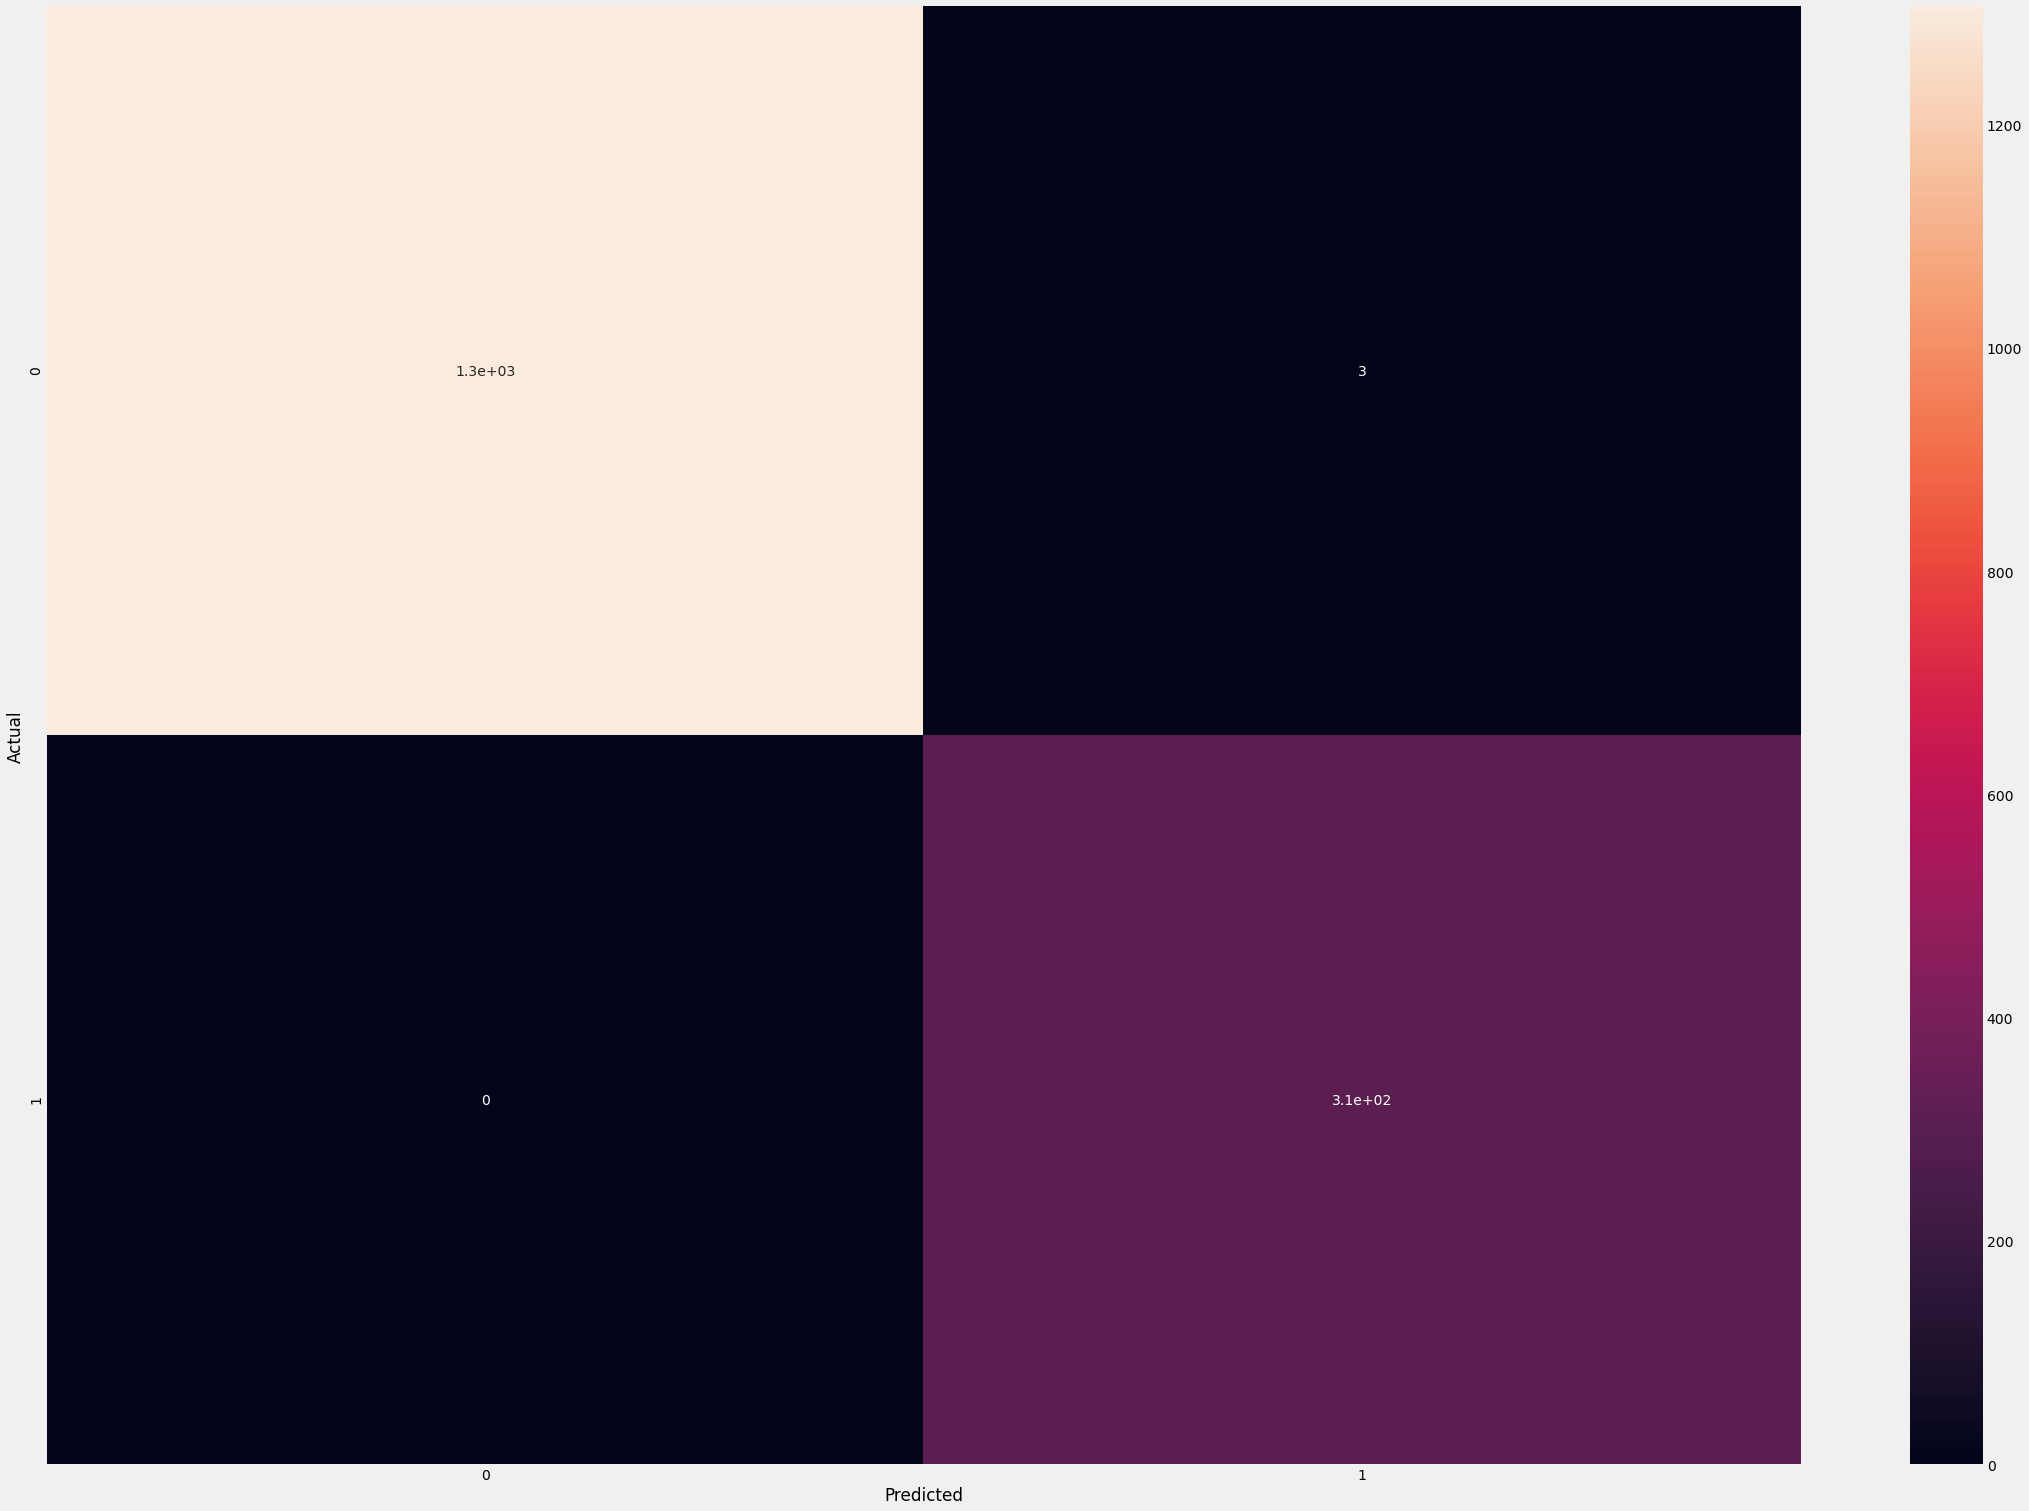

In [407]:
sns.heatmap(confusion_matrix_train_search, annot=True)

In [408]:
y_pre_search_scorePB=y_pre_search_scorePB[:,1]

In [409]:
#Defining both general(Random Chance) prediction and Random Forest AUC calculation to show graphically
G_pre_auc=roc_auc_score(y_pre_search,G_Pre_search)
search_train_auc=roc_auc_score(y_pre_search,y_pre_search_scorePB) 

In [410]:
print('Test crime dataset AUROC:=%.5f'%(search_train_auc))
print('Genralised prediction AUROC:=%.5f'%(G_Post_auc))

Test crime dataset AUROC:=0.99989
Genralised prediction AUROC:=0.50000


In [411]:
#Prediction of both 
y_post_search_score = MdlS.predict(X_post_search) #Predict test set 

y_post_search_scorePB=MdlS.predict_proba(X_post_search) #Predict test set Probability


G_post_search =[0 for _ in range(len(y_post_search))] #- generalised prediction at 0.5
#y_preC_val_score = Mdl.predict(X_preC_val) #Predict validation set for comparison



In [412]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_post_search,y_post_search_score))

Accuracy: 0.986639260020555


As suspected slight dip in accuracy also suggest arrests my have got harsher for similar or same crime potentially leaving a lasting impact on policing due to covid; 

In [413]:
confusion_matrix_test_search = pd.crosstab(y_post_search, y_post_search_score,rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_test_search

Predicted    0    1
Actual             
0          773   13
1            0  187

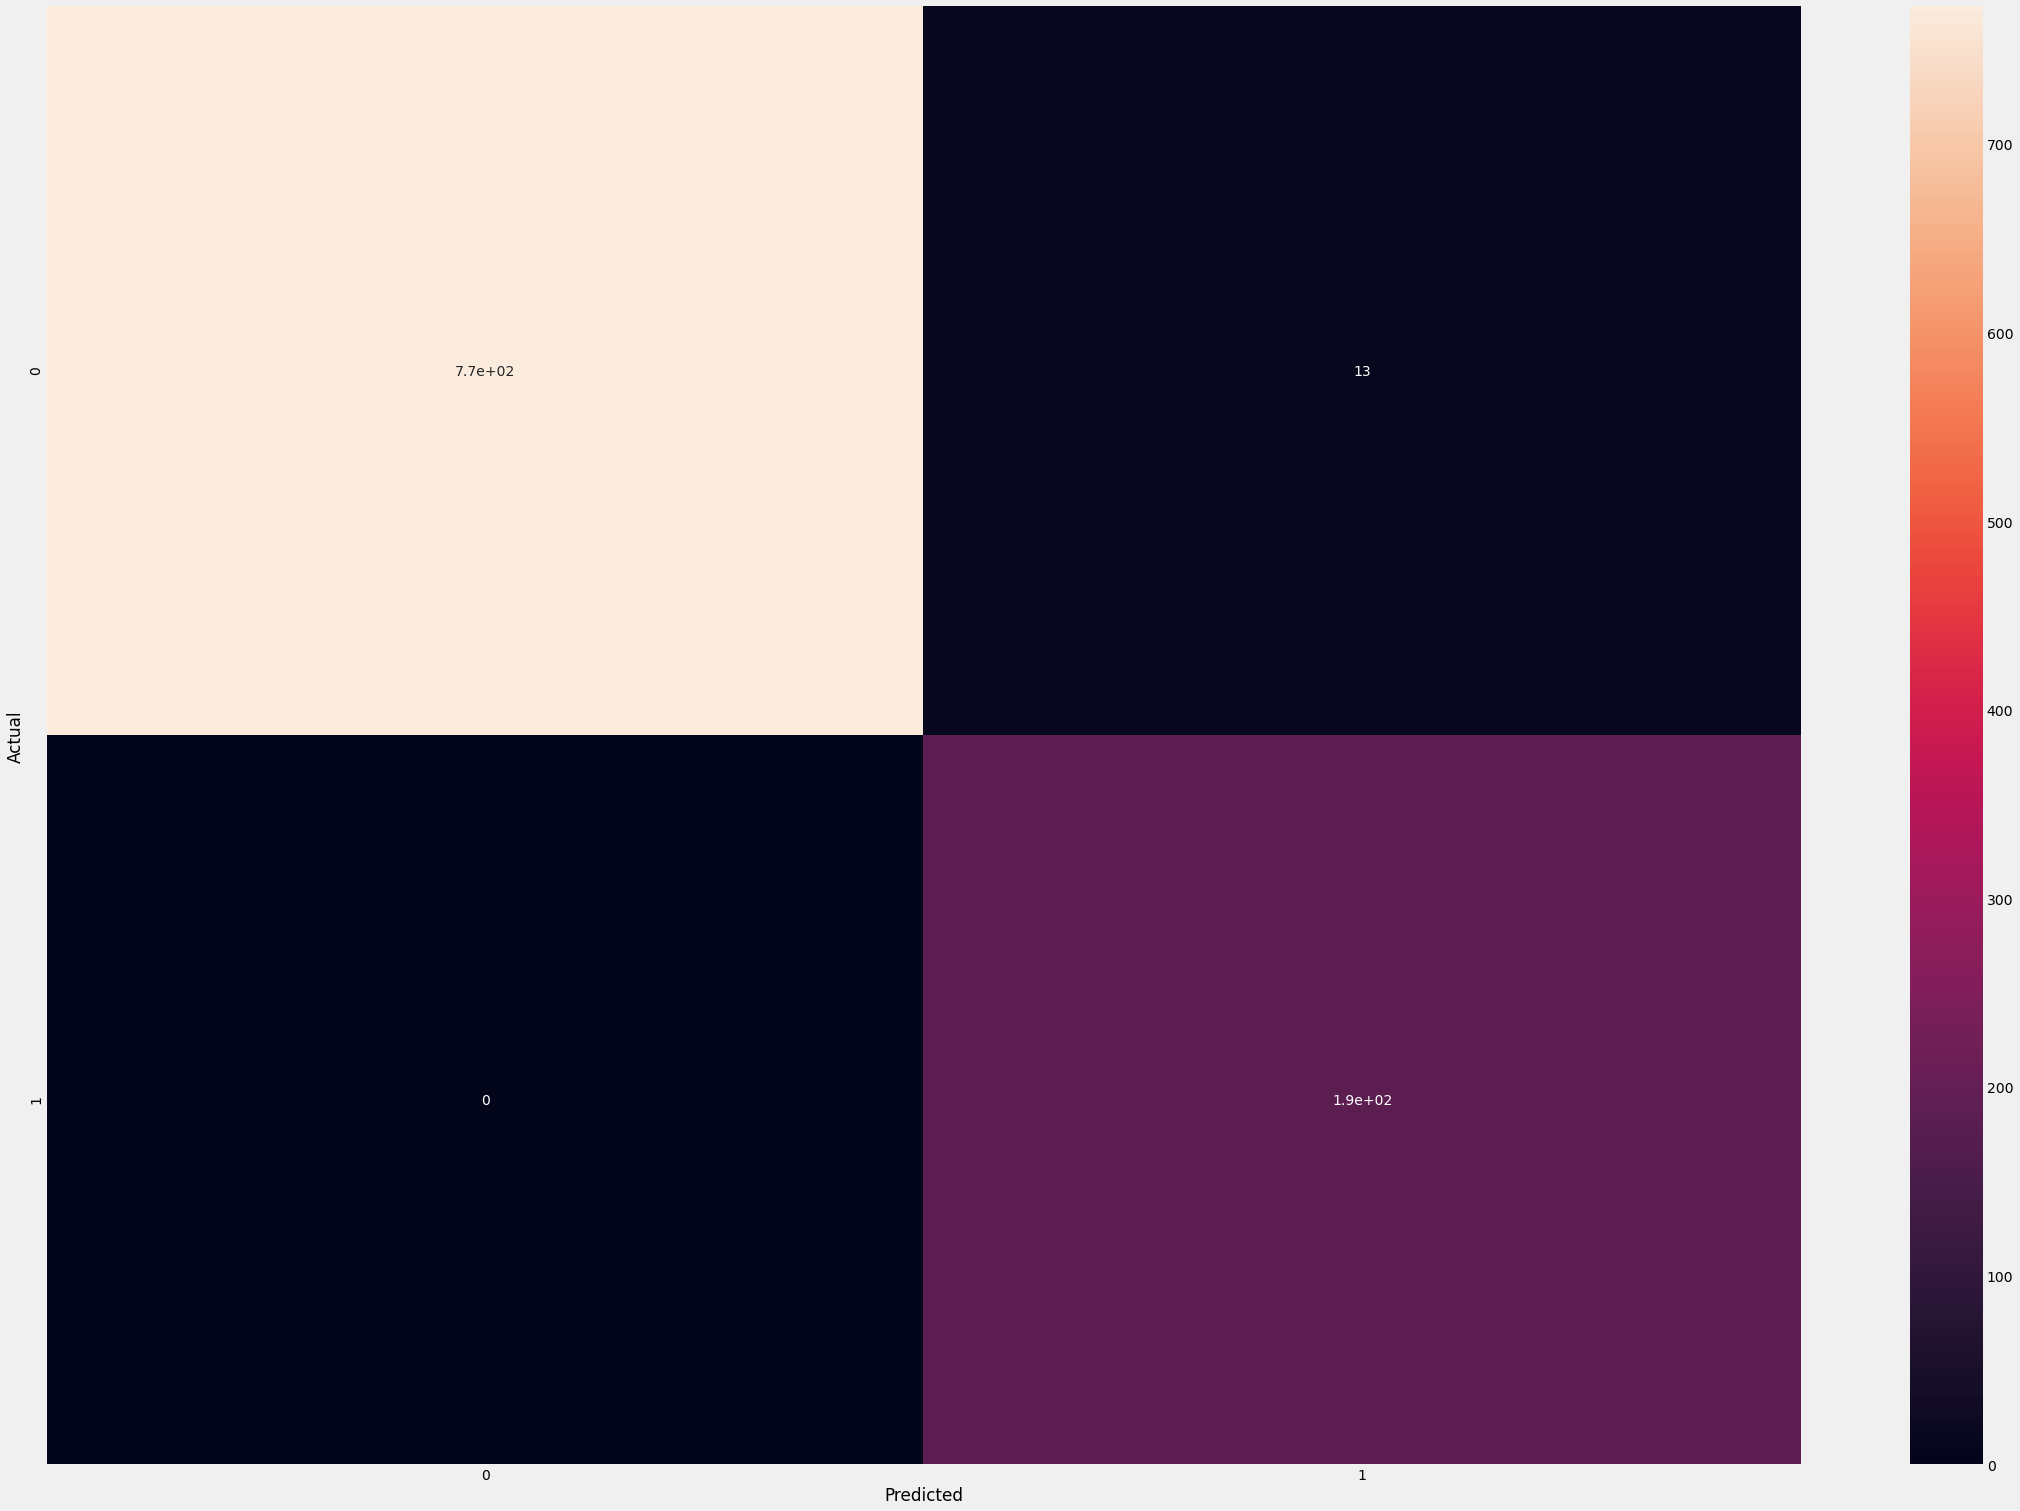

In [414]:
sns.heatmap(confusion_matrix_test_search,annot=True)

In [415]:
y_post_search_scorePB=y_post_search_scorePB[:,1]

In [416]:
#Defining both general(Random Chance) prediction and Random Forest AUC calculation to show graphically
G_Post_auc=roc_auc_score(y_post_search,G_post_search)
search_test_auc=roc_auc_score(y_post_search,y_post_search_scorePB) 

In [417]:
print('Test search dataset AUROC:=%.5f'%(search_test_auc))
print('Genralised prediction AUROC:=%.5f'%(G_Post_auc))

Test search dataset AUROC:=0.99619
Genralised prediction AUROC:=0.50000


In [418]:
#Calculating the AUROC
search_test_fpr,search_test_tpr,_=roc_curve(y_post_search,y_post_search_scorePB)
G_post_fpr,G_post_tpr,_=roc_curve(y_post_search,G_post_search)

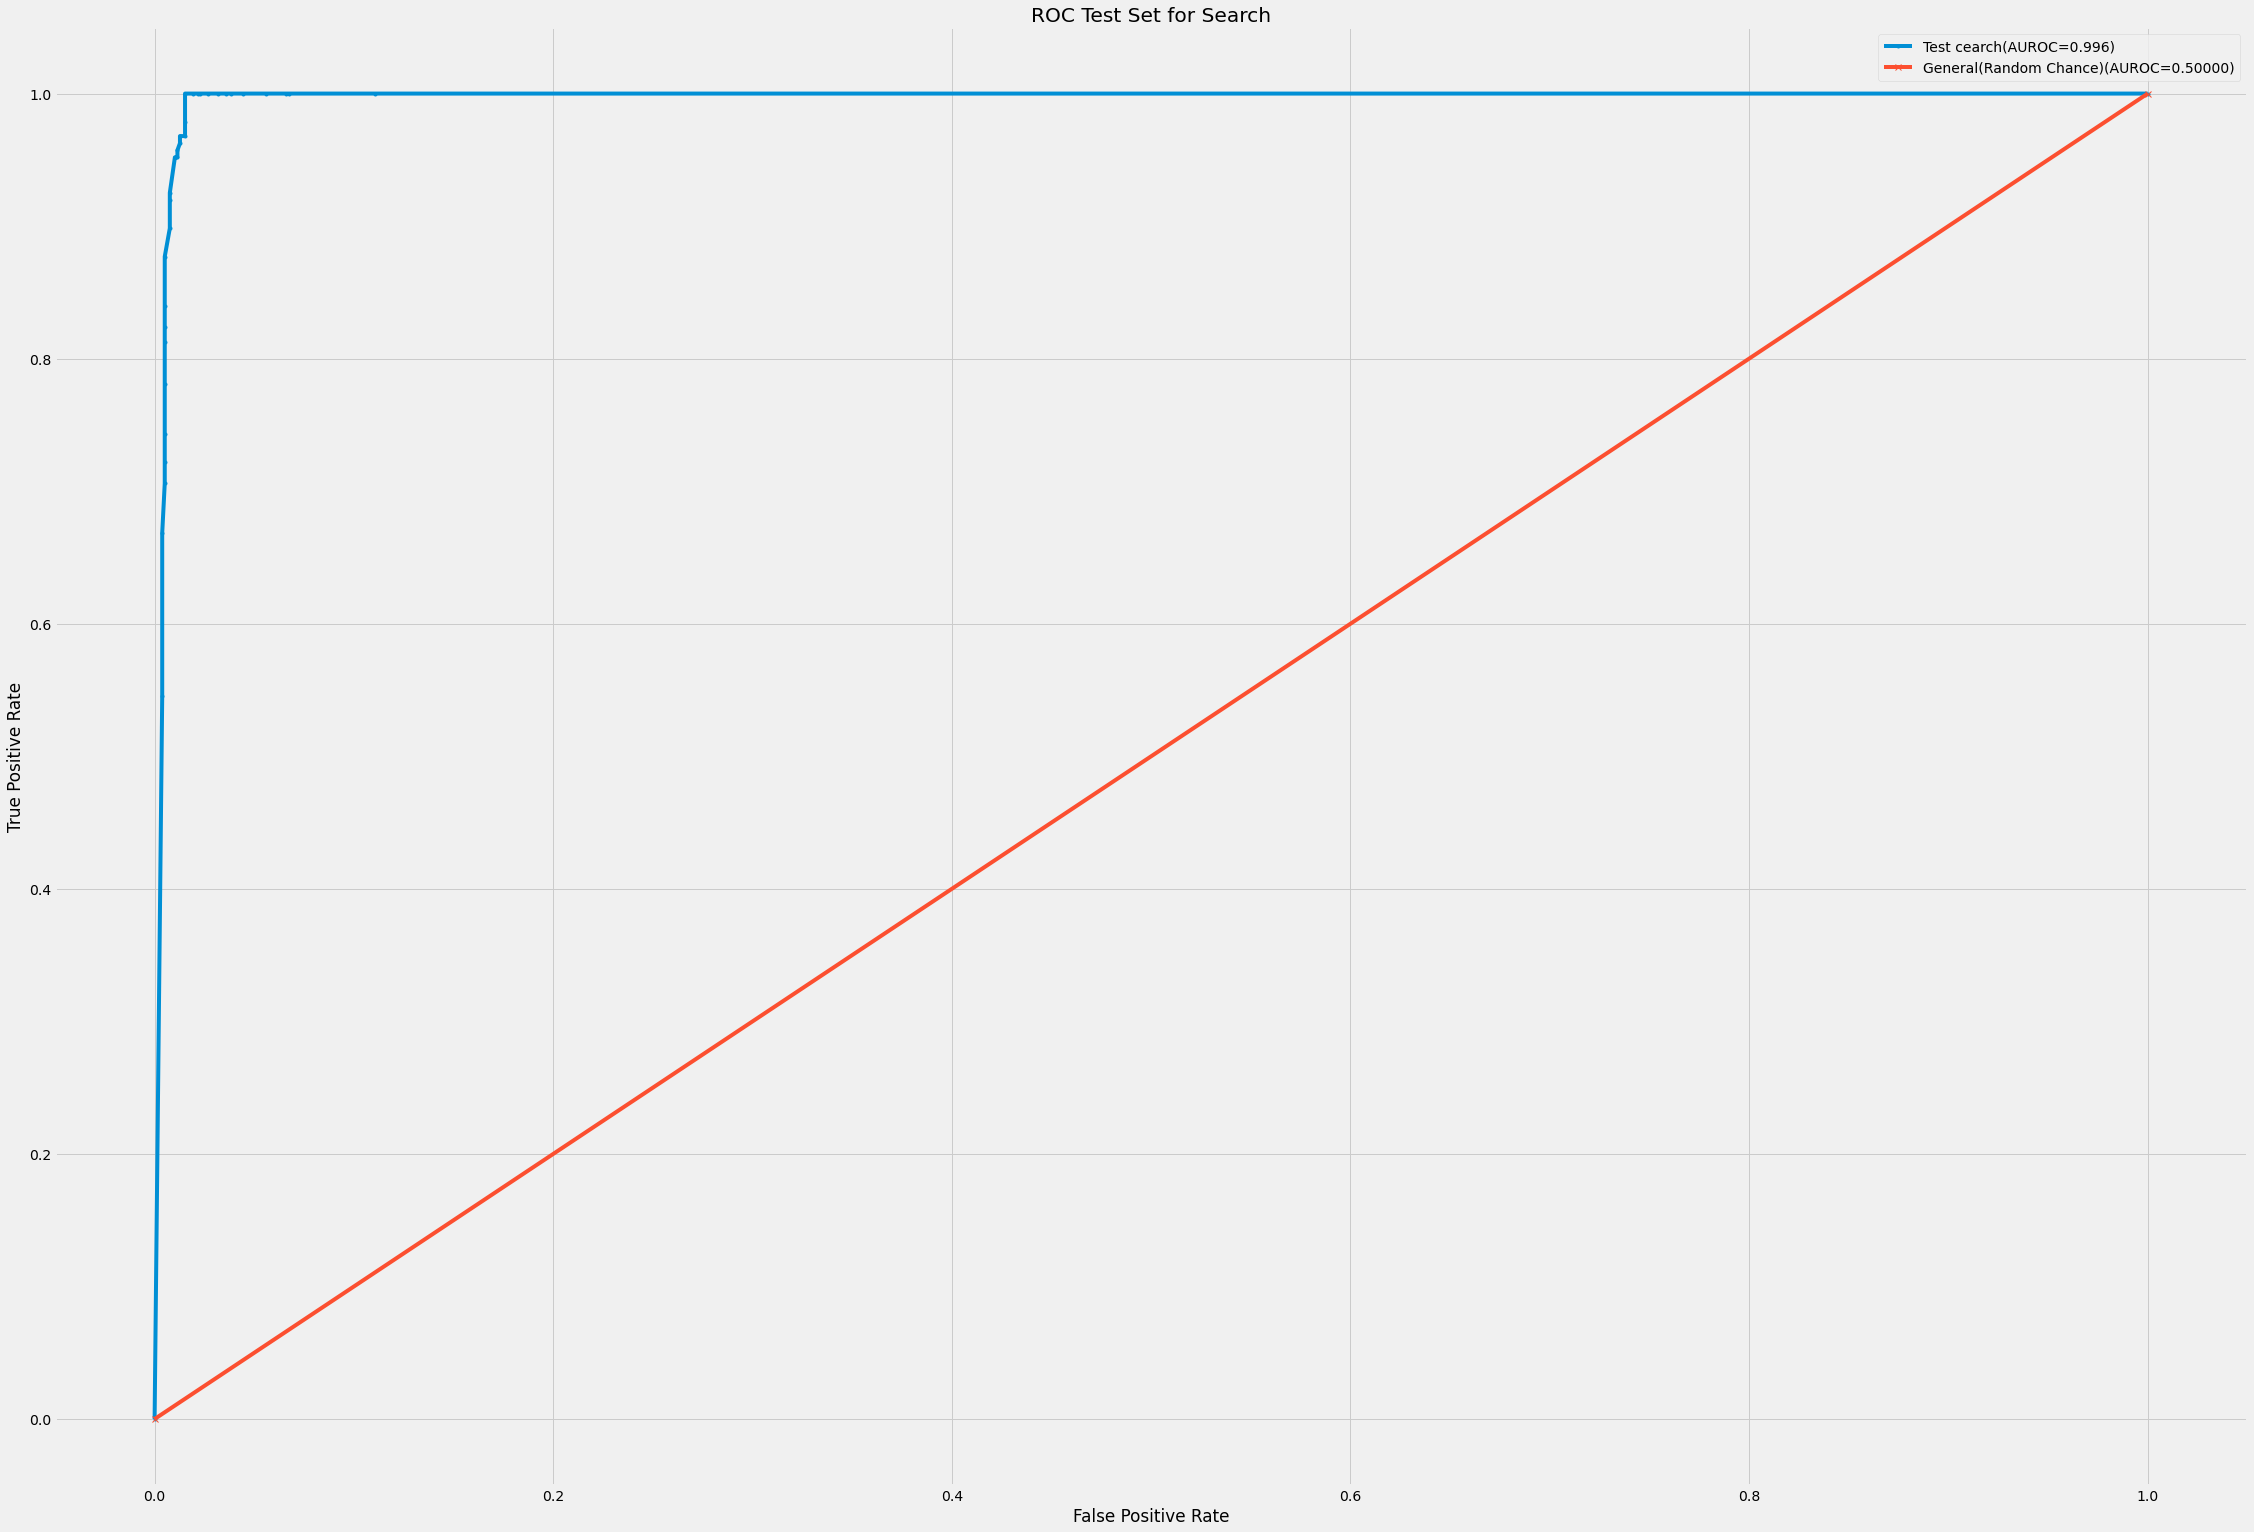

In [419]:
#Plotting AUROC scores
plt.plot(search_test_fpr,search_test_tpr,marker='.',label='Test cearch(AUROC=%0.3f)'%search_test_auc)
plt.plot(G_post_fpr,G_post_tpr,marker='x',label='General(Random Chance)(AUROC=%0.5f)'%G_Post_auc)

plt.title("ROC Test Set for Search")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

Comments:

In [420]:
print(classification_report(y_post_search, y_post_search_score,
                            target_names=['negative class','positive class']))

                precision    recall  f1-score   support

negative class       1.00      0.98      0.99       786
positive class       0.94      1.00      0.97       187

      accuracy                           0.99       973
     macro avg       0.97      0.99      0.98       973
  weighted avg       0.99      0.99      0.99       973



In [ ]:
y_post_search_score = MdlS.predict(X_post_search) #Predict training set 

In [ ]:
y_pre_crime_scorePB=y_pre_crime_scorePB[:,1] probabilities of the positive outcomes kept

Overall the random forest performed well, potentially too well and the model may have overfited. we find training both datasets with the lockdown dataset brings confidence to accept post lockdown the model had built.

If there were more numerical information, we would have used clusterers to visually represent relationships and correlation via geo spatial analysis.

all in all we find that akthough the police has become less harsher in the sense they have given out less arrests for crimes they may have given out warnings/fines for, however overall we find more arrests being given with crimes the police are being caught out for. 

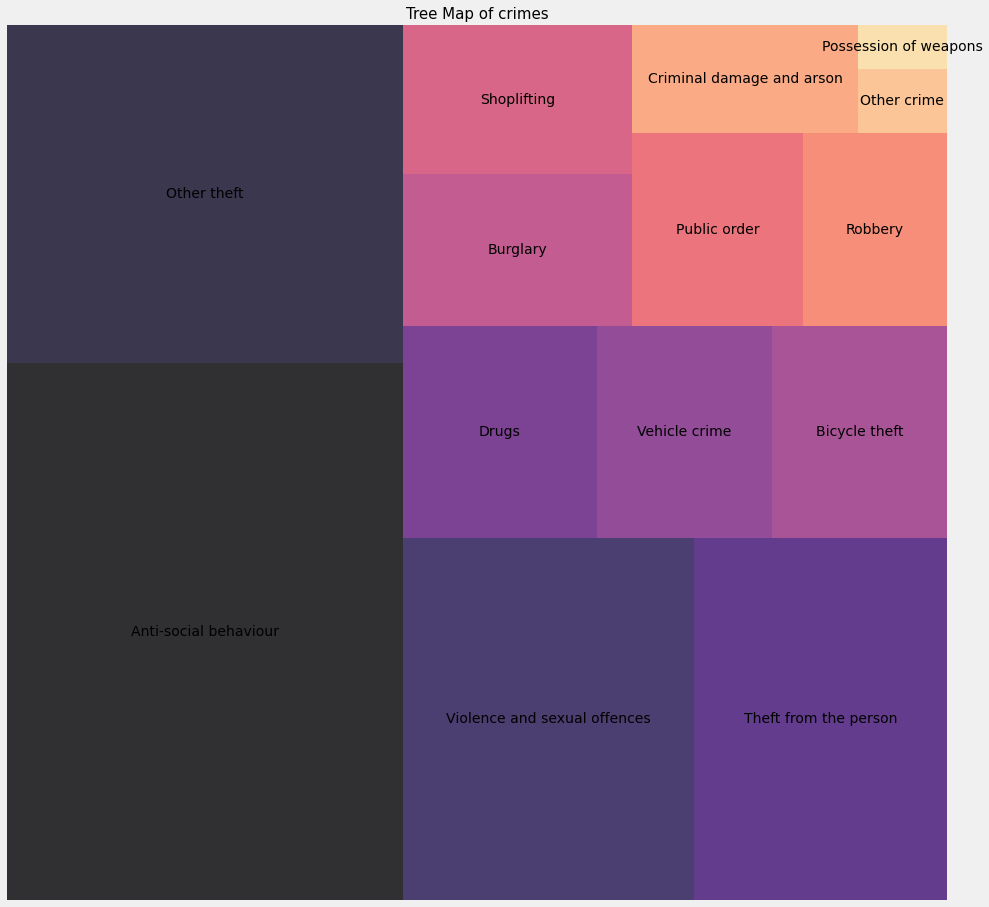

In [296]:
#HeatMap expressing data investigation

y = df_crime['Crime type'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map of crimes', fontsize = 15)

plt.axis('off')
plt.show()

In [ ]:
#Looking at this extraction we have a dataframe full of unwanted data which we need to extract
#These are the only LSOA names we shouLd have 'City of London 001A','City of London 001B''City of London 001C', 'City of London 001E',
     #  'City of London 001F', 'City of London 001G',

In [ ]:
CoL_names=['City of London 001A','City of London 001B','City of London 001C', 'City of London 001E','City of London 001F', 'City of London 001G']

df_crime=df_crime.loc[df_crime['LSOA name'].isin(CoL_names)]  

In [ ]:
#df_crime['month'] = pd.DatetimeIndex(df_crime['Month']).month
#df_crime.head()

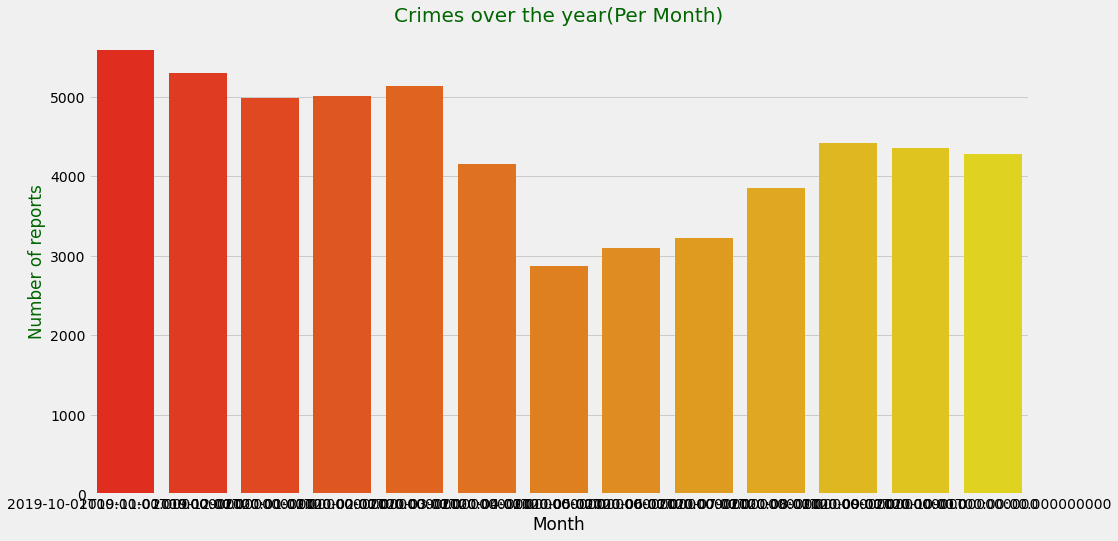

In [299]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(df_crime['Month'], palette = 'autumn',)
plt.title('Crimes over the year(Per Month)',color='darkgreen', fontsize = 20)
plt.ylabel("Number of reports",color='darkgreen')

plt.show()

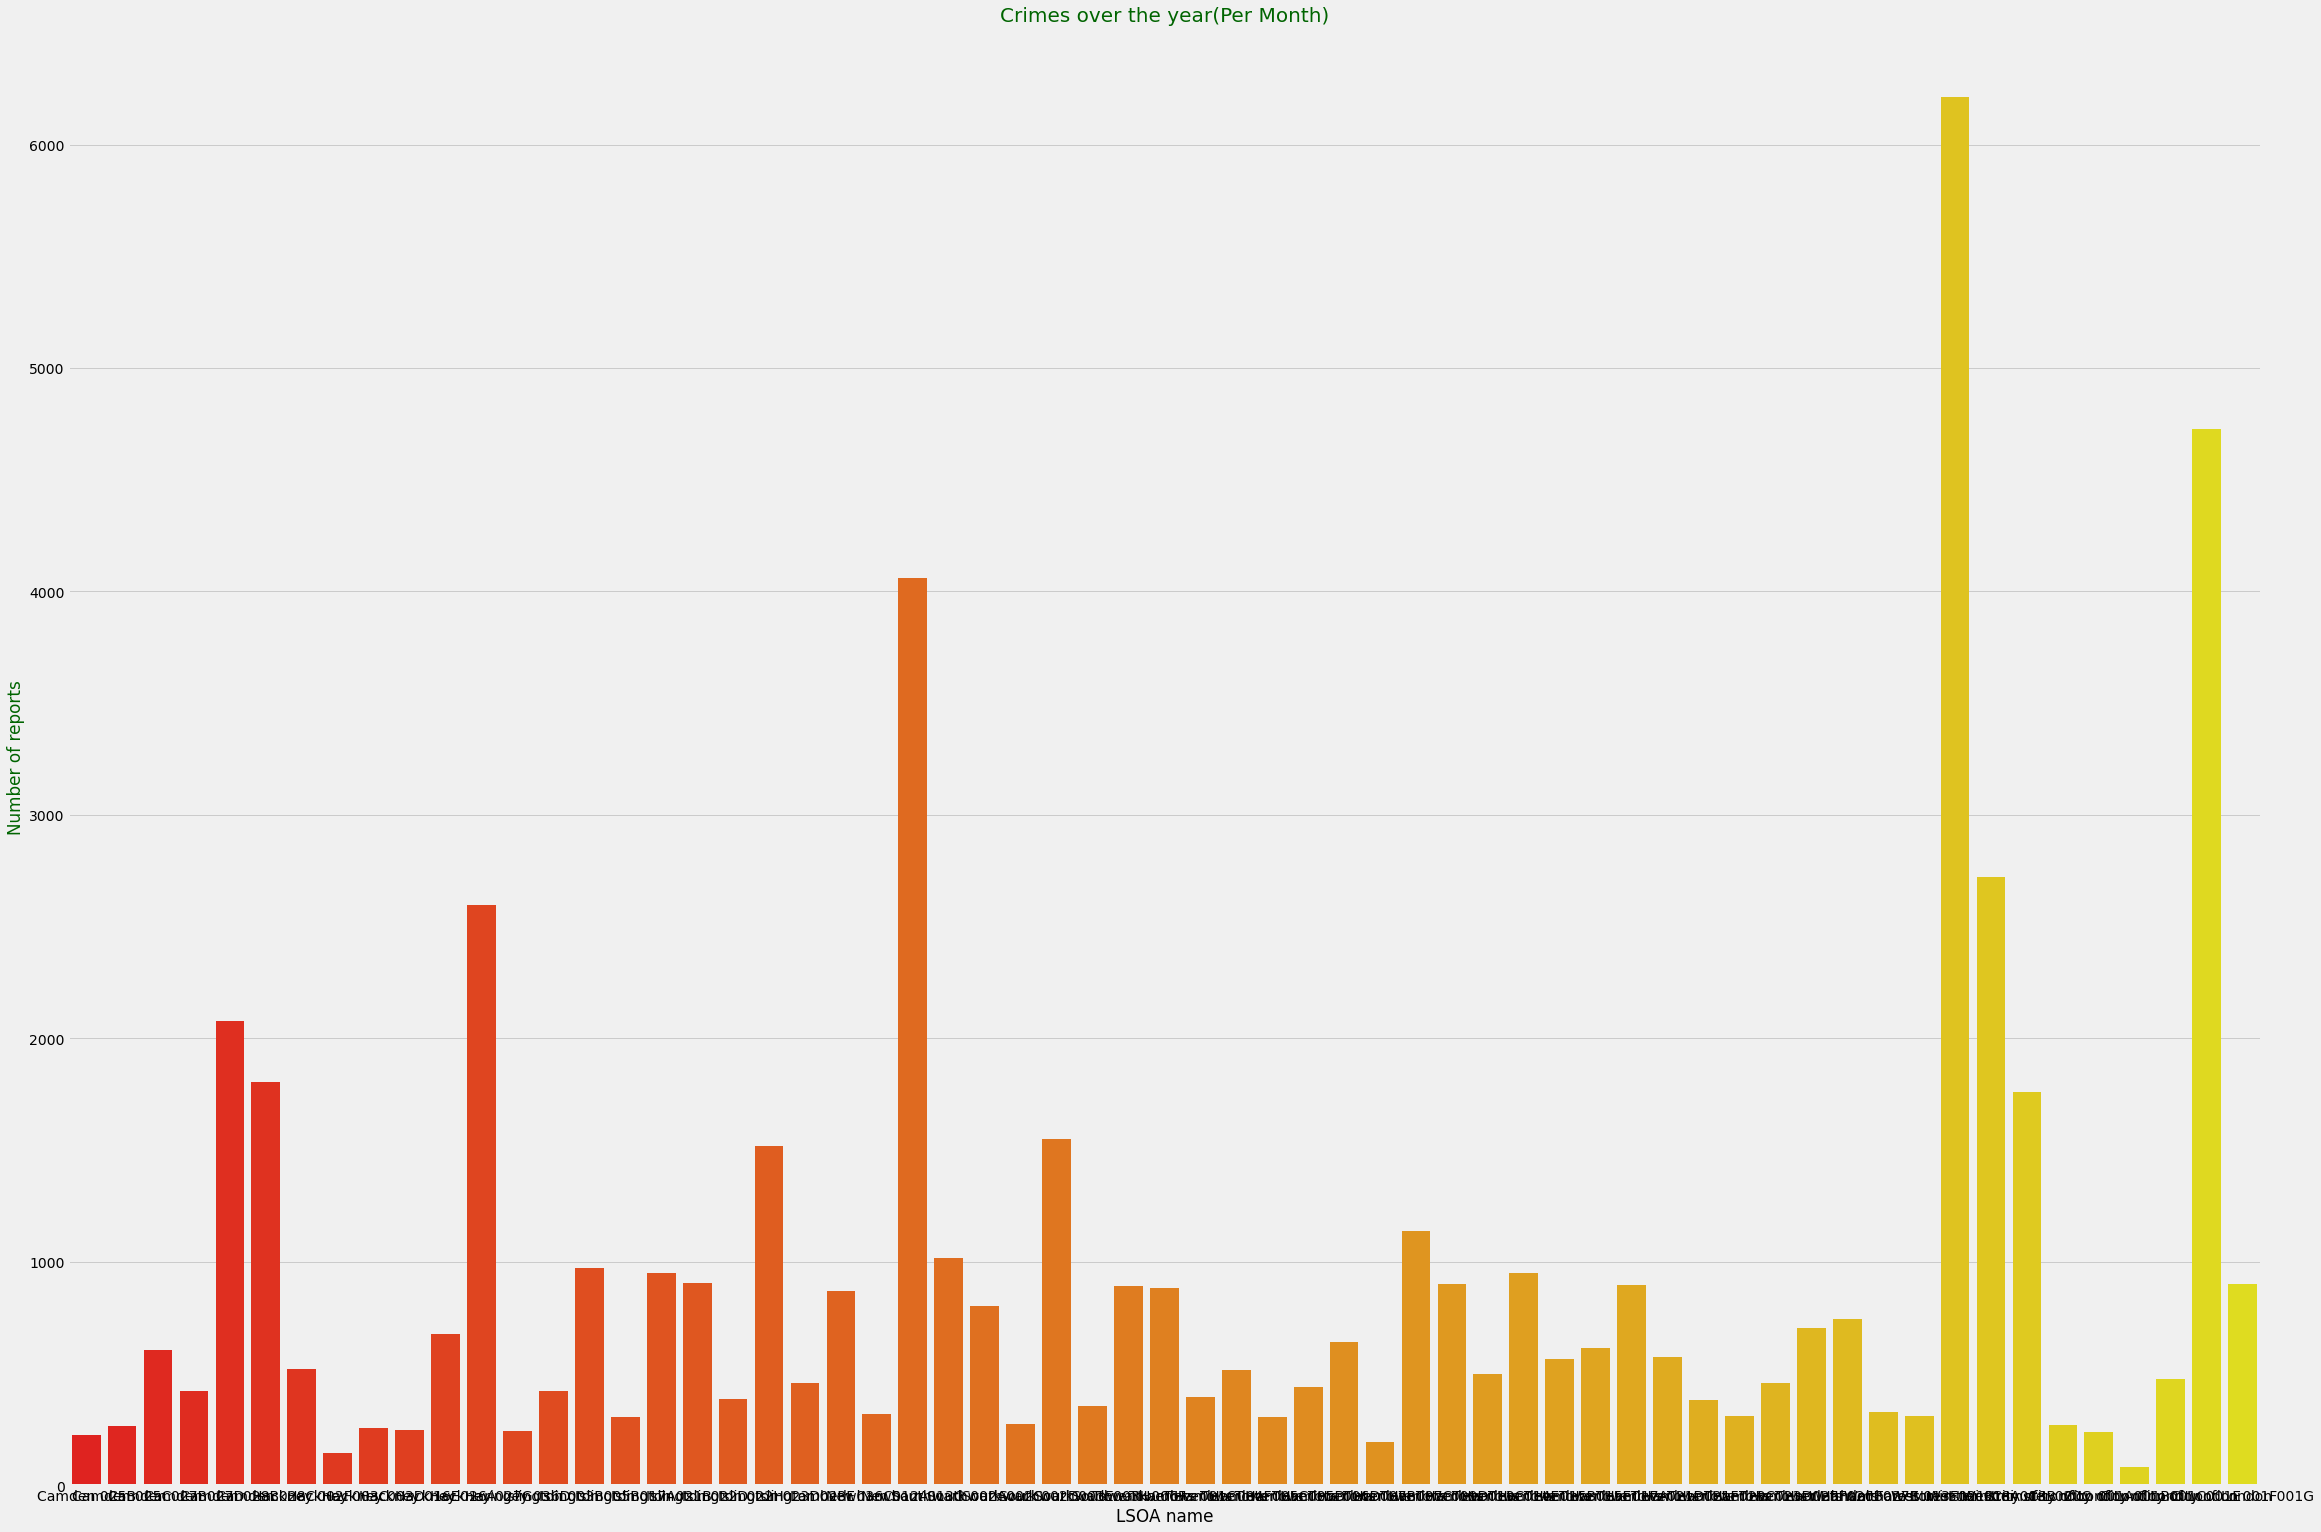

In [300]:
#LSOA name

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (35, 25)

sns.countplot(df_crime['LSOA name'], palette = 'autumn',)
plt.title('Crimes over the year(Per Month)',color='darkgreen', fontsize = 20)
plt.ylabel("Number of reports",color='darkgreen')

plt.show()